In [8]:
import pandas as pd

img_data = pd.read_parquet('/home/fenghe/Image2Text_inversion/ComparewithexData/sd_ft/best_test_over0_7.parquet')

In [6]:
img_data = pd.read_parquet('/home/fenghe/Image2Text_inversion/ComparewithexData/coco/best_test_over0_8.parquet')

In [1]:
with open('best_prompts_sd.txt', 'r') as f:
    lst = eval(f.read())

In [3]:
len(lst)

326

In [9]:
len(img_data)

326

In [10]:
import lpips
loss_fn_alex = lpips.LPIPS(net='alex') # best forward scores
loss_fn_vgg = lpips.LPIPS(net='vgg') # closer to "traditional" perceptual loss, when used for optimization

import torch
img0 = torch.zeros(1,3,64,64) # image should be RGB, IMPORTANT: normalized to [-1,1]
img1 = torch.zeros(1,3,64,64)
d = loss_fn_alex(img0, img1)

/home/fenghe/anaconda3/envs/hardimg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/fenghe/anaconda3/envs/hardimg/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fenghe/anaconda3/envs/hardimg/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/fenghe/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 115MB/s] 
/home/fenghe/anaconda3/envs/hardimg/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than

Loading model from: /home/fenghe/anaconda3/envs/hardimg/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/fenghe/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 115MB/s] 


Loading model from: /home/fenghe/anaconda3/envs/hardimg/lib/python3.10/site-packages/lpips/weights/v0.1/vgg.pth


In [11]:
d

tensor([[[[0.]]]], grad_fn=<AddBackward0>)

In [12]:
import torch
import lpips
from PIL import Image
from torchvision import transforms

# 加载LPIPS模型
lpips_model = lpips.LPIPS(net='alex')  # 使用AlexNet作为特征提取网络

# 加载图像并预处理
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),  # 根据需要调整尺寸
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # 添加batch维度

# 加载两张需要比较的图像
img1 = load_image('path_to_image1.jpg')
img2 = load_image('path_to_image2.jpg')

# 计算LPIPS相似度
lpips_score = lpips_model(img1, img2)

print('LPIPS score:', lpips_score.item())

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

# COCO数据集下的情况

## 根据不同的prompt生成图片

In [ ]:
from diffusers import StableDiffusionPipeline
from diffusers import PNDMScheduler
from PIL import Image


device = "cuda" if torch.cuda.is_available() else "cpu"


model_id = "runwayml/stable-diffusion-v1-5"
scheduler = PNDMScheduler.from_pretrained(model_id, subfolder="scheduler", cache_dir='.')

weight_dtype = torch.float16

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    torch_dtype=weight_dtype, cache_dir='.')
pipe = pipe.to(device)
image_length = 512


# num_images = 4
# guidance_scale = 9
# num_inference_steps = 25

# images = pipe(
#     prompt,
#     num_images_per_prompt=num_images,
#     guidance_scale=guidance_scale,
#     num_inference_steps=num_inference_steps,
#     height=image_length,
#     width=image_length,
#     ).images

# print(f"prompt: {prompt}")
# media.show_images(images)

## Bert

In [1]:
import pandas as pd

img_data = pd.read_parquet('/home/fenghe/Image2Text_inversion/ComparewithexData/coco/best_test_over0_8.parquet')

# load image
imgs_path = img_data['image_path'].to_list()

In [2]:
img_data

index  image_id      id  \
0     4357    519479  117500   
1     2436     37322   65076   
2     2932    241867   77773   
3      949    281950   26492   
4     3101     13296   82226   
..     ...       ...     ...   
683   3659     35525   97776   
684    182    472598    5385   
685   2983    432397   79158   
686   1194    242363   34092   
687   3298    246004   87743   

                                               caption  \
0              A man in library looking at his laptop.   
1       a orange motorcycle parked next to a sidewalk.   
2    An older orange van is parked next to a modern...   
3             A toilet in a bathroom with stone walls.   
4        A man with white clown paint is on a bicycle.   
..                                                 ...   
683      Man in a restaurant kitchen preparing a meal.   
684  An old green car parked on the side of the str...   
685            A lot of women standing by an airplane.   
686  A bathroom with a sink, toilet and shower bath...   
687  A man and a pretty woman sitting together whil...   

                                            image_path  \
0    StableDiff_Dataset/generated_pics_cocoprompts/...   
1    StableDiff_Dataset/generated_pics_cocoprompts/...   
2    StableDiff_Dataset/generated_pics_cocoprompts/...   
3    StableDiff_Dataset/generated_pics_cocoprompts/...   
4    StableDiff_Dataset/generated_pics_cocoprompts/...   
..                                                 ...   
683  StableDiff_Dataset/generated_pics_cocoprompts/...   
684  StableDiff_Dataset/generated_pics_cocoprompts/...   
685  StableDiff_Dataset/generated_pics_cocoprompts/...   
686  StableDiff_Dataset/generated_pics_cocoprompts/...   
687  StableDiff_Dataset/generated_pics_cocoprompts/...   

                                     generated_captiom  
0                   A man in a library using a laptop.  
1    An orange motorcycle parked on a street next t...  
2    An orange and white mini van parked outside a ...  
3      A stone walled bathroom with a toilet and sink.  
4    A clown on a bicycle with a clown face painted...  
..                                                 ...  
683  A man in a kitchen preparing food in a large pot.  
684       A green vintage car parked on a city street.  
685  A group of women standing outside of an airplane.  
686               A bathroom with a sink and a toilet.  
687              A man and woman holding a teddy bear.  

[688 rows x 6 columns]

In [3]:
# 引入所有的prompt组成Dataframe

with open('best_prompts_coco.txt', 'r') as f:
    lst = eval(f.read())

compare_promts = pd.DataFrame({'PEZ':lst})
compare_promts['Ours'] = img_data['generated_captiom']
compare_promts['Ref_imgs'] = img_data['image_path']
compare_promts['Ref_prompt'] = img_data['caption']

compare_promts

PEZ  \
0    professionally concentrated online businessman...   
1    spx cesfederal article discusses gentripartly ...   
2    shop orange hein rolls vehicle minis restauran...   
3    undertaker soak wc toilets rei award mayan rus...   
4    linguisaskatphysicist wolvecarnivalparkunhappy...   
..                                                 ...   
683  tcs dalejr satispreparing uni kitchen 写restaur...   
684  oldies sargent merc lime green heisstockholm l...   
685  lbj derivaeronauaeronbureau service 😞_phyllis ...   
686  sculstanford hotel ritzliverpool completes bro...   
687  teddy photoshoot eucalypelaghateparth dallas m...   

                                                  Ours  \
0                   A man in a library using a laptop.   
1    An orange motorcycle parked on a street next t...   
2    An orange and white mini van parked outside a ...   
3      A stone walled bathroom with a toilet and sink.   
4    A clown on a bicycle with a clown face painted...   
..                                                 ...   
683  A man in a kitchen preparing food in a large pot.   
684       A green vintage car parked on a city street.   
685  A group of women standing outside of an airplane.   
686               A bathroom with a sink and a toilet.   
687              A man and woman holding a teddy bear.   

                                              Ref_imgs  \
0    StableDiff_Dataset/generated_pics_cocoprompts/...   
1    StableDiff_Dataset/generated_pics_cocoprompts/...   
2    StableDiff_Dataset/generated_pics_cocoprompts/...   
3    StableDiff_Dataset/generated_pics_cocoprompts/...   
4    StableDiff_Dataset/generated_pics_cocoprompts/...   
..                                                 ...   
683  StableDiff_Dataset/generated_pics_cocoprompts/...   
684  StableDiff_Dataset/generated_pics_cocoprompts/...   
685  StableDiff_Dataset/generated_pics_cocoprompts/...   
686  StableDiff_Dataset/generated_pics_cocoprompts/...   
687  StableDiff_Dataset/generated_pics_cocoprompts/...   

                                            Ref_prompt  
0              A man in library looking at his laptop.  
1       a orange motorcycle parked next to a sidewalk.  
2    An older orange van is parked next to a modern...  
3             A toilet in a bathroom with stone walls.  
4        A man with white clown paint is on a bicycle.  
..                                                 ...  
683      Man in a restaurant kitchen preparing a meal.  
684  An old green car parked on the side of the str...  
685            A lot of women standing by an airplane.  
686  A bathroom with a sink, toilet and shower bath...  
687  A man and a pretty woman sitting together whil...  

[688 rows x 4 columns]

In [4]:
from bert_score import score

def bert_sim_eval(candidate_sentence, target_sentence):
    # 将句子放入列表中，因为 bert-score 的 score 函数期望列表输入
    candidates = [candidate_sentence]
    references = [target_sentence]

    # 计算 BertScore
    P, R, F1 = score(candidates, references, lang='en', verbose=True)
    return {"P":P.item(),"R":R.item(),"F1":F1.item()}

/home/fenghe/anaconda3/envs/hardimg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from tqdm import tqdm
P_PEZ = []
R_PEZ = []
F1_PEZ = []
for index,item in tqdm(compare_promts.iterrows(),total=len(compare_promts)):    
    res = bert_sim_eval(item['PEZ'],item['Ref_prompt'])
    P_PEZ.append(res['P'])
    R_PEZ.append(res['R'])
    F1_PEZ.append(res['F1'])

  0%|          | 0/688 [00:00<?, ?it/s]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 27.51it/s]


computing greedy matching.


  0%|          | 1/688 [00:01<13:51,  1.21s/it]

done in 0.04 seconds, 24.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 91.62it/s]


computing greedy matching.


  0%|          | 2/688 [00:01<10:27,  1.09it/s]

done in 0.01 seconds, 72.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 91.79it/s]


computing greedy matching.


  0%|          | 3/688 [00:02<09:25,  1.21it/s]

done in 0.01 seconds, 67.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 84.38it/s]


computing greedy matching.


  1%|          | 4/688 [00:03<08:54,  1.28it/s]

done in 0.01 seconds, 69.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 93.34it/s]


computing greedy matching.


  1%|          | 5/688 [00:04<08:35,  1.32it/s]

done in 0.01 seconds, 71.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 94.28it/s]


computing greedy matching.


  1%|          | 6/688 [00:04<08:22,  1.36it/s]

done in 0.01 seconds, 73.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 83.44it/s]


computing greedy matching.


  1%|          | 7/688 [00:05<08:16,  1.37it/s]

done in 0.02 seconds, 64.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 77.59it/s]


computing greedy matching.


  1%|          | 8/688 [00:06<08:21,  1.36it/s]

done in 0.02 seconds, 63.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.19it/s]


computing greedy matching.


  1%|▏         | 9/688 [00:06<08:13,  1.37it/s]

done in 0.01 seconds, 67.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 79.38it/s]


computing greedy matching.


  1%|▏         | 10/688 [00:07<08:06,  1.39it/s]

done in 0.02 seconds, 65.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.00it/s]


computing greedy matching.


  2%|▏         | 11/688 [00:08<08:03,  1.40it/s]

done in 0.01 seconds, 119.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 110.27it/s]


computing greedy matching.


  2%|▏         | 12/688 [00:09<07:56,  1.42it/s]

done in 0.01 seconds, 83.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 79.32it/s]


computing greedy matching.


  2%|▏         | 13/688 [00:09<07:51,  1.43it/s]

done in 0.02 seconds, 62.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 86.41it/s]


computing greedy matching.


  2%|▏         | 14/688 [00:10<07:48,  1.44it/s]

done in 0.01 seconds, 68.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.53it/s]


computing greedy matching.


  2%|▏         | 15/688 [00:11<07:48,  1.44it/s]

done in 0.01 seconds, 120.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 121.03it/s]


computing greedy matching.


  2%|▏         | 16/688 [00:11<07:48,  1.43it/s]

done in 0.01 seconds, 85.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 176.72it/s]


computing greedy matching.


  2%|▏         | 17/688 [00:12<07:47,  1.44it/s]

done in 0.01 seconds, 112.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.13it/s]


computing greedy matching.


  3%|▎         | 18/688 [00:13<07:54,  1.41it/s]

done in 0.01 seconds, 112.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.53it/s]


computing greedy matching.


  3%|▎         | 19/688 [00:13<07:59,  1.40it/s]

done in 0.01 seconds, 117.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


computing greedy matching.


  3%|▎         | 20/688 [00:14<07:59,  1.39it/s]

done in 0.01 seconds, 131.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.37it/s]


computing greedy matching.


  3%|▎         | 21/688 [00:15<07:56,  1.40it/s]

done in 0.01 seconds, 134.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.42it/s]


computing greedy matching.


  3%|▎         | 22/688 [00:16<07:55,  1.40it/s]

done in 0.01 seconds, 116.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.93it/s]


computing greedy matching.


  3%|▎         | 23/688 [00:16<07:52,  1.41it/s]

done in 0.01 seconds, 129.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.22it/s]


computing greedy matching.


  3%|▎         | 24/688 [00:17<07:50,  1.41it/s]

done in 0.01 seconds, 122.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 138.90it/s]


computing greedy matching.


  4%|▎         | 25/688 [00:18<07:47,  1.42it/s]

done in 0.01 seconds, 99.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.26it/s]


computing greedy matching.


  4%|▍         | 26/688 [00:18<07:42,  1.43it/s]

done in 0.01 seconds, 118.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.20it/s]


computing greedy matching.


  4%|▍         | 27/688 [00:19<08:02,  1.37it/s]

done in 0.01 seconds, 119.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.96it/s]


computing greedy matching.


  4%|▍         | 28/688 [00:20<08:04,  1.36it/s]

done in 0.01 seconds, 114.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 196.02it/s]


computing greedy matching.


  4%|▍         | 29/688 [00:21<07:55,  1.39it/s]

done in 0.01 seconds, 125.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.23it/s]


computing greedy matching.


  4%|▍         | 30/688 [00:21<07:47,  1.41it/s]

done in 0.01 seconds, 126.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.27it/s]


computing greedy matching.


  5%|▍         | 31/688 [00:22<07:43,  1.42it/s]

done in 0.01 seconds, 122.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 177.72it/s]


computing greedy matching.


  5%|▍         | 32/688 [00:23<07:41,  1.42it/s]

done in 0.01 seconds, 116.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.61it/s]


computing greedy matching.


  5%|▍         | 33/688 [00:23<07:46,  1.41it/s]

done in 0.01 seconds, 105.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.03it/s]


computing greedy matching.


  5%|▍         | 34/688 [00:24<07:43,  1.41it/s]

done in 0.01 seconds, 127.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.73it/s]


computing greedy matching.


  5%|▌         | 35/688 [00:25<07:42,  1.41it/s]

done in 0.01 seconds, 115.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.32it/s]


computing greedy matching.


  5%|▌         | 36/688 [00:26<07:36,  1.43it/s]

done in 0.01 seconds, 125.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 175.23it/s]


computing greedy matching.


  5%|▌         | 37/688 [00:26<07:39,  1.42it/s]

done in 0.01 seconds, 112.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.32it/s]


computing greedy matching.


  6%|▌         | 38/688 [00:27<07:34,  1.43it/s]

done in 0.01 seconds, 117.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 135.07it/s]


computing greedy matching.


  6%|▌         | 39/688 [00:28<07:41,  1.41it/s]

done in 0.01 seconds, 96.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.55it/s]


computing greedy matching.


  6%|▌         | 40/688 [00:28<07:36,  1.42it/s]

done in 0.01 seconds, 125.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.23it/s]


computing greedy matching.


  6%|▌         | 41/688 [00:29<07:31,  1.43it/s]

done in 0.01 seconds, 117.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.91it/s]


computing greedy matching.


  6%|▌         | 42/688 [00:30<08:44,  1.23it/s]

done in 0.01 seconds, 129.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.45it/s]


computing greedy matching.


  6%|▋         | 43/688 [00:31<08:22,  1.28it/s]

done in 0.01 seconds, 121.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.45it/s]


computing greedy matching.


  6%|▋         | 44/688 [00:32<08:03,  1.33it/s]

done in 0.01 seconds, 117.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.33it/s]


computing greedy matching.


  7%|▋         | 45/688 [00:32<07:50,  1.37it/s]

done in 0.01 seconds, 114.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.71it/s]


computing greedy matching.


  7%|▋         | 46/688 [00:33<07:46,  1.38it/s]

done in 0.01 seconds, 117.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.50it/s]


computing greedy matching.


  7%|▋         | 47/688 [00:34<07:38,  1.40it/s]

done in 0.01 seconds, 131.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.37it/s]


computing greedy matching.


  7%|▋         | 48/688 [00:34<07:34,  1.41it/s]

done in 0.01 seconds, 117.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.43it/s]


computing greedy matching.


  7%|▋         | 49/688 [00:35<07:29,  1.42it/s]

done in 0.01 seconds, 125.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.62it/s]


computing greedy matching.


  7%|▋         | 50/688 [00:36<07:37,  1.40it/s]

done in 0.01 seconds, 125.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.07it/s]


computing greedy matching.


  7%|▋         | 51/688 [00:36<07:30,  1.41it/s]

done in 0.01 seconds, 127.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.84it/s]


computing greedy matching.


  8%|▊         | 52/688 [00:37<07:25,  1.43it/s]

done in 0.01 seconds, 127.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.36it/s]


computing greedy matching.


  8%|▊         | 53/688 [00:38<07:23,  1.43it/s]

done in 0.01 seconds, 122.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.63it/s]


computing greedy matching.


  8%|▊         | 54/688 [00:38<07:22,  1.43it/s]

done in 0.01 seconds, 125.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.69it/s]


computing greedy matching.


  8%|▊         | 55/688 [00:39<07:22,  1.43it/s]

done in 0.01 seconds, 137.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.85it/s]


computing greedy matching.


  8%|▊         | 56/688 [00:40<07:20,  1.43it/s]

done in 0.01 seconds, 126.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.23it/s]


computing greedy matching.


  8%|▊         | 57/688 [00:41<07:16,  1.45it/s]

done in 0.01 seconds, 126.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 197.50it/s]


computing greedy matching.


  8%|▊         | 58/688 [00:41<07:12,  1.46it/s]

done in 0.01 seconds, 123.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.67it/s]


computing greedy matching.


  9%|▊         | 59/688 [00:42<07:09,  1.46it/s]

done in 0.01 seconds, 117.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.87it/s]


computing greedy matching.


  9%|▊         | 60/688 [00:43<07:09,  1.46it/s]

done in 0.01 seconds, 105.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 210.44it/s]


computing greedy matching.


  9%|▉         | 61/688 [00:43<07:20,  1.42it/s]

done in 0.01 seconds, 122.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.49it/s]


computing greedy matching.


  9%|▉         | 62/688 [00:44<07:21,  1.42it/s]

done in 0.01 seconds, 118.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.67it/s]


computing greedy matching.


  9%|▉         | 63/688 [00:45<07:17,  1.43it/s]

done in 0.01 seconds, 121.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 174.94it/s]


computing greedy matching.


  9%|▉         | 64/688 [00:45<07:14,  1.44it/s]

done in 0.01 seconds, 109.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 196.66it/s]


computing greedy matching.


  9%|▉         | 65/688 [00:46<07:13,  1.44it/s]

done in 0.01 seconds, 127.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.25it/s]


computing greedy matching.


 10%|▉         | 66/688 [00:47<07:12,  1.44it/s]

done in 0.01 seconds, 129.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.13it/s]


computing greedy matching.


 10%|▉         | 67/688 [00:48<07:12,  1.44it/s]

done in 0.01 seconds, 130.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 210.08it/s]


computing greedy matching.


 10%|▉         | 68/688 [00:48<07:12,  1.43it/s]

done in 0.01 seconds, 70.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.83it/s]


computing greedy matching.


 10%|█         | 69/688 [00:49<07:18,  1.41it/s]

done in 0.01 seconds, 127.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.15it/s]


computing greedy matching.


 10%|█         | 70/688 [00:50<07:13,  1.42it/s]

done in 0.01 seconds, 124.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.05it/s]


computing greedy matching.


 10%|█         | 71/688 [00:50<07:08,  1.44it/s]

done in 0.01 seconds, 126.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.01it/s]


computing greedy matching.


 10%|█         | 72/688 [00:51<07:15,  1.41it/s]

done in 0.01 seconds, 129.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.61it/s]


computing greedy matching.


 11%|█         | 73/688 [00:52<07:10,  1.43it/s]

done in 0.01 seconds, 127.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.70it/s]


computing greedy matching.


 11%|█         | 74/688 [00:52<07:07,  1.44it/s]

done in 0.01 seconds, 127.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.32it/s]


computing greedy matching.


 11%|█         | 75/688 [00:53<07:04,  1.44it/s]

done in 0.01 seconds, 118.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.64it/s]


computing greedy matching.


 11%|█         | 76/688 [00:54<07:07,  1.43it/s]

done in 0.01 seconds, 127.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.81it/s]


computing greedy matching.


 11%|█         | 77/688 [00:55<07:05,  1.44it/s]

done in 0.01 seconds, 128.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 177.57it/s]


computing greedy matching.


 11%|█▏        | 78/688 [00:55<07:09,  1.42it/s]

done in 0.01 seconds, 115.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.11it/s]


computing greedy matching.


 11%|█▏        | 79/688 [00:56<07:09,  1.42it/s]

done in 0.01 seconds, 121.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 196.45it/s]


computing greedy matching.


 12%|█▏        | 80/688 [00:57<07:08,  1.42it/s]

done in 0.01 seconds, 123.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.06it/s]


computing greedy matching.


 12%|█▏        | 81/688 [00:57<07:08,  1.42it/s]

done in 0.01 seconds, 120.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 149.01it/s]


computing greedy matching.


 12%|█▏        | 82/688 [00:58<07:13,  1.40it/s]

done in 0.01 seconds, 100.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.43it/s]


computing greedy matching.


 12%|█▏        | 83/688 [00:59<07:14,  1.39it/s]

done in 0.01 seconds, 133.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.73it/s]


computing greedy matching.


 12%|█▏        | 84/688 [01:00<07:09,  1.41it/s]

done in 0.01 seconds, 121.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.07it/s]


computing greedy matching.


 12%|█▏        | 85/688 [01:00<07:02,  1.43it/s]

done in 0.01 seconds, 119.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.28it/s]


computing greedy matching.


 12%|█▎        | 86/688 [01:01<06:57,  1.44it/s]

done in 0.01 seconds, 130.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.91it/s]


computing greedy matching.


 13%|█▎        | 87/688 [01:02<06:58,  1.44it/s]

done in 0.01 seconds, 131.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.96it/s]


computing greedy matching.


 13%|█▎        | 88/688 [01:02<07:03,  1.42it/s]

done in 0.01 seconds, 123.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.53it/s]


computing greedy matching.


 13%|█▎        | 89/688 [01:03<07:09,  1.40it/s]

done in 0.02 seconds, 63.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.59it/s]


computing greedy matching.


 13%|█▎        | 90/688 [01:04<07:05,  1.41it/s]

done in 0.01 seconds, 131.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 198.19it/s]


computing greedy matching.


 13%|█▎        | 91/688 [01:04<07:06,  1.40it/s]

done in 0.01 seconds, 127.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.55it/s]


computing greedy matching.


 13%|█▎        | 92/688 [01:05<07:01,  1.41it/s]

done in 0.01 seconds, 115.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.89it/s]


computing greedy matching.


 14%|█▎        | 93/688 [01:06<07:12,  1.38it/s]

done in 0.01 seconds, 129.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.22it/s]


computing greedy matching.


 14%|█▎        | 94/688 [01:07<07:11,  1.38it/s]

done in 0.01 seconds, 128.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.15it/s]


computing greedy matching.


 14%|█▍        | 95/688 [01:07<07:06,  1.39it/s]

done in 0.01 seconds, 114.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.22it/s]


computing greedy matching.


 14%|█▍        | 96/688 [01:08<07:02,  1.40it/s]

done in 0.01 seconds, 117.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 198.09it/s]


computing greedy matching.


 14%|█▍        | 97/688 [01:09<06:56,  1.42it/s]

done in 0.01 seconds, 122.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.54it/s]


computing greedy matching.


 14%|█▍        | 98/688 [01:09<06:54,  1.42it/s]

done in 0.01 seconds, 85.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.76it/s]


computing greedy matching.


 14%|█▍        | 99/688 [01:10<06:52,  1.43it/s]

done in 0.01 seconds, 128.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.23it/s]


computing greedy matching.


 15%|█▍        | 100/688 [01:11<06:53,  1.42it/s]

done in 0.01 seconds, 129.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.65it/s]


computing greedy matching.


 15%|█▍        | 101/688 [01:12<06:53,  1.42it/s]

done in 0.01 seconds, 110.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.45it/s]


computing greedy matching.


 15%|█▍        | 102/688 [01:12<06:52,  1.42it/s]

done in 0.01 seconds, 122.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.85it/s]


computing greedy matching.


 15%|█▍        | 103/688 [01:13<06:56,  1.40it/s]

done in 0.01 seconds, 133.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.97it/s]


computing greedy matching.


 15%|█▌        | 104/688 [01:14<06:48,  1.43it/s]

done in 0.01 seconds, 136.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.19it/s]


computing greedy matching.


 15%|█▌        | 105/688 [01:14<06:44,  1.44it/s]

done in 0.01 seconds, 129.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.27it/s]


computing greedy matching.


 15%|█▌        | 106/688 [01:15<06:45,  1.44it/s]

done in 0.01 seconds, 114.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 173.82it/s]


computing greedy matching.


 16%|█▌        | 107/688 [01:16<06:47,  1.43it/s]

done in 0.01 seconds, 114.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.76it/s]


computing greedy matching.


 16%|█▌        | 108/688 [01:16<06:48,  1.42it/s]

done in 0.01 seconds, 115.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.55it/s]


computing greedy matching.


 16%|█▌        | 109/688 [01:17<06:47,  1.42it/s]

done in 0.01 seconds, 136.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 194.34it/s]


computing greedy matching.


 16%|█▌        | 110/688 [01:18<06:48,  1.42it/s]

done in 0.01 seconds, 124.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.35it/s]


computing greedy matching.


 16%|█▌        | 111/688 [01:19<06:48,  1.41it/s]

done in 0.01 seconds, 120.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.08it/s]


computing greedy matching.


 16%|█▋        | 112/688 [01:19<06:43,  1.43it/s]

done in 0.01 seconds, 128.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.82it/s]


computing greedy matching.


 16%|█▋        | 113/688 [01:20<06:41,  1.43it/s]

done in 0.01 seconds, 122.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.12it/s]


computing greedy matching.


 17%|█▋        | 114/688 [01:21<06:48,  1.41it/s]

done in 0.01 seconds, 110.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.83it/s]


computing greedy matching.


 17%|█▋        | 115/688 [01:21<06:44,  1.42it/s]

done in 0.01 seconds, 77.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.20it/s]


computing greedy matching.


 17%|█▋        | 116/688 [01:22<06:39,  1.43it/s]

done in 0.01 seconds, 126.72 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.02it/s]


computing greedy matching.


 17%|█▋        | 117/688 [01:23<06:46,  1.40it/s]

done in 0.01 seconds, 132.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.13it/s]


computing greedy matching.


 17%|█▋        | 118/688 [01:24<06:42,  1.42it/s]

done in 0.01 seconds, 128.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.23it/s]


computing greedy matching.


 17%|█▋        | 119/688 [01:24<06:40,  1.42it/s]

done in 0.01 seconds, 122.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.01it/s]


computing greedy matching.


 17%|█▋        | 120/688 [01:25<06:44,  1.40it/s]

done in 0.01 seconds, 129.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.12it/s]


computing greedy matching.


 18%|█▊        | 121/688 [01:26<06:42,  1.41it/s]

done in 0.01 seconds, 129.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.39it/s]


computing greedy matching.


 18%|█▊        | 122/688 [01:26<06:41,  1.41it/s]

done in 0.01 seconds, 77.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.20it/s]


computing greedy matching.


 18%|█▊        | 123/688 [01:27<06:38,  1.42it/s]

done in 0.01 seconds, 135.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.32it/s]


computing greedy matching.


 18%|█▊        | 124/688 [01:28<06:37,  1.42it/s]

done in 0.01 seconds, 126.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.08it/s]


computing greedy matching.


 18%|█▊        | 125/688 [01:29<06:46,  1.39it/s]

done in 0.01 seconds, 127.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 188.00it/s]


computing greedy matching.


 18%|█▊        | 126/688 [01:29<06:43,  1.39it/s]

done in 0.01 seconds, 102.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.42it/s]


computing greedy matching.


 18%|█▊        | 127/688 [01:30<06:37,  1.41it/s]

done in 0.01 seconds, 133.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.77it/s]


computing greedy matching.


 19%|█▊        | 128/688 [01:31<06:43,  1.39it/s]

done in 0.01 seconds, 133.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.39it/s]


computing greedy matching.


 19%|█▉        | 129/688 [01:31<06:37,  1.41it/s]

done in 0.01 seconds, 114.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.37it/s]


computing greedy matching.


 19%|█▉        | 130/688 [01:32<06:33,  1.42it/s]

done in 0.01 seconds, 123.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.60it/s]


computing greedy matching.


 19%|█▉        | 131/688 [01:33<06:31,  1.42it/s]

done in 0.01 seconds, 122.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.46it/s]


computing greedy matching.


 19%|█▉        | 132/688 [01:33<06:36,  1.40it/s]

done in 0.01 seconds, 111.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.91it/s]


computing greedy matching.


 19%|█▉        | 133/688 [01:34<06:35,  1.40it/s]

done in 0.01 seconds, 128.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.43it/s]


computing greedy matching.


 19%|█▉        | 134/688 [01:35<06:32,  1.41it/s]

done in 0.01 seconds, 132.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.00it/s]


computing greedy matching.


 20%|█▉        | 135/688 [01:36<06:55,  1.33it/s]

done in 0.01 seconds, 115.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.32it/s]


computing greedy matching.


 20%|█▉        | 136/688 [01:37<06:59,  1.31it/s]

done in 0.01 seconds, 123.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.91it/s]


computing greedy matching.


 20%|█▉        | 137/688 [01:37<06:47,  1.35it/s]

done in 0.01 seconds, 127.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.76it/s]


computing greedy matching.


 20%|██        | 138/688 [01:38<06:38,  1.38it/s]

done in 0.01 seconds, 104.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.63it/s]


computing greedy matching.


 20%|██        | 139/688 [01:39<06:38,  1.38it/s]

done in 0.01 seconds, 117.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.69it/s]


computing greedy matching.


 20%|██        | 140/688 [01:39<06:30,  1.40it/s]

done in 0.01 seconds, 134.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.88it/s]


computing greedy matching.


 20%|██        | 141/688 [01:40<06:35,  1.38it/s]

done in 0.01 seconds, 114.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.76it/s]


computing greedy matching.


 21%|██        | 142/688 [01:41<06:30,  1.40it/s]

done in 0.01 seconds, 107.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.55it/s]


computing greedy matching.


 21%|██        | 143/688 [01:41<06:30,  1.40it/s]

done in 0.01 seconds, 116.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.07it/s]


computing greedy matching.


 21%|██        | 144/688 [01:42<06:39,  1.36it/s]

done in 0.01 seconds, 129.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.27it/s]


computing greedy matching.


 21%|██        | 145/688 [01:43<06:33,  1.38it/s]

done in 0.01 seconds, 120.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.92it/s]


computing greedy matching.


 21%|██        | 146/688 [01:44<06:27,  1.40it/s]

done in 0.01 seconds, 132.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.57it/s]


computing greedy matching.


 21%|██▏       | 147/688 [01:44<06:34,  1.37it/s]

done in 0.01 seconds, 120.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 123.41it/s]


computing greedy matching.


 22%|██▏       | 148/688 [01:45<06:29,  1.39it/s]

done in 0.01 seconds, 89.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.45it/s]


computing greedy matching.


 22%|██▏       | 149/688 [01:46<06:24,  1.40it/s]

done in 0.01 seconds, 129.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.22it/s]


computing greedy matching.


 22%|██▏       | 150/688 [01:46<06:20,  1.42it/s]

done in 0.01 seconds, 121.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.71it/s]


computing greedy matching.


 22%|██▏       | 151/688 [01:47<06:21,  1.41it/s]

done in 0.01 seconds, 128.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.05it/s]


computing greedy matching.


 22%|██▏       | 152/688 [01:48<06:19,  1.41it/s]

done in 0.01 seconds, 121.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.07it/s]


computing greedy matching.


 22%|██▏       | 153/688 [01:49<06:15,  1.43it/s]

done in 0.01 seconds, 127.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.00it/s]


computing greedy matching.


 22%|██▏       | 154/688 [01:49<06:11,  1.44it/s]

done in 0.01 seconds, 126.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.91it/s]


computing greedy matching.


 23%|██▎       | 155/688 [01:50<06:09,  1.44it/s]

done in 0.01 seconds, 125.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.43it/s]


computing greedy matching.


 23%|██▎       | 156/688 [01:51<06:06,  1.45it/s]

done in 0.01 seconds, 128.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.69it/s]


computing greedy matching.


 23%|██▎       | 157/688 [01:51<06:03,  1.46it/s]

done in 0.01 seconds, 120.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.65it/s]


computing greedy matching.


 23%|██▎       | 158/688 [01:52<06:11,  1.43it/s]

done in 0.01 seconds, 132.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.82it/s]


computing greedy matching.


 23%|██▎       | 159/688 [01:53<06:06,  1.44it/s]

done in 0.01 seconds, 116.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.21it/s]


computing greedy matching.


 23%|██▎       | 160/688 [01:54<07:04,  1.24it/s]

done in 0.01 seconds, 122.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.44it/s]


computing greedy matching.


 23%|██▎       | 161/688 [01:55<07:10,  1.23it/s]

done in 0.01 seconds, 127.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.99it/s]


computing greedy matching.


 24%|██▎       | 162/688 [01:55<06:48,  1.29it/s]

done in 0.01 seconds, 125.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.43it/s]


computing greedy matching.


 24%|██▎       | 163/688 [01:56<06:37,  1.32it/s]

done in 0.01 seconds, 128.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.38it/s]


computing greedy matching.


 24%|██▍       | 164/688 [01:57<06:27,  1.35it/s]

done in 0.01 seconds, 127.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.75it/s]


computing greedy matching.


 24%|██▍       | 165/688 [01:58<06:44,  1.29it/s]

done in 0.01 seconds, 118.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 196.02it/s]


computing greedy matching.


 24%|██▍       | 166/688 [01:58<06:28,  1.34it/s]

done in 0.01 seconds, 121.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.40it/s]


computing greedy matching.


 24%|██▍       | 167/688 [01:59<06:18,  1.37it/s]

done in 0.01 seconds, 129.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 198.12it/s]


computing greedy matching.


 24%|██▍       | 168/688 [02:00<06:19,  1.37it/s]

done in 0.01 seconds, 124.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.41it/s]


computing greedy matching.


 25%|██▍       | 169/688 [02:00<06:17,  1.37it/s]

done in 0.01 seconds, 124.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.08it/s]


computing greedy matching.


 25%|██▍       | 170/688 [02:01<06:09,  1.40it/s]

done in 0.01 seconds, 124.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.48it/s]


computing greedy matching.


 25%|██▍       | 171/688 [02:02<06:04,  1.42it/s]

done in 0.01 seconds, 127.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.87it/s]


computing greedy matching.


 25%|██▌       | 172/688 [02:03<06:24,  1.34it/s]

done in 0.01 seconds, 128.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.78it/s]


computing greedy matching.


 25%|██▌       | 173/688 [02:03<06:14,  1.37it/s]

done in 0.01 seconds, 119.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.83it/s]


computing greedy matching.


 25%|██▌       | 174/688 [02:04<06:12,  1.38it/s]

done in 0.01 seconds, 129.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 210.08it/s]


computing greedy matching.


 25%|██▌       | 175/688 [02:05<06:08,  1.39it/s]

done in 0.01 seconds, 132.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.61it/s]


computing greedy matching.


 26%|██▌       | 176/688 [02:05<06:04,  1.40it/s]

done in 0.01 seconds, 131.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.00it/s]


computing greedy matching.


 26%|██▌       | 177/688 [02:06<05:59,  1.42it/s]

done in 0.01 seconds, 132.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.35it/s]


computing greedy matching.


 26%|██▌       | 178/688 [02:07<06:00,  1.41it/s]

done in 0.01 seconds, 136.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.74it/s]


computing greedy matching.


 26%|██▌       | 179/688 [02:07<05:55,  1.43it/s]

done in 0.01 seconds, 123.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.78it/s]


computing greedy matching.


 26%|██▌       | 180/688 [02:08<05:52,  1.44it/s]

done in 0.01 seconds, 124.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 196.56it/s]


computing greedy matching.


 26%|██▋       | 181/688 [02:09<05:49,  1.45it/s]

done in 0.01 seconds, 125.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.31it/s]


computing greedy matching.


 26%|██▋       | 182/688 [02:10<06:53,  1.22it/s]

done in 0.01 seconds, 120.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.82it/s]


computing greedy matching.


 27%|██▋       | 183/688 [02:11<06:32,  1.29it/s]

done in 0.01 seconds, 118.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 179.62it/s]


computing greedy matching.


 27%|██▋       | 184/688 [02:11<06:17,  1.34it/s]

done in 0.01 seconds, 116.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.99it/s]


computing greedy matching.


 27%|██▋       | 185/688 [02:12<06:06,  1.37it/s]

done in 0.01 seconds, 120.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.25it/s]


computing greedy matching.


 27%|██▋       | 186/688 [02:13<07:16,  1.15it/s]

done in 0.01 seconds, 121.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.99it/s]


computing greedy matching.


 27%|██▋       | 187/688 [02:14<06:48,  1.23it/s]

done in 0.01 seconds, 125.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.59it/s]


computing greedy matching.


 27%|██▋       | 188/688 [02:15<06:32,  1.28it/s]

done in 0.01 seconds, 128.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 177.09it/s]


computing greedy matching.


 27%|██▋       | 189/688 [02:15<06:27,  1.29it/s]

done in 0.01 seconds, 122.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.45it/s]


computing greedy matching.


 28%|██▊       | 190/688 [02:16<06:12,  1.34it/s]

done in 0.01 seconds, 125.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.70it/s]


computing greedy matching.


 28%|██▊       | 191/688 [02:17<06:04,  1.37it/s]

done in 0.01 seconds, 125.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.49it/s]


computing greedy matching.


 28%|██▊       | 192/688 [02:17<05:55,  1.40it/s]

done in 0.01 seconds, 127.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 197.84it/s]


computing greedy matching.


 28%|██▊       | 193/688 [02:18<05:50,  1.41it/s]

done in 0.01 seconds, 124.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.75it/s]


computing greedy matching.


 28%|██▊       | 194/688 [02:19<05:46,  1.43it/s]

done in 0.01 seconds, 126.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.09it/s]


computing greedy matching.


 28%|██▊       | 195/688 [02:19<05:43,  1.44it/s]

done in 0.01 seconds, 117.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.12it/s]


computing greedy matching.


 28%|██▊       | 196/688 [02:20<05:40,  1.44it/s]

done in 0.01 seconds, 129.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.31it/s]


computing greedy matching.


 29%|██▊       | 197/688 [02:21<05:38,  1.45it/s]

done in 0.01 seconds, 128.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.67it/s]


computing greedy matching.


 29%|██▉       | 198/688 [02:22<05:36,  1.45it/s]

done in 0.01 seconds, 127.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.93it/s]


computing greedy matching.


 29%|██▉       | 199/688 [02:22<05:40,  1.44it/s]

done in 0.01 seconds, 126.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.08it/s]


computing greedy matching.


 29%|██▉       | 200/688 [02:23<05:44,  1.42it/s]

done in 0.01 seconds, 117.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.48it/s]


computing greedy matching.


 29%|██▉       | 201/688 [02:24<05:39,  1.43it/s]

done in 0.01 seconds, 125.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.92it/s]


computing greedy matching.


 29%|██▉       | 202/688 [02:24<05:38,  1.44it/s]

done in 0.01 seconds, 126.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.04it/s]


computing greedy matching.


 30%|██▉       | 203/688 [02:25<06:34,  1.23it/s]

done in 0.01 seconds, 132.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.03it/s]


computing greedy matching.


 30%|██▉       | 204/688 [02:26<06:17,  1.28it/s]

done in 0.01 seconds, 117.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.42it/s]


computing greedy matching.


 30%|██▉       | 205/688 [02:27<06:05,  1.32it/s]

done in 0.01 seconds, 125.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.64it/s]


computing greedy matching.


 30%|██▉       | 206/688 [02:28<05:56,  1.35it/s]

done in 0.01 seconds, 122.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.94it/s]


computing greedy matching.


 30%|███       | 207/688 [02:28<05:48,  1.38it/s]

done in 0.01 seconds, 129.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.36it/s]


computing greedy matching.


 30%|███       | 208/688 [02:29<05:45,  1.39it/s]

done in 0.01 seconds, 130.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.31it/s]


computing greedy matching.


 30%|███       | 209/688 [02:30<05:43,  1.39it/s]

done in 0.01 seconds, 130.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.93it/s]


computing greedy matching.


 31%|███       | 210/688 [02:30<05:42,  1.40it/s]

done in 0.01 seconds, 121.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.03it/s]


computing greedy matching.


 31%|███       | 211/688 [02:31<05:46,  1.38it/s]

done in 0.01 seconds, 124.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.00it/s]


computing greedy matching.


 31%|███       | 212/688 [02:32<05:43,  1.39it/s]

done in 0.01 seconds, 124.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.07it/s]


computing greedy matching.


 31%|███       | 213/688 [02:33<05:36,  1.41it/s]

done in 0.01 seconds, 125.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.92it/s]


computing greedy matching.


 31%|███       | 214/688 [02:33<05:32,  1.43it/s]

done in 0.01 seconds, 129.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.30it/s]


computing greedy matching.


 31%|███▏      | 215/688 [02:34<05:30,  1.43it/s]

done in 0.01 seconds, 131.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.28it/s]


computing greedy matching.


 31%|███▏      | 216/688 [02:35<05:30,  1.43it/s]

done in 0.01 seconds, 124.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 188.18it/s]


computing greedy matching.


 32%|███▏      | 217/688 [02:35<05:27,  1.44it/s]

done in 0.01 seconds, 119.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.26it/s]


computing greedy matching.


 32%|███▏      | 218/688 [02:36<05:25,  1.44it/s]

done in 0.01 seconds, 129.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.46it/s]


computing greedy matching.


 32%|███▏      | 219/688 [02:37<05:24,  1.45it/s]

done in 0.01 seconds, 127.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.40it/s]


computing greedy matching.


 32%|███▏      | 220/688 [02:37<05:22,  1.45it/s]

done in 0.01 seconds, 132.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.58it/s]


computing greedy matching.


 32%|███▏      | 221/688 [02:38<05:22,  1.45it/s]

done in 0.01 seconds, 131.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.64it/s]


computing greedy matching.


 32%|███▏      | 222/688 [02:39<05:27,  1.42it/s]

done in 0.01 seconds, 112.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.80it/s]


computing greedy matching.


 32%|███▏      | 223/688 [02:39<05:25,  1.43it/s]

done in 0.01 seconds, 124.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.06it/s]


computing greedy matching.


 33%|███▎      | 224/688 [02:40<05:22,  1.44it/s]

done in 0.01 seconds, 121.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.61it/s]


computing greedy matching.


 33%|███▎      | 225/688 [02:41<05:43,  1.35it/s]

done in 0.01 seconds, 113.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.81it/s]


computing greedy matching.


 33%|███▎      | 226/688 [02:42<05:34,  1.38it/s]

done in 0.01 seconds, 129.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 198.83it/s]


computing greedy matching.


 33%|███▎      | 227/688 [02:42<05:28,  1.41it/s]

done in 0.01 seconds, 129.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.77it/s]


computing greedy matching.


 33%|███▎      | 228/688 [02:43<05:23,  1.42it/s]

done in 0.01 seconds, 128.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.77it/s]


computing greedy matching.


 33%|███▎      | 229/688 [02:44<05:19,  1.44it/s]

done in 0.01 seconds, 126.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.43it/s]


computing greedy matching.


 33%|███▎      | 230/688 [02:44<05:19,  1.43it/s]

done in 0.01 seconds, 125.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.39it/s]


computing greedy matching.


 34%|███▎      | 231/688 [02:45<05:17,  1.44it/s]

done in 0.01 seconds, 129.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.53it/s]


computing greedy matching.


 34%|███▎      | 232/688 [02:46<05:16,  1.44it/s]

done in 0.01 seconds, 134.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.34it/s]


computing greedy matching.


 34%|███▍      | 233/688 [02:47<05:20,  1.42it/s]

done in 0.01 seconds, 121.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.17it/s]


computing greedy matching.


 34%|███▍      | 234/688 [02:47<05:20,  1.42it/s]

done in 0.01 seconds, 133.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.38it/s]


computing greedy matching.


 34%|███▍      | 235/688 [02:48<05:15,  1.43it/s]

done in 0.01 seconds, 127.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.65it/s]


computing greedy matching.


 34%|███▍      | 236/688 [02:49<05:13,  1.44it/s]

done in 0.01 seconds, 117.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.90it/s]


computing greedy matching.


 34%|███▍      | 237/688 [02:49<05:13,  1.44it/s]

done in 0.01 seconds, 122.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.60it/s]


computing greedy matching.


 35%|███▍      | 238/688 [02:50<05:37,  1.33it/s]

done in 0.01 seconds, 127.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.79it/s]


computing greedy matching.


 35%|███▍      | 239/688 [02:51<05:31,  1.35it/s]

done in 0.01 seconds, 133.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.95it/s]


computing greedy matching.


 35%|███▍      | 240/688 [02:52<05:27,  1.37it/s]

done in 0.01 seconds, 122.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.91it/s]


computing greedy matching.


 35%|███▌      | 241/688 [02:52<05:25,  1.38it/s]

done in 0.01 seconds, 125.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.89it/s]


computing greedy matching.


 35%|███▌      | 242/688 [02:53<05:22,  1.38it/s]

done in 0.01 seconds, 133.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.71it/s]


computing greedy matching.


 35%|███▌      | 243/688 [02:54<05:24,  1.37it/s]

done in 0.01 seconds, 112.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.38it/s]


computing greedy matching.


 35%|███▌      | 244/688 [02:55<06:17,  1.18it/s]

done in 0.01 seconds, 136.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.30it/s]


computing greedy matching.


 36%|███▌      | 245/688 [02:56<05:55,  1.25it/s]

done in 0.01 seconds, 117.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.69it/s]


computing greedy matching.


 36%|███▌      | 246/688 [02:56<05:42,  1.29it/s]

done in 0.01 seconds, 137.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.17it/s]


computing greedy matching.


 36%|███▌      | 247/688 [02:57<05:30,  1.33it/s]

done in 0.01 seconds, 129.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.70it/s]


computing greedy matching.


 36%|███▌      | 248/688 [02:58<05:24,  1.36it/s]

done in 0.01 seconds, 122.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 188.03it/s]


computing greedy matching.


 36%|███▌      | 249/688 [02:58<05:18,  1.38it/s]

done in 0.01 seconds, 124.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.08it/s]


computing greedy matching.


 36%|███▋      | 250/688 [02:59<05:16,  1.38it/s]

done in 0.01 seconds, 131.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.79it/s]


computing greedy matching.


 36%|███▋      | 251/688 [03:00<05:12,  1.40it/s]

done in 0.01 seconds, 133.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.99it/s]


computing greedy matching.


 37%|███▋      | 252/688 [03:01<05:09,  1.41it/s]

done in 0.01 seconds, 119.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.19it/s]


computing greedy matching.


 37%|███▋      | 253/688 [03:01<05:15,  1.38it/s]

done in 0.01 seconds, 135.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 196.44it/s]


computing greedy matching.


 37%|███▋      | 254/688 [03:02<05:11,  1.39it/s]

done in 0.01 seconds, 124.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.62it/s]


computing greedy matching.


 37%|███▋      | 255/688 [03:03<05:07,  1.41it/s]

done in 0.01 seconds, 128.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.07it/s]


computing greedy matching.


 37%|███▋      | 256/688 [03:03<05:03,  1.42it/s]

done in 0.01 seconds, 125.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.35it/s]


computing greedy matching.


 37%|███▋      | 257/688 [03:04<05:02,  1.43it/s]

done in 0.01 seconds, 126.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.94it/s]


computing greedy matching.


 38%|███▊      | 258/688 [03:05<04:59,  1.43it/s]

done in 0.01 seconds, 123.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.34it/s]


computing greedy matching.


 38%|███▊      | 259/688 [03:05<04:57,  1.44it/s]

done in 0.01 seconds, 124.90 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.82it/s]


computing greedy matching.


 38%|███▊      | 260/688 [03:06<04:57,  1.44it/s]

done in 0.01 seconds, 126.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 171.66it/s]


computing greedy matching.


 38%|███▊      | 261/688 [03:07<04:56,  1.44it/s]

done in 0.01 seconds, 118.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.80it/s]


computing greedy matching.


 38%|███▊      | 262/688 [03:08<04:55,  1.44it/s]

done in 0.01 seconds, 111.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.72it/s]


computing greedy matching.


 38%|███▊      | 263/688 [03:08<04:58,  1.42it/s]

done in 0.01 seconds, 134.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.70it/s]


computing greedy matching.


 38%|███▊      | 264/688 [03:09<05:02,  1.40it/s]

done in 0.01 seconds, 125.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.63it/s]


computing greedy matching.


 39%|███▊      | 265/688 [03:10<05:01,  1.40it/s]

done in 0.01 seconds, 133.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.73it/s]


computing greedy matching.


 39%|███▊      | 266/688 [03:10<04:59,  1.41it/s]

done in 0.01 seconds, 131.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.61it/s]


computing greedy matching.


 39%|███▉      | 267/688 [03:11<04:56,  1.42it/s]

done in 0.01 seconds, 132.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.84it/s]


computing greedy matching.


 39%|███▉      | 268/688 [03:12<04:56,  1.42it/s]

done in 0.01 seconds, 128.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.99it/s]


computing greedy matching.


 39%|███▉      | 269/688 [03:13<04:55,  1.42it/s]

done in 0.01 seconds, 134.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.66it/s]


computing greedy matching.


 39%|███▉      | 270/688 [03:13<04:54,  1.42it/s]

done in 0.01 seconds, 130.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.89it/s]


computing greedy matching.


 39%|███▉      | 271/688 [03:14<04:53,  1.42it/s]

done in 0.01 seconds, 122.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.37it/s]


computing greedy matching.


 40%|███▉      | 272/688 [03:15<04:51,  1.43it/s]

done in 0.01 seconds, 120.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.99it/s]


computing greedy matching.


 40%|███▉      | 273/688 [03:15<04:48,  1.44it/s]

done in 0.01 seconds, 127.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.89it/s]


computing greedy matching.


 40%|███▉      | 274/688 [03:16<04:46,  1.45it/s]

done in 0.01 seconds, 126.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.11it/s]


computing greedy matching.


 40%|███▉      | 275/688 [03:17<04:51,  1.42it/s]

done in 0.01 seconds, 121.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.50it/s]


computing greedy matching.


 40%|████      | 276/688 [03:17<04:46,  1.44it/s]

done in 0.01 seconds, 128.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.20it/s]


computing greedy matching.


 40%|████      | 277/688 [03:18<04:46,  1.44it/s]

done in 0.01 seconds, 127.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.41it/s]


computing greedy matching.


 40%|████      | 278/688 [03:19<04:45,  1.44it/s]

done in 0.01 seconds, 117.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.47it/s]


computing greedy matching.


 41%|████      | 279/688 [03:19<04:44,  1.44it/s]

done in 0.01 seconds, 126.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 210.53it/s]


computing greedy matching.


 41%|████      | 280/688 [03:20<04:43,  1.44it/s]

done in 0.01 seconds, 129.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.12it/s]


computing greedy matching.


 41%|████      | 281/688 [03:21<05:36,  1.21it/s]

done in 0.01 seconds, 123.90 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.62it/s]


computing greedy matching.


 41%|████      | 282/688 [03:22<05:17,  1.28it/s]

done in 0.01 seconds, 123.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.06it/s]


computing greedy matching.


 41%|████      | 283/688 [03:23<05:05,  1.33it/s]

done in 0.01 seconds, 127.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.11it/s]


computing greedy matching.


 41%|████▏     | 284/688 [03:23<04:55,  1.37it/s]

done in 0.01 seconds, 119.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.93it/s]


computing greedy matching.


 41%|████▏     | 285/688 [03:24<04:50,  1.39it/s]

done in 0.01 seconds, 117.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.39it/s]


computing greedy matching.


 42%|████▏     | 286/688 [03:25<04:49,  1.39it/s]

done in 0.01 seconds, 130.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.70it/s]


computing greedy matching.


 42%|████▏     | 287/688 [03:25<04:44,  1.41it/s]

done in 0.01 seconds, 128.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.33it/s]


computing greedy matching.


 42%|████▏     | 288/688 [03:26<04:40,  1.43it/s]

done in 0.01 seconds, 130.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.68it/s]


computing greedy matching.


 42%|████▏     | 289/688 [03:27<04:39,  1.43it/s]

done in 0.01 seconds, 128.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.80it/s]


computing greedy matching.


 42%|████▏     | 290/688 [03:28<04:36,  1.44it/s]

done in 0.01 seconds, 124.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.84it/s]


computing greedy matching.


 42%|████▏     | 291/688 [03:28<04:33,  1.45it/s]

done in 0.01 seconds, 126.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.43it/s]


computing greedy matching.


 42%|████▏     | 292/688 [03:29<04:33,  1.45it/s]

done in 0.01 seconds, 128.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.88it/s]


computing greedy matching.


 43%|████▎     | 293/688 [03:30<04:34,  1.44it/s]

done in 0.01 seconds, 121.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.10it/s]


computing greedy matching.


 43%|████▎     | 294/688 [03:30<04:32,  1.45it/s]

done in 0.01 seconds, 129.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.65it/s]


computing greedy matching.


 43%|████▎     | 295/688 [03:31<04:31,  1.45it/s]

done in 0.01 seconds, 129.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.47it/s]


computing greedy matching.


 43%|████▎     | 296/688 [03:32<04:30,  1.45it/s]

done in 0.01 seconds, 119.72 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.44it/s]


computing greedy matching.


 43%|████▎     | 297/688 [03:32<04:44,  1.37it/s]

done in 0.01 seconds, 129.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.61it/s]


computing greedy matching.


 43%|████▎     | 298/688 [03:33<04:38,  1.40it/s]

done in 0.01 seconds, 119.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.10it/s]


computing greedy matching.


 43%|████▎     | 299/688 [03:34<04:33,  1.42it/s]

done in 0.01 seconds, 129.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.84it/s]


computing greedy matching.


 44%|████▎     | 300/688 [03:34<04:29,  1.44it/s]

done in 0.01 seconds, 115.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.18it/s]


computing greedy matching.


 44%|████▍     | 301/688 [03:35<04:27,  1.45it/s]

done in 0.01 seconds, 131.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.65it/s]


computing greedy matching.


 44%|████▍     | 302/688 [03:36<04:32,  1.42it/s]

done in 0.01 seconds, 133.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.64it/s]


computing greedy matching.


 44%|████▍     | 303/688 [03:37<04:29,  1.43it/s]

done in 0.01 seconds, 127.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.89it/s]


computing greedy matching.


 44%|████▍     | 304/688 [03:37<04:27,  1.43it/s]

done in 0.01 seconds, 130.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 197.70it/s]


computing greedy matching.


 44%|████▍     | 305/688 [03:38<04:25,  1.44it/s]

done in 0.01 seconds, 124.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.42it/s]


computing greedy matching.


 44%|████▍     | 306/688 [03:39<04:30,  1.41it/s]

done in 0.01 seconds, 115.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.00it/s]


computing greedy matching.


 45%|████▍     | 307/688 [03:39<04:26,  1.43it/s]

done in 0.01 seconds, 131.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.23it/s]


computing greedy matching.


 45%|████▍     | 308/688 [03:40<04:28,  1.42it/s]

done in 0.01 seconds, 117.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.64it/s]


computing greedy matching.


 45%|████▍     | 309/688 [03:41<04:25,  1.43it/s]

done in 0.01 seconds, 127.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.43it/s]


computing greedy matching.


 45%|████▌     | 310/688 [03:42<04:30,  1.40it/s]

done in 0.01 seconds, 135.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.21it/s]


computing greedy matching.


 45%|████▌     | 311/688 [03:42<04:27,  1.41it/s]

done in 0.01 seconds, 115.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.88it/s]


computing greedy matching.


 45%|████▌     | 312/688 [03:43<04:25,  1.42it/s]

done in 0.01 seconds, 128.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.24it/s]


computing greedy matching.


 45%|████▌     | 313/688 [03:44<04:22,  1.43it/s]

done in 0.01 seconds, 125.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.99it/s]


computing greedy matching.


 46%|████▌     | 314/688 [03:45<05:06,  1.22it/s]

done in 0.01 seconds, 120.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.28it/s]


computing greedy matching.


 46%|████▌     | 315/688 [03:45<04:49,  1.29it/s]

done in 0.01 seconds, 127.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.05it/s]


computing greedy matching.


 46%|████▌     | 316/688 [03:46<04:41,  1.32it/s]

done in 0.01 seconds, 120.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.14it/s]


computing greedy matching.


 46%|████▌     | 317/688 [03:47<04:32,  1.36it/s]

done in 0.01 seconds, 126.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.99it/s]


computing greedy matching.


 46%|████▌     | 318/688 [03:48<04:29,  1.37it/s]

done in 0.01 seconds, 124.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.20it/s]


computing greedy matching.


 46%|████▋     | 319/688 [03:48<04:24,  1.40it/s]

done in 0.01 seconds, 126.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.14it/s]


computing greedy matching.


 47%|████▋     | 320/688 [03:49<04:20,  1.42it/s]

done in 0.01 seconds, 124.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.67it/s]


computing greedy matching.


 47%|████▋     | 321/688 [03:50<04:17,  1.42it/s]

done in 0.01 seconds, 122.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.38it/s]


computing greedy matching.


 47%|████▋     | 322/688 [03:51<04:45,  1.28it/s]

done in 0.01 seconds, 119.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 198.76it/s]


computing greedy matching.


 47%|████▋     | 323/688 [03:51<04:35,  1.32it/s]

done in 0.01 seconds, 132.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.29it/s]


computing greedy matching.


 47%|████▋     | 324/688 [03:52<04:26,  1.37it/s]

done in 0.01 seconds, 113.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.58it/s]


computing greedy matching.


 47%|████▋     | 325/688 [03:53<04:25,  1.37it/s]

done in 0.01 seconds, 122.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.36it/s]


computing greedy matching.


 47%|████▋     | 326/688 [03:53<04:18,  1.40it/s]

done in 0.01 seconds, 120.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.49it/s]


computing greedy matching.


 48%|████▊     | 327/688 [03:54<04:17,  1.40it/s]

done in 0.01 seconds, 124.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.29it/s]


computing greedy matching.


 48%|████▊     | 328/688 [03:55<04:17,  1.40it/s]

done in 0.01 seconds, 126.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.81it/s]


computing greedy matching.


 48%|████▊     | 329/688 [03:55<04:13,  1.42it/s]

done in 0.01 seconds, 122.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.50it/s]


computing greedy matching.


 48%|████▊     | 330/688 [03:56<04:09,  1.44it/s]

done in 0.01 seconds, 129.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.76it/s]


computing greedy matching.


 48%|████▊     | 331/688 [03:57<04:07,  1.44it/s]

done in 0.01 seconds, 118.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.37it/s]


computing greedy matching.


 48%|████▊     | 332/688 [03:57<04:06,  1.44it/s]

done in 0.01 seconds, 131.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.22it/s]


computing greedy matching.


 48%|████▊     | 333/688 [03:58<04:06,  1.44it/s]

done in 0.01 seconds, 125.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.88it/s]


computing greedy matching.


 49%|████▊     | 334/688 [03:59<04:07,  1.43it/s]

done in 0.01 seconds, 118.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.81it/s]


computing greedy matching.


 49%|████▊     | 335/688 [04:00<04:07,  1.43it/s]

done in 0.01 seconds, 133.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.13it/s]


computing greedy matching.


 49%|████▉     | 336/688 [04:00<04:04,  1.44it/s]

done in 0.01 seconds, 131.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.36it/s]


computing greedy matching.


 49%|████▉     | 337/688 [04:01<04:02,  1.45it/s]

done in 0.01 seconds, 133.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.59it/s]


computing greedy matching.


 49%|████▉     | 338/688 [04:02<04:05,  1.43it/s]

done in 0.01 seconds, 119.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.01it/s]


computing greedy matching.


 49%|████▉     | 339/688 [04:02<04:06,  1.41it/s]

done in 0.01 seconds, 128.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 193.71it/s]


computing greedy matching.


 49%|████▉     | 340/688 [04:03<04:03,  1.43it/s]

done in 0.01 seconds, 120.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.79it/s]


computing greedy matching.


 50%|████▉     | 341/688 [04:04<04:03,  1.43it/s]

done in 0.01 seconds, 130.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.33it/s]


computing greedy matching.


 50%|████▉     | 342/688 [04:05<04:02,  1.43it/s]

done in 0.01 seconds, 129.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.41it/s]


computing greedy matching.


 50%|████▉     | 343/688 [04:05<04:04,  1.41it/s]

done in 0.01 seconds, 128.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.75it/s]


computing greedy matching.


 50%|█████     | 344/688 [04:06<04:03,  1.41it/s]

done in 0.01 seconds, 131.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.23it/s]


computing greedy matching.


 50%|█████     | 345/688 [04:07<04:00,  1.43it/s]

done in 0.01 seconds, 128.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.56it/s]


computing greedy matching.


 50%|█████     | 346/688 [04:07<03:59,  1.43it/s]

done in 0.01 seconds, 127.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.14it/s]


computing greedy matching.


 50%|█████     | 347/688 [04:08<03:58,  1.43it/s]

done in 0.01 seconds, 131.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.72it/s]


computing greedy matching.


 51%|█████     | 348/688 [04:09<03:56,  1.44it/s]

done in 0.01 seconds, 126.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.24it/s]


computing greedy matching.


 51%|█████     | 349/688 [04:09<03:54,  1.44it/s]

done in 0.01 seconds, 128.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.67it/s]


computing greedy matching.


 51%|█████     | 350/688 [04:10<03:56,  1.43it/s]

done in 0.01 seconds, 131.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.25it/s]


computing greedy matching.


 51%|█████     | 351/688 [04:11<03:55,  1.43it/s]

done in 0.01 seconds, 117.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.07it/s]


computing greedy matching.


 51%|█████     | 352/688 [04:12<03:56,  1.42it/s]

done in 0.01 seconds, 128.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.58it/s]


computing greedy matching.


 51%|█████▏    | 353/688 [04:12<03:53,  1.43it/s]

done in 0.01 seconds, 128.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.83it/s]


computing greedy matching.


 51%|█████▏    | 354/688 [04:13<03:51,  1.44it/s]

done in 0.01 seconds, 126.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.37it/s]


computing greedy matching.


 52%|█████▏    | 355/688 [04:14<03:50,  1.44it/s]

done in 0.01 seconds, 129.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.96it/s]


computing greedy matching.


 52%|█████▏    | 356/688 [04:14<03:49,  1.45it/s]

done in 0.01 seconds, 120.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.98it/s]


computing greedy matching.


 52%|█████▏    | 357/688 [04:15<03:50,  1.44it/s]

done in 0.01 seconds, 124.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.37it/s]


computing greedy matching.


 52%|█████▏    | 358/688 [04:16<03:48,  1.44it/s]

done in 0.01 seconds, 125.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.01it/s]


computing greedy matching.


 52%|█████▏    | 359/688 [04:16<03:49,  1.44it/s]

done in 0.01 seconds, 128.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.07it/s]


computing greedy matching.


 52%|█████▏    | 360/688 [04:17<03:48,  1.44it/s]

done in 0.01 seconds, 120.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.55it/s]


computing greedy matching.


 52%|█████▏    | 361/688 [04:18<03:51,  1.41it/s]

done in 0.01 seconds, 124.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.12it/s]


computing greedy matching.


 53%|█████▎    | 362/688 [04:18<03:49,  1.42it/s]

done in 0.01 seconds, 129.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.28it/s]


computing greedy matching.


 53%|█████▎    | 363/688 [04:19<03:47,  1.43it/s]

done in 0.01 seconds, 130.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.36it/s]


computing greedy matching.


 53%|█████▎    | 364/688 [04:20<03:45,  1.44it/s]

done in 0.01 seconds, 122.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.59it/s]


computing greedy matching.


 53%|█████▎    | 365/688 [04:21<03:43,  1.44it/s]

done in 0.01 seconds, 129.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.77it/s]


computing greedy matching.


 53%|█████▎    | 366/688 [04:21<03:44,  1.43it/s]

done in 0.01 seconds, 134.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.62it/s]


computing greedy matching.


 53%|█████▎    | 367/688 [04:22<03:44,  1.43it/s]

done in 0.01 seconds, 130.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.33it/s]


computing greedy matching.


 53%|█████▎    | 368/688 [04:23<03:42,  1.44it/s]

done in 0.01 seconds, 120.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.54it/s]


computing greedy matching.


 54%|█████▎    | 369/688 [04:23<03:42,  1.44it/s]

done in 0.01 seconds, 126.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.93it/s]


computing greedy matching.


 54%|█████▍    | 370/688 [04:24<03:42,  1.43it/s]

done in 0.01 seconds, 123.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.42it/s]


computing greedy matching.


 54%|█████▍    | 371/688 [04:25<03:40,  1.44it/s]

done in 0.01 seconds, 117.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.88it/s]


computing greedy matching.


 54%|█████▍    | 372/688 [04:25<03:41,  1.43it/s]

done in 0.01 seconds, 126.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.69it/s]


computing greedy matching.


 54%|█████▍    | 373/688 [04:26<03:43,  1.41it/s]

done in 0.01 seconds, 129.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.54it/s]


computing greedy matching.


 54%|█████▍    | 374/688 [04:27<03:40,  1.42it/s]

done in 0.01 seconds, 123.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.99it/s]


computing greedy matching.


 55%|█████▍    | 375/688 [04:28<03:37,  1.44it/s]

done in 0.01 seconds, 127.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.41it/s]


computing greedy matching.


 55%|█████▍    | 376/688 [04:28<03:37,  1.44it/s]

done in 0.01 seconds, 122.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.56it/s]


computing greedy matching.


 55%|█████▍    | 377/688 [04:29<03:35,  1.44it/s]

done in 0.01 seconds, 120.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.73it/s]


computing greedy matching.


 55%|█████▍    | 378/688 [04:30<03:34,  1.44it/s]

done in 0.01 seconds, 125.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 210.72it/s]


computing greedy matching.


 55%|█████▌    | 379/688 [04:30<03:33,  1.45it/s]

done in 0.01 seconds, 130.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 177.65it/s]


computing greedy matching.


 55%|█████▌    | 380/688 [04:31<03:35,  1.43it/s]

done in 0.01 seconds, 114.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.58it/s]


computing greedy matching.


 55%|█████▌    | 381/688 [04:32<03:34,  1.43it/s]

done in 0.01 seconds, 125.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.66it/s]


computing greedy matching.


 56%|█████▌    | 382/688 [04:32<03:34,  1.43it/s]

done in 0.01 seconds, 127.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.95it/s]


computing greedy matching.


 56%|█████▌    | 383/688 [04:33<03:36,  1.41it/s]

done in 0.01 seconds, 129.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.91it/s]


computing greedy matching.


 56%|█████▌    | 384/688 [04:34<03:35,  1.41it/s]

done in 0.01 seconds, 110.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.15it/s]


computing greedy matching.


 56%|█████▌    | 385/688 [04:35<03:35,  1.40it/s]

done in 0.01 seconds, 134.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.23it/s]


computing greedy matching.


 56%|█████▌    | 386/688 [04:35<03:34,  1.40it/s]

done in 0.01 seconds, 129.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.66it/s]


computing greedy matching.


 56%|█████▋    | 387/688 [04:36<03:33,  1.41it/s]

done in 0.01 seconds, 129.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.96it/s]


computing greedy matching.


 56%|█████▋    | 388/688 [04:37<03:32,  1.41it/s]

done in 0.01 seconds, 131.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.06it/s]


computing greedy matching.


 57%|█████▋    | 389/688 [04:37<03:30,  1.42it/s]

done in 0.01 seconds, 126.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.63it/s]


computing greedy matching.


 57%|█████▋    | 390/688 [04:38<03:29,  1.43it/s]

done in 0.01 seconds, 129.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.66it/s]


computing greedy matching.


 57%|█████▋    | 391/688 [04:39<03:28,  1.42it/s]

done in 0.01 seconds, 132.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.38it/s]


computing greedy matching.


 57%|█████▋    | 392/688 [04:39<03:26,  1.43it/s]

done in 0.01 seconds, 135.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.75it/s]


computing greedy matching.


 57%|█████▋    | 393/688 [04:40<03:30,  1.40it/s]

done in 0.01 seconds, 126.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.54it/s]


computing greedy matching.


 57%|█████▋    | 394/688 [04:41<03:28,  1.41it/s]

done in 0.01 seconds, 125.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.94it/s]


computing greedy matching.


 57%|█████▋    | 395/688 [04:42<03:26,  1.42it/s]

done in 0.01 seconds, 130.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.88it/s]


computing greedy matching.


 58%|█████▊    | 396/688 [04:42<03:24,  1.43it/s]

done in 0.01 seconds, 130.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.67it/s]


computing greedy matching.


 58%|█████▊    | 397/688 [04:43<03:26,  1.41it/s]

done in 0.01 seconds, 129.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 210.63it/s]


computing greedy matching.


 58%|█████▊    | 398/688 [04:44<03:23,  1.42it/s]

done in 0.01 seconds, 135.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.66it/s]


computing greedy matching.


 58%|█████▊    | 399/688 [04:44<03:21,  1.44it/s]

done in 0.01 seconds, 130.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.41it/s]


computing greedy matching.


 58%|█████▊    | 400/688 [04:45<03:19,  1.44it/s]

done in 0.01 seconds, 119.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.13it/s]


computing greedy matching.


 58%|█████▊    | 401/688 [04:46<03:18,  1.44it/s]

done in 0.01 seconds, 127.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.06it/s]


computing greedy matching.


 58%|█████▊    | 402/688 [04:47<03:30,  1.36it/s]

done in 0.01 seconds, 125.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.62it/s]


computing greedy matching.


 59%|█████▊    | 403/688 [04:47<03:28,  1.37it/s]

done in 0.01 seconds, 132.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.41it/s]


computing greedy matching.


 59%|█████▊    | 404/688 [04:48<03:23,  1.39it/s]

done in 0.01 seconds, 133.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.69it/s]


computing greedy matching.


 59%|█████▉    | 405/688 [04:49<03:21,  1.40it/s]

done in 0.01 seconds, 139.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.97it/s]


computing greedy matching.


 59%|█████▉    | 406/688 [04:49<03:19,  1.41it/s]

done in 0.01 seconds, 124.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.54it/s]


computing greedy matching.


 59%|█████▉    | 407/688 [04:50<03:19,  1.41it/s]

done in 0.01 seconds, 117.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.67it/s]


computing greedy matching.


 59%|█████▉    | 408/688 [04:51<03:17,  1.42it/s]

done in 0.01 seconds, 126.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.10it/s]


computing greedy matching.


 59%|█████▉    | 409/688 [04:52<03:15,  1.43it/s]

done in 0.01 seconds, 129.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.33it/s]


computing greedy matching.


 60%|█████▉    | 410/688 [04:52<03:15,  1.42it/s]

done in 0.01 seconds, 129.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.97it/s]


computing greedy matching.


 60%|█████▉    | 411/688 [04:53<03:12,  1.44it/s]

done in 0.01 seconds, 121.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.07it/s]


computing greedy matching.


 60%|█████▉    | 412/688 [04:54<03:12,  1.43it/s]

done in 0.01 seconds, 127.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.69it/s]


computing greedy matching.


 60%|██████    | 413/688 [04:54<03:10,  1.44it/s]

done in 0.01 seconds, 126.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.50it/s]


computing greedy matching.


 60%|██████    | 414/688 [04:55<03:46,  1.21it/s]

done in 0.01 seconds, 133.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.57it/s]


computing greedy matching.


 60%|██████    | 415/688 [04:56<03:35,  1.27it/s]

done in 0.01 seconds, 123.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.73it/s]


computing greedy matching.


 60%|██████    | 416/688 [04:57<04:14,  1.07it/s]

done in 0.01 seconds, 136.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.16it/s]


computing greedy matching.


 61%|██████    | 417/688 [04:58<03:53,  1.16it/s]

done in 0.01 seconds, 130.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.80it/s]


computing greedy matching.


 61%|██████    | 418/688 [04:59<03:38,  1.23it/s]

done in 0.01 seconds, 130.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.52it/s]


computing greedy matching.


 61%|██████    | 419/688 [05:00<03:59,  1.12it/s]

done in 0.01 seconds, 120.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.89it/s]


computing greedy matching.


 61%|██████    | 420/688 [05:01<03:41,  1.21it/s]

done in 0.01 seconds, 118.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 179.49it/s]


computing greedy matching.


 61%|██████    | 421/688 [05:01<03:29,  1.28it/s]

done in 0.01 seconds, 116.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.49it/s]


computing greedy matching.


 61%|██████▏   | 422/688 [05:02<03:22,  1.31it/s]

done in 0.01 seconds, 129.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.23it/s]


computing greedy matching.


 61%|██████▏   | 423/688 [05:03<03:15,  1.36it/s]

done in 0.01 seconds, 120.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.71it/s]


computing greedy matching.


 62%|██████▏   | 424/688 [05:03<03:10,  1.39it/s]

done in 0.01 seconds, 122.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.21it/s]


computing greedy matching.


 62%|██████▏   | 425/688 [05:04<03:10,  1.38it/s]

done in 0.01 seconds, 127.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.38it/s]


computing greedy matching.


 62%|██████▏   | 426/688 [05:05<03:07,  1.40it/s]

done in 0.01 seconds, 121.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.21it/s]


computing greedy matching.


 62%|██████▏   | 427/688 [05:06<03:38,  1.20it/s]

done in 0.01 seconds, 120.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.45it/s]


computing greedy matching.


 62%|██████▏   | 428/688 [05:07<03:25,  1.27it/s]

done in 0.01 seconds, 131.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.37it/s]


computing greedy matching.


 62%|██████▏   | 429/688 [05:07<03:16,  1.32it/s]

done in 0.01 seconds, 118.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.67it/s]


computing greedy matching.


 62%|██████▎   | 430/688 [05:08<03:09,  1.36it/s]

done in 0.01 seconds, 132.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.55it/s]


computing greedy matching.


 63%|██████▎   | 431/688 [05:09<03:05,  1.39it/s]

done in 0.01 seconds, 129.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.92it/s]


computing greedy matching.


 63%|██████▎   | 432/688 [05:09<03:01,  1.41it/s]

done in 0.01 seconds, 127.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 194.65it/s]


computing greedy matching.


 63%|██████▎   | 433/688 [05:10<02:59,  1.42it/s]

done in 0.01 seconds, 124.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 177.79it/s]


computing greedy matching.


 63%|██████▎   | 434/688 [05:11<03:03,  1.39it/s]

done in 0.01 seconds, 115.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.13it/s]


computing greedy matching.


 63%|██████▎   | 435/688 [05:11<02:59,  1.41it/s]

done in 0.01 seconds, 130.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.73it/s]


computing greedy matching.


 63%|██████▎   | 436/688 [05:12<03:00,  1.40it/s]

done in 0.01 seconds, 127.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.11it/s]


computing greedy matching.


 64%|██████▎   | 437/688 [05:13<02:59,  1.40it/s]

done in 0.01 seconds, 125.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.98it/s]


computing greedy matching.


 64%|██████▎   | 438/688 [05:14<02:57,  1.41it/s]

done in 0.01 seconds, 123.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 190.44it/s]


computing greedy matching.


 64%|██████▍   | 439/688 [05:14<02:55,  1.42it/s]

done in 0.01 seconds, 115.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.71it/s]


computing greedy matching.


 64%|██████▍   | 440/688 [05:15<02:53,  1.43it/s]

done in 0.01 seconds, 131.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.81it/s]


computing greedy matching.


 64%|██████▍   | 441/688 [05:16<03:22,  1.22it/s]

done in 0.01 seconds, 126.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.70it/s]


computing greedy matching.


 64%|██████▍   | 442/688 [05:17<03:11,  1.28it/s]

done in 0.01 seconds, 119.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.46it/s]


computing greedy matching.


 64%|██████▍   | 443/688 [05:17<03:04,  1.33it/s]

done in 0.01 seconds, 133.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.32it/s]


computing greedy matching.


 65%|██████▍   | 444/688 [05:18<02:58,  1.37it/s]

done in 0.01 seconds, 130.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.59it/s]


computing greedy matching.


 65%|██████▍   | 445/688 [05:19<02:55,  1.38it/s]

done in 0.01 seconds, 123.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 210.24it/s]


computing greedy matching.


 65%|██████▍   | 446/688 [05:19<02:53,  1.39it/s]

done in 0.01 seconds, 128.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.98it/s]


computing greedy matching.


 65%|██████▍   | 447/688 [05:20<02:55,  1.37it/s]

done in 0.01 seconds, 127.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.38it/s]


computing greedy matching.


 65%|██████▌   | 448/688 [05:21<02:52,  1.39it/s]

done in 0.01 seconds, 123.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.28it/s]


computing greedy matching.


 65%|██████▌   | 449/688 [05:22<02:49,  1.41it/s]

done in 0.01 seconds, 135.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.58it/s]


computing greedy matching.


 65%|██████▌   | 450/688 [05:23<03:15,  1.22it/s]

done in 0.01 seconds, 121.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.46it/s]


computing greedy matching.


 66%|██████▌   | 451/688 [05:23<03:06,  1.27it/s]

done in 0.01 seconds, 119.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.62it/s]


computing greedy matching.


 66%|██████▌   | 452/688 [05:24<02:59,  1.31it/s]

done in 0.01 seconds, 117.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 179.50it/s]


computing greedy matching.


 66%|██████▌   | 453/688 [05:25<02:54,  1.35it/s]

done in 0.01 seconds, 116.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.86it/s]


computing greedy matching.


 66%|██████▌   | 454/688 [05:26<02:51,  1.36it/s]

done in 0.01 seconds, 127.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 198.27it/s]


computing greedy matching.


 66%|██████▌   | 455/688 [05:26<02:48,  1.38it/s]

done in 0.01 seconds, 126.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.85it/s]


computing greedy matching.


 66%|██████▋   | 456/688 [05:27<02:45,  1.40it/s]

done in 0.01 seconds, 129.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.69it/s]


computing greedy matching.


 66%|██████▋   | 457/688 [05:28<02:44,  1.41it/s]

done in 0.01 seconds, 120.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.25it/s]


computing greedy matching.


 67%|██████▋   | 458/688 [05:28<02:44,  1.40it/s]

done in 0.01 seconds, 128.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.56it/s]


computing greedy matching.


 67%|██████▋   | 459/688 [05:29<02:42,  1.41it/s]

done in 0.01 seconds, 116.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.15it/s]


computing greedy matching.


 67%|██████▋   | 460/688 [05:30<02:44,  1.39it/s]

done in 0.01 seconds, 127.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.64it/s]


computing greedy matching.


 67%|██████▋   | 461/688 [05:30<02:42,  1.40it/s]

done in 0.01 seconds, 123.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.13it/s]


computing greedy matching.


 67%|██████▋   | 462/688 [05:31<02:40,  1.41it/s]

done in 0.01 seconds, 129.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.11it/s]


computing greedy matching.


 67%|██████▋   | 463/688 [05:32<02:38,  1.42it/s]

done in 0.01 seconds, 127.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.82it/s]


computing greedy matching.


 67%|██████▋   | 464/688 [05:33<02:36,  1.43it/s]

done in 0.01 seconds, 124.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.77it/s]


computing greedy matching.


 68%|██████▊   | 465/688 [05:33<02:35,  1.44it/s]

done in 0.01 seconds, 126.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.38it/s]


computing greedy matching.


 68%|██████▊   | 466/688 [05:34<02:36,  1.42it/s]

done in 0.01 seconds, 113.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.20it/s]


computing greedy matching.


 68%|██████▊   | 467/688 [05:35<02:34,  1.43it/s]

done in 0.01 seconds, 132.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.66it/s]


computing greedy matching.


 68%|██████▊   | 468/688 [05:35<02:35,  1.42it/s]

done in 0.01 seconds, 128.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


computing greedy matching.


 68%|██████▊   | 469/688 [05:36<02:32,  1.44it/s]

done in 0.01 seconds, 123.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 197.13it/s]


computing greedy matching.


 68%|██████▊   | 470/688 [05:37<02:31,  1.44it/s]

done in 0.01 seconds, 127.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.91it/s]


computing greedy matching.


 68%|██████▊   | 471/688 [05:37<02:30,  1.45it/s]

done in 0.01 seconds, 119.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.54it/s]


computing greedy matching.


 69%|██████▊   | 472/688 [05:38<02:30,  1.43it/s]

done in 0.01 seconds, 116.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.06it/s]


computing greedy matching.


 69%|██████▉   | 473/688 [05:39<02:28,  1.44it/s]

done in 0.01 seconds, 129.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.83it/s]


computing greedy matching.


 69%|██████▉   | 474/688 [05:40<02:28,  1.44it/s]

done in 0.01 seconds, 131.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.30it/s]


computing greedy matching.


 69%|██████▉   | 475/688 [05:40<02:27,  1.45it/s]

done in 0.01 seconds, 120.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.79it/s]


computing greedy matching.


 69%|██████▉   | 476/688 [05:41<02:25,  1.45it/s]

done in 0.01 seconds, 117.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.13it/s]


computing greedy matching.


 69%|██████▉   | 477/688 [05:42<02:27,  1.43it/s]

done in 0.01 seconds, 130.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.98it/s]


computing greedy matching.


 69%|██████▉   | 478/688 [05:42<02:28,  1.41it/s]

done in 0.01 seconds, 120.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.15it/s]


computing greedy matching.


 70%|██████▉   | 479/688 [05:43<02:27,  1.42it/s]

done in 0.01 seconds, 128.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.62it/s]


computing greedy matching.


 70%|██████▉   | 480/688 [05:44<02:25,  1.43it/s]

done in 0.01 seconds, 129.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.31it/s]


computing greedy matching.


 70%|██████▉   | 481/688 [05:44<02:24,  1.43it/s]

done in 0.01 seconds, 130.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.19it/s]


computing greedy matching.


 70%|███████   | 482/688 [05:45<02:23,  1.43it/s]

done in 0.01 seconds, 121.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.30it/s]


computing greedy matching.


 70%|███████   | 483/688 [05:46<02:22,  1.44it/s]

done in 0.01 seconds, 131.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.04it/s]


computing greedy matching.


 70%|███████   | 484/688 [05:47<02:22,  1.43it/s]

done in 0.01 seconds, 116.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.33it/s]


computing greedy matching.


 70%|███████   | 485/688 [05:47<02:21,  1.43it/s]

done in 0.01 seconds, 125.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.66it/s]


computing greedy matching.


 71%|███████   | 486/688 [05:48<02:20,  1.43it/s]

done in 0.01 seconds, 123.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.22it/s]


computing greedy matching.


 71%|███████   | 487/688 [05:49<02:20,  1.43it/s]

done in 0.01 seconds, 132.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.64it/s]


computing greedy matching.


 71%|███████   | 488/688 [05:49<02:18,  1.44it/s]

done in 0.01 seconds, 130.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.43it/s]


computing greedy matching.


 71%|███████   | 489/688 [05:50<02:19,  1.43it/s]

done in 0.01 seconds, 125.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.95it/s]


computing greedy matching.


 71%|███████   | 490/688 [05:51<02:17,  1.44it/s]

done in 0.01 seconds, 125.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.55it/s]


computing greedy matching.


 71%|███████▏  | 491/688 [05:51<02:16,  1.45it/s]

done in 0.01 seconds, 129.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.00it/s]


computing greedy matching.


 72%|███████▏  | 492/688 [05:52<02:15,  1.44it/s]

done in 0.01 seconds, 127.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.04it/s]


computing greedy matching.


 72%|███████▏  | 493/688 [05:53<02:14,  1.45it/s]

done in 0.01 seconds, 130.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.53it/s]


computing greedy matching.


 72%|███████▏  | 494/688 [05:53<02:14,  1.45it/s]

done in 0.01 seconds, 127.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 167.61it/s]


computing greedy matching.


 72%|███████▏  | 495/688 [05:54<02:13,  1.44it/s]

done in 0.01 seconds, 114.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.96it/s]


computing greedy matching.


 72%|███████▏  | 496/688 [05:55<02:12,  1.45it/s]

done in 0.01 seconds, 127.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.83it/s]


computing greedy matching.


 72%|███████▏  | 497/688 [05:56<02:11,  1.45it/s]

done in 0.01 seconds, 126.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.09it/s]


computing greedy matching.


 72%|███████▏  | 498/688 [05:56<02:13,  1.42it/s]

done in 0.01 seconds, 126.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.52it/s]


computing greedy matching.


 73%|███████▎  | 499/688 [05:57<02:12,  1.43it/s]

done in 0.01 seconds, 135.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.28it/s]


computing greedy matching.


 73%|███████▎  | 500/688 [05:58<02:13,  1.41it/s]

done in 0.01 seconds, 113.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.71it/s]


computing greedy matching.


 73%|███████▎  | 501/688 [05:58<02:11,  1.42it/s]

done in 0.01 seconds, 120.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.33it/s]


computing greedy matching.


 73%|███████▎  | 502/688 [05:59<02:10,  1.42it/s]

done in 0.01 seconds, 117.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.41it/s]


computing greedy matching.


 73%|███████▎  | 503/688 [06:00<02:10,  1.41it/s]

done in 0.01 seconds, 129.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.70it/s]


computing greedy matching.


 73%|███████▎  | 504/688 [06:00<02:09,  1.42it/s]

done in 0.01 seconds, 130.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.07it/s]


computing greedy matching.


 73%|███████▎  | 505/688 [06:01<02:08,  1.42it/s]

done in 0.01 seconds, 117.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.18it/s]


computing greedy matching.


 74%|███████▎  | 506/688 [06:02<02:07,  1.43it/s]

done in 0.01 seconds, 128.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.92it/s]


computing greedy matching.


 74%|███████▎  | 507/688 [06:03<02:09,  1.40it/s]

done in 0.01 seconds, 129.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.13it/s]


computing greedy matching.


 74%|███████▍  | 508/688 [06:03<02:06,  1.42it/s]

done in 0.01 seconds, 118.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.63it/s]


computing greedy matching.


 74%|███████▍  | 509/688 [06:04<02:06,  1.42it/s]

done in 0.01 seconds, 132.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 135.14it/s]


computing greedy matching.


 74%|███████▍  | 510/688 [06:05<02:05,  1.42it/s]

done in 0.01 seconds, 88.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.63it/s]


computing greedy matching.


 74%|███████▍  | 511/688 [06:05<02:06,  1.40it/s]

done in 0.01 seconds, 116.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.39it/s]


computing greedy matching.


 74%|███████▍  | 512/688 [06:06<02:05,  1.40it/s]

done in 0.01 seconds, 115.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.76it/s]


computing greedy matching.


 75%|███████▍  | 513/688 [06:07<02:03,  1.41it/s]

done in 0.01 seconds, 133.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.12it/s]


computing greedy matching.


 75%|███████▍  | 514/688 [06:08<02:03,  1.41it/s]

done in 0.01 seconds, 123.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 191.35it/s]


computing greedy matching.


 75%|███████▍  | 515/688 [06:08<02:02,  1.41it/s]

done in 0.01 seconds, 116.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.35it/s]


computing greedy matching.


 75%|███████▌  | 516/688 [06:09<02:00,  1.42it/s]

done in 0.01 seconds, 124.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.78it/s]


computing greedy matching.


 75%|███████▌  | 517/688 [06:10<02:00,  1.42it/s]

done in 0.01 seconds, 131.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.84it/s]


computing greedy matching.


 75%|███████▌  | 518/688 [06:10<02:00,  1.41it/s]

done in 0.01 seconds, 112.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.37it/s]


computing greedy matching.


 75%|███████▌  | 519/688 [06:11<01:59,  1.41it/s]

done in 0.01 seconds, 122.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.78it/s]


computing greedy matching.


 76%|███████▌  | 520/688 [06:12<01:58,  1.41it/s]

done in 0.01 seconds, 130.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 192.89it/s]


computing greedy matching.


 76%|███████▌  | 521/688 [06:13<01:57,  1.42it/s]

done in 0.01 seconds, 121.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 197.29it/s]


computing greedy matching.


 76%|███████▌  | 522/688 [06:13<01:59,  1.39it/s]

done in 0.01 seconds, 119.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.89it/s]


computing greedy matching.


 76%|███████▌  | 523/688 [06:14<01:57,  1.41it/s]

done in 0.01 seconds, 126.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.61it/s]


computing greedy matching.


 76%|███████▌  | 524/688 [06:15<01:55,  1.42it/s]

done in 0.01 seconds, 111.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.81it/s]


computing greedy matching.


 76%|███████▋  | 525/688 [06:15<01:53,  1.43it/s]

done in 0.01 seconds, 133.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.43it/s]


computing greedy matching.


 76%|███████▋  | 526/688 [06:16<01:52,  1.44it/s]

done in 0.01 seconds, 129.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.57it/s]


computing greedy matching.


 77%|███████▋  | 527/688 [06:17<01:51,  1.44it/s]

done in 0.01 seconds, 124.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.41it/s]


computing greedy matching.


 77%|███████▋  | 528/688 [06:17<01:50,  1.45it/s]

done in 0.01 seconds, 129.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.69it/s]


computing greedy matching.


 77%|███████▋  | 529/688 [06:18<01:50,  1.45it/s]

done in 0.01 seconds, 131.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.02it/s]


computing greedy matching.


 77%|███████▋  | 530/688 [06:19<01:49,  1.45it/s]

done in 0.01 seconds, 126.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.01it/s]


computing greedy matching.


 77%|███████▋  | 531/688 [06:19<01:48,  1.45it/s]

done in 0.01 seconds, 132.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.48it/s]


computing greedy matching.


 77%|███████▋  | 532/688 [06:20<01:48,  1.44it/s]

done in 0.01 seconds, 130.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.87it/s]


computing greedy matching.


 77%|███████▋  | 533/688 [06:21<01:49,  1.42it/s]

done in 0.01 seconds, 123.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.67it/s]


computing greedy matching.


 78%|███████▊  | 534/688 [06:22<01:47,  1.43it/s]

done in 0.01 seconds, 128.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 196.11it/s]


computing greedy matching.


 78%|███████▊  | 535/688 [06:22<01:46,  1.44it/s]

done in 0.01 seconds, 125.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.65it/s]


computing greedy matching.


 78%|███████▊  | 536/688 [06:23<01:45,  1.44it/s]

done in 0.01 seconds, 127.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.09it/s]


computing greedy matching.


 78%|███████▊  | 537/688 [06:24<01:44,  1.44it/s]

done in 0.01 seconds, 123.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.80it/s]


computing greedy matching.


 78%|███████▊  | 538/688 [06:24<01:44,  1.43it/s]

done in 0.01 seconds, 124.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.50it/s]


computing greedy matching.


 78%|███████▊  | 539/688 [06:25<01:44,  1.43it/s]

done in 0.01 seconds, 128.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.67it/s]


computing greedy matching.


 78%|███████▊  | 540/688 [06:26<01:43,  1.43it/s]

done in 0.01 seconds, 131.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 193.64it/s]


computing greedy matching.


 79%|███████▊  | 541/688 [06:26<01:43,  1.42it/s]

done in 0.01 seconds, 126.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.70it/s]


computing greedy matching.


 79%|███████▉  | 542/688 [06:27<01:42,  1.43it/s]

done in 0.01 seconds, 132.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.41it/s]


computing greedy matching.


 79%|███████▉  | 543/688 [06:28<01:43,  1.40it/s]

done in 0.01 seconds, 131.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 194.56it/s]


computing greedy matching.


 79%|███████▉  | 544/688 [06:29<01:43,  1.39it/s]

done in 0.01 seconds, 118.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.48it/s]


computing greedy matching.


 79%|███████▉  | 545/688 [06:29<01:42,  1.40it/s]

done in 0.01 seconds, 125.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.33it/s]


computing greedy matching.


 79%|███████▉  | 546/688 [06:30<01:41,  1.40it/s]

done in 0.01 seconds, 128.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.76it/s]


computing greedy matching.


 80%|███████▉  | 547/688 [06:31<01:40,  1.40it/s]

done in 0.01 seconds, 127.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.11it/s]


computing greedy matching.


 80%|███████▉  | 548/688 [06:31<01:39,  1.40it/s]

done in 0.01 seconds, 122.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.42it/s]


computing greedy matching.


 80%|███████▉  | 549/688 [06:32<01:38,  1.42it/s]

done in 0.01 seconds, 129.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.30it/s]


computing greedy matching.


 80%|███████▉  | 550/688 [06:33<01:37,  1.41it/s]

done in 0.01 seconds, 125.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.40it/s]


computing greedy matching.


 80%|████████  | 551/688 [06:34<01:36,  1.43it/s]

done in 0.01 seconds, 121.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.42it/s]


computing greedy matching.


 80%|████████  | 552/688 [06:34<01:35,  1.42it/s]

done in 0.01 seconds, 113.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.33it/s]


computing greedy matching.


 80%|████████  | 553/688 [06:35<01:37,  1.39it/s]

done in 0.01 seconds, 129.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.55it/s]


computing greedy matching.


 81%|████████  | 554/688 [06:36<01:35,  1.41it/s]

done in 0.01 seconds, 118.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.71it/s]


computing greedy matching.


 81%|████████  | 555/688 [06:36<01:34,  1.40it/s]

done in 0.01 seconds, 131.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.65it/s]


computing greedy matching.


 81%|████████  | 556/688 [06:37<01:33,  1.41it/s]

done in 0.01 seconds, 130.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 194.65it/s]


computing greedy matching.


 81%|████████  | 557/688 [06:38<01:33,  1.41it/s]

done in 0.01 seconds, 122.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 196.22it/s]


computing greedy matching.


 81%|████████  | 558/688 [06:39<01:31,  1.42it/s]

done in 0.01 seconds, 110.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.52it/s]


computing greedy matching.


 81%|████████▏ | 559/688 [06:39<01:30,  1.43it/s]

done in 0.01 seconds, 119.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.03it/s]


computing greedy matching.


 81%|████████▏ | 560/688 [06:40<01:29,  1.44it/s]

done in 0.01 seconds, 129.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.41it/s]


computing greedy matching.


 82%|████████▏ | 561/688 [06:41<01:27,  1.45it/s]

done in 0.01 seconds, 128.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 145.22it/s]


computing greedy matching.


 82%|████████▏ | 562/688 [06:41<01:27,  1.44it/s]

done in 0.01 seconds, 102.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 197.88it/s]


computing greedy matching.


 82%|████████▏ | 563/688 [06:42<01:27,  1.43it/s]

done in 0.01 seconds, 124.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.80it/s]


computing greedy matching.


 82%|████████▏ | 564/688 [06:43<01:27,  1.41it/s]

done in 0.01 seconds, 131.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.34it/s]


computing greedy matching.


 82%|████████▏ | 565/688 [06:43<01:26,  1.42it/s]

done in 0.01 seconds, 119.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 178.02it/s]


computing greedy matching.


 82%|████████▏ | 566/688 [06:44<01:26,  1.42it/s]

done in 0.01 seconds, 121.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.43it/s]


computing greedy matching.


 82%|████████▏ | 567/688 [06:45<01:24,  1.43it/s]

done in 0.01 seconds, 113.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.93it/s]


computing greedy matching.


 83%|████████▎ | 568/688 [06:46<01:24,  1.42it/s]

done in 0.01 seconds, 118.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 190.70it/s]


computing greedy matching.


 83%|████████▎ | 569/688 [06:46<01:23,  1.43it/s]

done in 0.01 seconds, 130.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.89it/s]


computing greedy matching.


 83%|████████▎ | 570/688 [06:47<01:22,  1.44it/s]

done in 0.01 seconds, 130.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 198.46it/s]


computing greedy matching.


 83%|████████▎ | 571/688 [06:48<01:21,  1.43it/s]

done in 0.01 seconds, 130.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.49it/s]


computing greedy matching.


 83%|████████▎ | 572/688 [06:48<01:20,  1.44it/s]

done in 0.01 seconds, 116.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.65it/s]


computing greedy matching.


 83%|████████▎ | 573/688 [06:49<01:22,  1.39it/s]

done in 0.01 seconds, 125.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.59it/s]


computing greedy matching.


 83%|████████▎ | 574/688 [06:50<01:22,  1.39it/s]

done in 0.01 seconds, 130.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.19it/s]


computing greedy matching.


 84%|████████▎ | 575/688 [06:51<01:21,  1.38it/s]

done in 0.01 seconds, 119.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.35it/s]


computing greedy matching.


 84%|████████▎ | 576/688 [06:51<01:19,  1.41it/s]

done in 0.01 seconds, 129.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.36it/s]


computing greedy matching.


 84%|████████▍ | 577/688 [06:52<01:18,  1.42it/s]

done in 0.01 seconds, 127.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.70it/s]


computing greedy matching.


 84%|████████▍ | 578/688 [06:53<01:16,  1.44it/s]

done in 0.01 seconds, 129.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.32it/s]


computing greedy matching.


 84%|████████▍ | 579/688 [06:53<01:16,  1.43it/s]

done in 0.01 seconds, 115.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.02it/s]


computing greedy matching.


 84%|████████▍ | 580/688 [06:54<01:15,  1.44it/s]

done in 0.01 seconds, 124.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.17it/s]


computing greedy matching.


 84%|████████▍ | 581/688 [06:55<01:13,  1.45it/s]

done in 0.01 seconds, 127.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.92it/s]


computing greedy matching.


 85%|████████▍ | 582/688 [06:55<01:13,  1.45it/s]

done in 0.01 seconds, 119.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.15it/s]


computing greedy matching.


 85%|████████▍ | 583/688 [06:56<01:12,  1.45it/s]

done in 0.01 seconds, 132.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.12it/s]


computing greedy matching.


 85%|████████▍ | 584/688 [06:57<01:11,  1.45it/s]

done in 0.01 seconds, 126.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.55it/s]


computing greedy matching.


 85%|████████▌ | 585/688 [06:57<01:10,  1.46it/s]

done in 0.01 seconds, 126.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.07it/s]


computing greedy matching.


 85%|████████▌ | 586/688 [06:58<01:11,  1.43it/s]

done in 0.01 seconds, 129.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.71it/s]


computing greedy matching.


 85%|████████▌ | 587/688 [06:59<01:10,  1.44it/s]

done in 0.01 seconds, 130.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.62it/s]


computing greedy matching.


 85%|████████▌ | 588/688 [07:00<01:09,  1.45it/s]

done in 0.01 seconds, 126.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 187.29it/s]


computing greedy matching.


 86%|████████▌ | 589/688 [07:00<01:08,  1.44it/s]

done in 0.01 seconds, 119.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.56it/s]


computing greedy matching.


 86%|████████▌ | 590/688 [07:01<01:09,  1.40it/s]

done in 0.01 seconds, 127.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.65it/s]


computing greedy matching.


 86%|████████▌ | 591/688 [07:02<01:08,  1.42it/s]

done in 0.01 seconds, 122.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.67it/s]


computing greedy matching.


 86%|████████▌ | 592/688 [07:02<01:08,  1.40it/s]

done in 0.01 seconds, 118.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 177.21it/s]


computing greedy matching.


 86%|████████▌ | 593/688 [07:03<01:06,  1.42it/s]

done in 0.01 seconds, 117.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.78it/s]


computing greedy matching.


 86%|████████▋ | 594/688 [07:04<01:05,  1.42it/s]

done in 0.01 seconds, 127.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.29it/s]


computing greedy matching.


 86%|████████▋ | 595/688 [07:04<01:05,  1.43it/s]

done in 0.01 seconds, 121.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.03it/s]


computing greedy matching.


 87%|████████▋ | 596/688 [07:05<01:04,  1.43it/s]

done in 0.01 seconds, 124.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.92it/s]


computing greedy matching.


 87%|████████▋ | 597/688 [07:06<01:04,  1.40it/s]

done in 0.01 seconds, 129.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.17it/s]


computing greedy matching.


 87%|████████▋ | 598/688 [07:07<01:04,  1.40it/s]

done in 0.01 seconds, 129.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.84it/s]


computing greedy matching.


 87%|████████▋ | 599/688 [07:08<01:08,  1.31it/s]

done in 0.01 seconds, 120.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.79it/s]


computing greedy matching.


 87%|████████▋ | 600/688 [07:08<01:05,  1.33it/s]

done in 0.01 seconds, 131.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.99it/s]


computing greedy matching.


 87%|████████▋ | 601/688 [07:09<01:03,  1.37it/s]

done in 0.01 seconds, 132.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.15it/s]


computing greedy matching.


 88%|████████▊ | 602/688 [07:10<01:01,  1.40it/s]

done in 0.01 seconds, 130.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.35it/s]


computing greedy matching.


 88%|████████▊ | 603/688 [07:10<01:00,  1.42it/s]

done in 0.01 seconds, 130.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.23it/s]


computing greedy matching.


 88%|████████▊ | 604/688 [07:11<00:58,  1.43it/s]

done in 0.01 seconds, 116.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.17it/s]


computing greedy matching.


 88%|████████▊ | 605/688 [07:12<00:58,  1.42it/s]

done in 0.01 seconds, 129.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.80it/s]


computing greedy matching.


 88%|████████▊ | 606/688 [07:12<00:57,  1.43it/s]

done in 0.01 seconds, 128.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.32it/s]


computing greedy matching.


 88%|████████▊ | 607/688 [07:13<00:56,  1.43it/s]

done in 0.01 seconds, 119.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.77it/s]


computing greedy matching.


 88%|████████▊ | 608/688 [07:14<00:56,  1.41it/s]

done in 0.01 seconds, 120.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.52it/s]


computing greedy matching.


 89%|████████▊ | 609/688 [07:14<00:55,  1.42it/s]

done in 0.01 seconds, 126.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.57it/s]


computing greedy matching.


 89%|████████▊ | 610/688 [07:15<00:54,  1.43it/s]

done in 0.01 seconds, 128.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.76it/s]


computing greedy matching.


 89%|████████▉ | 611/688 [07:16<00:54,  1.43it/s]

done in 0.01 seconds, 121.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 185.14it/s]


computing greedy matching.


 89%|████████▉ | 612/688 [07:17<00:53,  1.43it/s]

done in 0.01 seconds, 119.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.23it/s]


computing greedy matching.


 89%|████████▉ | 613/688 [07:17<00:52,  1.42it/s]

done in 0.01 seconds, 127.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.32it/s]


computing greedy matching.


 89%|████████▉ | 614/688 [07:18<00:51,  1.43it/s]

done in 0.01 seconds, 130.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 198.13it/s]


computing greedy matching.


 89%|████████▉ | 615/688 [07:19<00:50,  1.44it/s]

done in 0.01 seconds, 126.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.02it/s]


computing greedy matching.


 90%|████████▉ | 616/688 [07:19<00:50,  1.43it/s]

done in 0.01 seconds, 128.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.23it/s]


computing greedy matching.


 90%|████████▉ | 617/688 [07:20<00:49,  1.43it/s]

done in 0.01 seconds, 134.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.12it/s]


computing greedy matching.


 90%|████████▉ | 618/688 [07:21<00:49,  1.42it/s]

done in 0.01 seconds, 118.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.81it/s]


computing greedy matching.


 90%|████████▉ | 619/688 [07:21<00:48,  1.43it/s]

done in 0.01 seconds, 116.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.74it/s]


computing greedy matching.


 90%|█████████ | 620/688 [07:22<00:48,  1.41it/s]

done in 0.01 seconds, 130.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.15it/s]


computing greedy matching.


 90%|█████████ | 621/688 [07:23<00:46,  1.43it/s]

done in 0.01 seconds, 125.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.68it/s]


computing greedy matching.


 90%|█████████ | 622/688 [07:24<00:46,  1.43it/s]

done in 0.01 seconds, 126.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 181.41it/s]


computing greedy matching.


 91%|█████████ | 623/688 [07:24<00:45,  1.44it/s]

done in 0.01 seconds, 118.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.24it/s]


computing greedy matching.


 91%|█████████ | 624/688 [07:25<00:44,  1.45it/s]

done in 0.01 seconds, 127.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.90it/s]


computing greedy matching.


 91%|█████████ | 625/688 [07:26<00:43,  1.44it/s]

done in 0.01 seconds, 125.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.35it/s]


computing greedy matching.


 91%|█████████ | 626/688 [07:26<00:42,  1.45it/s]

done in 0.01 seconds, 118.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.77it/s]


computing greedy matching.


 91%|█████████ | 627/688 [07:28<00:55,  1.09it/s]

done in 0.01 seconds, 122.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 188.75it/s]


computing greedy matching.


 91%|█████████▏| 628/688 [07:29<00:51,  1.15it/s]

done in 0.01 seconds, 118.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.41it/s]


computing greedy matching.


 91%|█████████▏| 629/688 [07:29<00:47,  1.23it/s]

done in 0.01 seconds, 119.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.32it/s]


computing greedy matching.


 92%|█████████▏| 630/688 [07:30<00:45,  1.29it/s]

done in 0.01 seconds, 127.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.26it/s]


computing greedy matching.


 92%|█████████▏| 631/688 [07:31<00:42,  1.33it/s]

done in 0.01 seconds, 128.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.92it/s]


computing greedy matching.


 92%|█████████▏| 632/688 [07:31<00:41,  1.36it/s]

done in 0.01 seconds, 129.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.11it/s]


computing greedy matching.


 92%|█████████▏| 633/688 [07:32<00:39,  1.39it/s]

done in 0.01 seconds, 119.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.21it/s]


computing greedy matching.


 92%|█████████▏| 634/688 [07:33<00:38,  1.40it/s]

done in 0.01 seconds, 118.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 177.97it/s]


computing greedy matching.


 92%|█████████▏| 635/688 [07:34<00:43,  1.23it/s]

done in 0.01 seconds, 122.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.16it/s]


computing greedy matching.


 92%|█████████▏| 636/688 [07:34<00:40,  1.29it/s]

done in 0.01 seconds, 129.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.05it/s]


computing greedy matching.


 93%|█████████▎| 637/688 [07:35<00:38,  1.33it/s]

done in 0.01 seconds, 127.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.49it/s]


computing greedy matching.


 93%|█████████▎| 638/688 [07:36<00:36,  1.36it/s]

done in 0.01 seconds, 126.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.24it/s]


computing greedy matching.


 93%|█████████▎| 639/688 [07:37<00:35,  1.37it/s]

done in 0.01 seconds, 120.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 210.07it/s]


computing greedy matching.


 93%|█████████▎| 640/688 [07:37<00:34,  1.39it/s]

done in 0.01 seconds, 125.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.67it/s]


computing greedy matching.


 93%|█████████▎| 641/688 [07:38<00:33,  1.40it/s]

done in 0.01 seconds, 124.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.45it/s]


computing greedy matching.


 93%|█████████▎| 642/688 [07:39<00:32,  1.41it/s]

done in 0.01 seconds, 129.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.75it/s]


computing greedy matching.


 93%|█████████▎| 643/688 [07:39<00:31,  1.43it/s]

done in 0.01 seconds, 126.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 194.17it/s]


computing greedy matching.


 94%|█████████▎| 644/688 [07:40<00:30,  1.43it/s]

done in 0.01 seconds, 124.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.46it/s]


computing greedy matching.


 94%|█████████▍| 645/688 [07:41<00:29,  1.43it/s]

done in 0.01 seconds, 129.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.12it/s]


computing greedy matching.


 94%|█████████▍| 646/688 [07:41<00:29,  1.43it/s]

done in 0.01 seconds, 127.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.00it/s]


computing greedy matching.


 94%|█████████▍| 647/688 [07:42<00:28,  1.43it/s]

done in 0.01 seconds, 121.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 174.66it/s]


computing greedy matching.


 94%|█████████▍| 648/688 [07:43<00:27,  1.43it/s]

done in 0.01 seconds, 105.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.10it/s]


computing greedy matching.


 94%|█████████▍| 649/688 [07:44<00:29,  1.34it/s]

done in 0.01 seconds, 128.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.73it/s]


computing greedy matching.


 94%|█████████▍| 650/688 [07:44<00:28,  1.36it/s]

done in 0.01 seconds, 129.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 189.94it/s]


computing greedy matching.


 95%|█████████▍| 651/688 [07:45<00:26,  1.38it/s]

done in 0.01 seconds, 111.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.53it/s]


computing greedy matching.


 95%|█████████▍| 652/688 [07:46<00:25,  1.40it/s]

done in 0.01 seconds, 130.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.27it/s]


computing greedy matching.


 95%|█████████▍| 653/688 [07:46<00:24,  1.40it/s]

done in 0.01 seconds, 123.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.00it/s]


computing greedy matching.


 95%|█████████▌| 654/688 [07:47<00:24,  1.40it/s]

done in 0.01 seconds, 118.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.42it/s]


computing greedy matching.


 95%|█████████▌| 655/688 [07:48<00:23,  1.42it/s]

done in 0.01 seconds, 126.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.21it/s]


computing greedy matching.


 95%|█████████▌| 656/688 [07:49<00:22,  1.42it/s]

done in 0.01 seconds, 113.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.65it/s]


computing greedy matching.


 95%|█████████▌| 657/688 [07:49<00:21,  1.43it/s]

done in 0.01 seconds, 131.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.15it/s]


computing greedy matching.


 96%|█████████▌| 658/688 [07:50<00:20,  1.44it/s]

done in 0.01 seconds, 133.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 194.05it/s]


computing greedy matching.


 96%|█████████▌| 659/688 [07:51<00:20,  1.42it/s]

done in 0.01 seconds, 118.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.97it/s]


computing greedy matching.


 96%|█████████▌| 660/688 [07:51<00:19,  1.44it/s]

done in 0.01 seconds, 131.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.88it/s]


computing greedy matching.


 96%|█████████▌| 661/688 [07:52<00:19,  1.41it/s]

done in 0.01 seconds, 116.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 200.62it/s]


computing greedy matching.


 96%|█████████▌| 662/688 [07:53<00:18,  1.43it/s]

done in 0.01 seconds, 110.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.80it/s]


computing greedy matching.


 96%|█████████▋| 663/688 [07:53<00:17,  1.42it/s]

done in 0.01 seconds, 118.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 195.25it/s]


computing greedy matching.


 97%|█████████▋| 664/688 [07:54<00:16,  1.43it/s]

done in 0.01 seconds, 119.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.54it/s]


computing greedy matching.


 97%|█████████▋| 665/688 [07:55<00:16,  1.44it/s]

done in 0.01 seconds, 127.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.85it/s]


computing greedy matching.


 97%|█████████▋| 666/688 [07:56<00:15,  1.45it/s]

done in 0.01 seconds, 119.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.34it/s]


computing greedy matching.


 97%|█████████▋| 667/688 [07:56<00:14,  1.42it/s]

done in 0.01 seconds, 117.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.78it/s]


computing greedy matching.


 97%|█████████▋| 668/688 [07:57<00:13,  1.43it/s]

done in 0.01 seconds, 130.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.31it/s]


computing greedy matching.


 97%|█████████▋| 669/688 [07:58<00:13,  1.44it/s]

done in 0.01 seconds, 129.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 184.42it/s]


computing greedy matching.


 97%|█████████▋| 670/688 [07:58<00:12,  1.44it/s]

done in 0.01 seconds, 123.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.61it/s]


computing greedy matching.


 98%|█████████▊| 671/688 [07:59<00:11,  1.44it/s]

done in 0.01 seconds, 137.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.03it/s]


computing greedy matching.


 98%|█████████▊| 672/688 [08:00<00:11,  1.37it/s]

done in 0.01 seconds, 118.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 182.54it/s]


computing greedy matching.


 98%|█████████▊| 673/688 [08:01<00:10,  1.39it/s]

done in 0.01 seconds, 118.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.24it/s]


computing greedy matching.


 98%|█████████▊| 674/688 [08:01<00:09,  1.41it/s]

done in 0.01 seconds, 126.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 203.30it/s]


computing greedy matching.


 98%|█████████▊| 675/688 [08:02<00:09,  1.42it/s]

done in 0.01 seconds, 132.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.05it/s]


computing greedy matching.


 98%|█████████▊| 676/688 [08:03<00:08,  1.42it/s]

done in 0.01 seconds, 117.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 180.96it/s]


computing greedy matching.


 98%|█████████▊| 677/688 [08:03<00:07,  1.43it/s]

done in 0.01 seconds, 123.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 199.57it/s]


computing greedy matching.


 99%|█████████▊| 678/688 [08:04<00:06,  1.44it/s]

done in 0.01 seconds, 132.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.70it/s]


computing greedy matching.


 99%|█████████▊| 679/688 [08:05<00:06,  1.43it/s]

done in 0.01 seconds, 131.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.28it/s]


computing greedy matching.


 99%|█████████▉| 680/688 [08:06<00:06,  1.20it/s]

done in 0.01 seconds, 129.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 206.20it/s]


computing greedy matching.


 99%|█████████▉| 681/688 [08:06<00:05,  1.27it/s]

done in 0.01 seconds, 133.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 197.04it/s]


computing greedy matching.


 99%|█████████▉| 682/688 [08:07<00:04,  1.33it/s]

done in 0.01 seconds, 124.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.57it/s]


computing greedy matching.


 99%|█████████▉| 683/688 [08:08<00:03,  1.33it/s]

done in 0.01 seconds, 129.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 186.71it/s]


computing greedy matching.


 99%|█████████▉| 684/688 [08:09<00:02,  1.36it/s]

done in 0.01 seconds, 119.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.79it/s]


computing greedy matching.


100%|█████████▉| 685/688 [08:09<00:02,  1.38it/s]

done in 0.01 seconds, 137.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 183.49it/s]


computing greedy matching.


100%|█████████▉| 686/688 [08:10<00:01,  1.40it/s]

done in 0.01 seconds, 120.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.16it/s]


computing greedy matching.


100%|█████████▉| 687/688 [08:11<00:00,  1.41it/s]

done in 0.01 seconds, 132.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 179.91it/s]


computing greedy matching.


100%|██████████| 688/688 [08:11<00:00,  1.40it/s]

done in 0.01 seconds, 119.82 sentences/sec


In [6]:
print(sum(P_PEZ)/len(P_PEZ))
print(sum(R_PEZ)/len(R_PEZ))
print(sum(F1_PEZ)/len(F1_PEZ))

0.7665871710971345
0.8419945181975531
0.8024037795704465


In [7]:
from tqdm import tqdm
P_ours = []
R_ours = []
F1_ours = []
for index,item in tqdm(compare_promts.iterrows(),total=len(compare_promts)):    
    res = bert_sim_eval(item['Ours'],item['Ref_prompt'])
    P_ours.append(res['P'])
    R_ours.append(res['R'])
    F1_ours.append(res['F1'])

  0%|          | 0/688 [00:00<?, ?it/s]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 192.71it/s]


computing greedy matching.


  0%|          | 1/688 [00:00<07:57,  1.44it/s]

done in 0.01 seconds, 118.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.76it/s]


computing greedy matching.


  0%|          | 2/688 [00:01<08:43,  1.31it/s]

done in 0.01 seconds, 131.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.64it/s]


computing greedy matching.


  0%|          | 3/688 [00:02<08:22,  1.36it/s]

done in 0.01 seconds, 122.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.77it/s]


computing greedy matching.


  1%|          | 4/688 [00:02<08:11,  1.39it/s]

done in 0.01 seconds, 133.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.04it/s]


computing greedy matching.


  1%|          | 5/688 [00:03<08:02,  1.42it/s]

done in 0.01 seconds, 141.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.88it/s]


computing greedy matching.


  1%|          | 6/688 [00:04<08:09,  1.39it/s]

done in 0.01 seconds, 139.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.90it/s]


computing greedy matching.


  1%|          | 7/688 [00:05<08:03,  1.41it/s]

done in 0.01 seconds, 127.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.63it/s]


computing greedy matching.


  1%|          | 8/688 [00:05<07:59,  1.42it/s]

done in 0.01 seconds, 134.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.89it/s]


computing greedy matching.


  1%|▏         | 9/688 [00:06<07:58,  1.42it/s]

done in 0.01 seconds, 126.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.11it/s]


computing greedy matching.


  1%|▏         | 10/688 [00:07<07:53,  1.43it/s]

done in 0.01 seconds, 133.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.76it/s]


computing greedy matching.


  2%|▏         | 11/688 [00:07<07:48,  1.44it/s]

done in 0.01 seconds, 141.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.21it/s]


computing greedy matching.


  2%|▏         | 12/688 [00:08<07:48,  1.44it/s]

done in 0.01 seconds, 123.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.62it/s]


computing greedy matching.


  2%|▏         | 13/688 [00:09<07:49,  1.44it/s]

done in 0.01 seconds, 133.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.16it/s]


computing greedy matching.


  2%|▏         | 14/688 [00:09<07:52,  1.43it/s]

done in 0.01 seconds, 132.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 150.93it/s]


computing greedy matching.


  2%|▏         | 15/688 [00:10<08:03,  1.39it/s]

done in 0.01 seconds, 107.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.55it/s]


computing greedy matching.


  2%|▏         | 16/688 [00:11<07:57,  1.41it/s]

done in 0.01 seconds, 138.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.17it/s]


computing greedy matching.


  2%|▏         | 17/688 [00:12<07:54,  1.42it/s]

done in 0.01 seconds, 132.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 239.07it/s]


computing greedy matching.


  3%|▎         | 18/688 [00:12<07:53,  1.41it/s]

done in 0.01 seconds, 135.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.25it/s]


computing greedy matching.


  3%|▎         | 19/688 [00:13<07:53,  1.41it/s]

done in 0.01 seconds, 143.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.26it/s]


computing greedy matching.


  3%|▎         | 20/688 [00:14<07:51,  1.42it/s]

done in 0.01 seconds, 143.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.67it/s]


computing greedy matching.


  3%|▎         | 21/688 [00:15<09:32,  1.17it/s]

done in 0.01 seconds, 140.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 177.69it/s]


computing greedy matching.


  3%|▎         | 22/688 [00:16<09:00,  1.23it/s]

done in 0.01 seconds, 116.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 152.90it/s]


computing greedy matching.


  3%|▎         | 23/688 [00:16<08:34,  1.29it/s]

done in 0.01 seconds, 103.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.81it/s]


computing greedy matching.


  3%|▎         | 24/688 [00:17<08:42,  1.27it/s]

done in 0.01 seconds, 143.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.02it/s]


computing greedy matching.


  4%|▎         | 25/688 [00:18<08:28,  1.30it/s]

done in 0.01 seconds, 139.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.47it/s]


computing greedy matching.


  4%|▍         | 26/688 [00:18<08:11,  1.35it/s]

done in 0.01 seconds, 145.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.19it/s]


computing greedy matching.


  4%|▍         | 27/688 [00:19<08:02,  1.37it/s]

done in 0.01 seconds, 145.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.67it/s]


computing greedy matching.


  4%|▍         | 28/688 [00:20<07:52,  1.40it/s]

done in 0.01 seconds, 142.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.90it/s]


computing greedy matching.


  4%|▍         | 29/688 [00:21<07:49,  1.40it/s]

done in 0.01 seconds, 135.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.01it/s]


computing greedy matching.


  4%|▍         | 30/688 [00:21<07:48,  1.41it/s]

done in 0.01 seconds, 138.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.48it/s]


computing greedy matching.


  5%|▍         | 31/688 [00:22<07:47,  1.41it/s]

done in 0.01 seconds, 138.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.69it/s]


computing greedy matching.


  5%|▍         | 32/688 [00:23<07:47,  1.40it/s]

done in 0.01 seconds, 139.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.65it/s]


computing greedy matching.


  5%|▍         | 33/688 [00:23<07:42,  1.42it/s]

done in 0.01 seconds, 139.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.94it/s]


computing greedy matching.


  5%|▍         | 34/688 [00:24<07:38,  1.42it/s]

done in 0.01 seconds, 137.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.77it/s]


computing greedy matching.


  5%|▌         | 35/688 [00:25<07:37,  1.43it/s]

done in 0.01 seconds, 136.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.70it/s]


computing greedy matching.


  5%|▌         | 36/688 [00:26<07:42,  1.41it/s]

done in 0.01 seconds, 140.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.88it/s]


computing greedy matching.


  5%|▌         | 37/688 [00:26<07:36,  1.43it/s]

done in 0.01 seconds, 136.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.68it/s]


computing greedy matching.


  6%|▌         | 38/688 [00:27<07:33,  1.43it/s]

done in 0.01 seconds, 135.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.30it/s]


computing greedy matching.


  6%|▌         | 39/688 [00:28<07:31,  1.44it/s]

done in 0.01 seconds, 132.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.99it/s]


computing greedy matching.


  6%|▌         | 40/688 [00:28<07:36,  1.42it/s]

done in 0.01 seconds, 138.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.86it/s]


computing greedy matching.


  6%|▌         | 41/688 [00:29<07:40,  1.41it/s]

done in 0.01 seconds, 134.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.74it/s]


computing greedy matching.


  6%|▌         | 42/688 [00:30<07:36,  1.42it/s]

done in 0.01 seconds, 134.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.81it/s]


computing greedy matching.


  6%|▋         | 43/688 [00:30<07:42,  1.39it/s]

done in 0.01 seconds, 134.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.95it/s]


computing greedy matching.


  6%|▋         | 44/688 [00:31<07:36,  1.41it/s]

done in 0.01 seconds, 128.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.44it/s]


computing greedy matching.


  7%|▋         | 45/688 [00:32<07:32,  1.42it/s]

done in 0.01 seconds, 140.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 237.60it/s]


computing greedy matching.


  7%|▋         | 46/688 [00:33<08:23,  1.27it/s]

done in 0.01 seconds, 137.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.88it/s]


computing greedy matching.


  7%|▋         | 47/688 [00:34<08:11,  1.30it/s]

done in 0.01 seconds, 129.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.03it/s]


computing greedy matching.


  7%|▋         | 48/688 [00:34<07:56,  1.34it/s]

done in 0.01 seconds, 133.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.24it/s]


computing greedy matching.


  7%|▋         | 49/688 [00:35<07:45,  1.37it/s]

done in 0.01 seconds, 131.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 239.84it/s]


computing greedy matching.


  7%|▋         | 50/688 [00:36<07:39,  1.39it/s]

done in 0.01 seconds, 138.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.15it/s]


computing greedy matching.


  7%|▋         | 51/688 [00:36<07:32,  1.41it/s]

done in 0.01 seconds, 134.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.18it/s]


computing greedy matching.


  8%|▊         | 52/688 [00:37<08:41,  1.22it/s]

done in 0.01 seconds, 141.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.49it/s]


computing greedy matching.


  8%|▊         | 53/688 [00:38<08:16,  1.28it/s]

done in 0.01 seconds, 124.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.03it/s]


computing greedy matching.


  8%|▊         | 54/688 [00:39<08:12,  1.29it/s]

done in 0.01 seconds, 132.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.86it/s]


computing greedy matching.


  8%|▊         | 55/688 [00:40<07:59,  1.32it/s]

done in 0.01 seconds, 136.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.32it/s]


computing greedy matching.


  8%|▊         | 56/688 [00:40<07:45,  1.36it/s]

done in 0.01 seconds, 133.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.30it/s]


computing greedy matching.


  8%|▊         | 57/688 [00:41<07:35,  1.38it/s]

done in 0.01 seconds, 135.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.36it/s]


computing greedy matching.


  8%|▊         | 58/688 [00:42<07:42,  1.36it/s]

done in 0.01 seconds, 136.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.11it/s]


computing greedy matching.


  9%|▊         | 59/688 [00:42<07:39,  1.37it/s]

done in 0.01 seconds, 129.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.82it/s]


computing greedy matching.


  9%|▊         | 60/688 [00:43<07:32,  1.39it/s]

done in 0.01 seconds, 138.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.69it/s]


computing greedy matching.


  9%|▉         | 61/688 [00:44<07:24,  1.41it/s]

done in 0.01 seconds, 133.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.93it/s]


computing greedy matching.


  9%|▉         | 62/688 [00:45<07:21,  1.42it/s]

done in 0.01 seconds, 135.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.17it/s]


computing greedy matching.


  9%|▉         | 63/688 [00:45<07:17,  1.43it/s]

done in 0.01 seconds, 134.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.52it/s]


computing greedy matching.


  9%|▉         | 64/688 [00:46<07:20,  1.42it/s]

done in 0.01 seconds, 133.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.25it/s]


computing greedy matching.


  9%|▉         | 65/688 [00:47<07:18,  1.42it/s]

done in 0.01 seconds, 131.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.10it/s]


computing greedy matching.


 10%|▉         | 66/688 [00:47<07:14,  1.43it/s]

done in 0.01 seconds, 127.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.03it/s]


computing greedy matching.


 10%|▉         | 67/688 [00:48<07:13,  1.43it/s]

done in 0.01 seconds, 134.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 235.70it/s]


computing greedy matching.


 10%|▉         | 68/688 [00:49<07:12,  1.43it/s]

done in 0.01 seconds, 143.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.26it/s]


computing greedy matching.


 10%|█         | 69/688 [00:49<07:18,  1.41it/s]

done in 0.01 seconds, 136.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.45it/s]


computing greedy matching.


 10%|█         | 70/688 [00:50<07:14,  1.42it/s]

done in 0.01 seconds, 133.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.47it/s]


computing greedy matching.


 10%|█         | 71/688 [00:51<08:23,  1.22it/s]

done in 0.01 seconds, 135.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.13it/s]


computing greedy matching.


 10%|█         | 72/688 [00:52<07:58,  1.29it/s]

done in 0.01 seconds, 138.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.98it/s]


computing greedy matching.


 11%|█         | 73/688 [00:53<07:41,  1.33it/s]

done in 0.01 seconds, 138.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.13it/s]


computing greedy matching.


 11%|█         | 74/688 [00:53<07:30,  1.36it/s]

done in 0.01 seconds, 139.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.54it/s]


computing greedy matching.


 11%|█         | 75/688 [00:54<07:21,  1.39it/s]

done in 0.01 seconds, 138.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.95it/s]


computing greedy matching.


 11%|█         | 76/688 [00:55<07:12,  1.41it/s]

done in 0.01 seconds, 138.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.42it/s]


computing greedy matching.


 11%|█         | 77/688 [00:55<07:08,  1.43it/s]

done in 0.01 seconds, 144.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.16it/s]


computing greedy matching.


 11%|█▏        | 78/688 [00:56<07:05,  1.43it/s]

done in 0.01 seconds, 135.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.40it/s]


computing greedy matching.


 11%|█▏        | 79/688 [00:57<07:10,  1.41it/s]

done in 0.01 seconds, 130.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.96it/s]


computing greedy matching.


 12%|█▏        | 80/688 [00:57<07:09,  1.42it/s]

done in 0.01 seconds, 141.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.69it/s]


computing greedy matching.


 12%|█▏        | 81/688 [00:58<07:24,  1.37it/s]

done in 0.01 seconds, 140.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.45it/s]


computing greedy matching.


 12%|█▏        | 82/688 [00:59<07:14,  1.39it/s]

done in 0.01 seconds, 139.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.45it/s]


computing greedy matching.


 12%|█▏        | 83/688 [01:00<07:08,  1.41it/s]

done in 0.01 seconds, 138.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.97it/s]


computing greedy matching.


 12%|█▏        | 84/688 [01:00<07:03,  1.43it/s]

done in 0.01 seconds, 144.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.79it/s]


computing greedy matching.


 12%|█▏        | 85/688 [01:01<06:58,  1.44it/s]

done in 0.01 seconds, 135.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.54it/s]


computing greedy matching.


 12%|█▎        | 86/688 [01:02<06:55,  1.45it/s]

done in 0.01 seconds, 128.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.16it/s]


computing greedy matching.


 13%|█▎        | 87/688 [01:02<06:53,  1.45it/s]

done in 0.01 seconds, 134.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.83it/s]


computing greedy matching.


 13%|█▎        | 88/688 [01:03<06:55,  1.44it/s]

done in 0.01 seconds, 135.90 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.59it/s]


computing greedy matching.


 13%|█▎        | 89/688 [01:04<07:10,  1.39it/s]

done in 0.01 seconds, 138.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.79it/s]


computing greedy matching.


 13%|█▎        | 90/688 [01:05<07:08,  1.40it/s]

done in 0.01 seconds, 136.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.57it/s]


computing greedy matching.


 13%|█▎        | 91/688 [01:05<07:29,  1.33it/s]

done in 0.01 seconds, 134.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.38it/s]


computing greedy matching.


 13%|█▎        | 92/688 [01:06<07:17,  1.36it/s]

done in 0.01 seconds, 126.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.39it/s]


computing greedy matching.


 14%|█▎        | 93/688 [01:07<07:08,  1.39it/s]

done in 0.01 seconds, 133.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.08it/s]


computing greedy matching.


 14%|█▎        | 94/688 [01:07<07:03,  1.40it/s]

done in 0.01 seconds, 132.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.75it/s]


computing greedy matching.


 14%|█▍        | 95/688 [01:08<07:01,  1.41it/s]

done in 0.01 seconds, 132.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 235.44it/s]


computing greedy matching.


 14%|█▍        | 96/688 [01:09<07:10,  1.37it/s]

done in 0.01 seconds, 138.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.49it/s]


computing greedy matching.


 14%|█▍        | 97/688 [01:10<07:04,  1.39it/s]

done in 0.01 seconds, 135.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.24it/s]


computing greedy matching.


 14%|█▍        | 98/688 [01:10<06:57,  1.41it/s]

done in 0.01 seconds, 135.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.03it/s]


computing greedy matching.


 14%|█▍        | 99/688 [01:11<06:53,  1.43it/s]

done in 0.01 seconds, 135.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.65it/s]


computing greedy matching.


 15%|█▍        | 100/688 [01:12<06:57,  1.41it/s]

done in 0.01 seconds, 134.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.97it/s]


computing greedy matching.


 15%|█▍        | 101/688 [01:12<06:52,  1.42it/s]

done in 0.01 seconds, 136.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 239.87it/s]


computing greedy matching.


 15%|█▍        | 102/688 [01:13<06:51,  1.42it/s]

done in 0.01 seconds, 142.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.13it/s]


computing greedy matching.


 15%|█▍        | 103/688 [01:14<06:48,  1.43it/s]

done in 0.01 seconds, 133.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.73it/s]


computing greedy matching.


 15%|█▌        | 104/688 [01:14<06:47,  1.43it/s]

done in 0.01 seconds, 136.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.77it/s]


computing greedy matching.


 15%|█▌        | 105/688 [01:15<06:44,  1.44it/s]

done in 0.01 seconds, 135.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.23it/s]


computing greedy matching.


 15%|█▌        | 106/688 [01:16<06:41,  1.45it/s]

done in 0.01 seconds, 134.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.36it/s]


computing greedy matching.


 16%|█▌        | 107/688 [01:17<06:42,  1.44it/s]

done in 0.01 seconds, 134.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.77it/s]


computing greedy matching.


 16%|█▌        | 108/688 [01:17<06:40,  1.45it/s]

done in 0.01 seconds, 134.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.22it/s]


computing greedy matching.


 16%|█▌        | 109/688 [01:18<06:44,  1.43it/s]

done in 0.01 seconds, 132.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.60it/s]


computing greedy matching.


 16%|█▌        | 110/688 [01:19<06:43,  1.43it/s]

done in 0.01 seconds, 132.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.52it/s]


computing greedy matching.


 16%|█▌        | 111/688 [01:19<06:46,  1.42it/s]

done in 0.01 seconds, 137.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.67it/s]


computing greedy matching.


 16%|█▋        | 112/688 [01:20<06:51,  1.40it/s]

done in 0.01 seconds, 129.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.44it/s]


computing greedy matching.


 16%|█▋        | 113/688 [01:21<06:46,  1.42it/s]

done in 0.01 seconds, 139.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.12it/s]


computing greedy matching.


 17%|█▋        | 114/688 [01:22<07:04,  1.35it/s]

done in 0.01 seconds, 132.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.40it/s]


computing greedy matching.


 17%|█▋        | 115/688 [01:22<06:55,  1.38it/s]

done in 0.01 seconds, 133.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.50it/s]


computing greedy matching.


 17%|█▋        | 116/688 [01:23<06:46,  1.41it/s]

done in 0.01 seconds, 136.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.37it/s]


computing greedy matching.


 17%|█▋        | 117/688 [01:24<06:42,  1.42it/s]

done in 0.01 seconds, 140.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.74it/s]


computing greedy matching.


 17%|█▋        | 118/688 [01:24<06:37,  1.43it/s]

done in 0.01 seconds, 143.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.10it/s]


computing greedy matching.


 17%|█▋        | 119/688 [01:25<06:36,  1.43it/s]

done in 0.01 seconds, 138.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.68it/s]


computing greedy matching.


 17%|█▋        | 120/688 [01:26<06:33,  1.44it/s]

done in 0.01 seconds, 139.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.74it/s]


computing greedy matching.


 18%|█▊        | 121/688 [01:26<06:31,  1.45it/s]

done in 0.01 seconds, 137.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.97it/s]


computing greedy matching.


 18%|█▊        | 122/688 [01:27<06:35,  1.43it/s]

done in 0.01 seconds, 141.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.90it/s]


computing greedy matching.


 18%|█▊        | 123/688 [01:28<06:36,  1.43it/s]

done in 0.01 seconds, 135.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.56it/s]


computing greedy matching.


 18%|█▊        | 124/688 [01:29<06:37,  1.42it/s]

done in 0.01 seconds, 132.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.97it/s]


computing greedy matching.


 18%|█▊        | 125/688 [01:29<06:34,  1.43it/s]

done in 0.01 seconds, 129.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.55it/s]


computing greedy matching.


 18%|█▊        | 126/688 [01:30<06:36,  1.42it/s]

done in 0.01 seconds, 132.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.04it/s]


computing greedy matching.


 18%|█▊        | 127/688 [01:31<06:34,  1.42it/s]

done in 0.01 seconds, 135.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.94it/s]


computing greedy matching.


 19%|█▊        | 128/688 [01:31<06:30,  1.43it/s]

done in 0.01 seconds, 136.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.06it/s]


computing greedy matching.


 19%|█▉        | 129/688 [01:32<06:28,  1.44it/s]

done in 0.01 seconds, 131.74 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.54it/s]


computing greedy matching.


 19%|█▉        | 130/688 [01:33<06:24,  1.45it/s]

done in 0.01 seconds, 142.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.61it/s]


computing greedy matching.


 19%|█▉        | 131/688 [01:33<06:26,  1.44it/s]

done in 0.01 seconds, 136.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.70it/s]


computing greedy matching.


 19%|█▉        | 132/688 [01:34<06:24,  1.45it/s]

done in 0.01 seconds, 140.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.56it/s]


computing greedy matching.


 19%|█▉        | 133/688 [01:35<06:31,  1.42it/s]

done in 0.01 seconds, 140.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.52it/s]


computing greedy matching.


 19%|█▉        | 134/688 [01:36<06:28,  1.43it/s]

done in 0.01 seconds, 139.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.11it/s]


computing greedy matching.


 20%|█▉        | 135/688 [01:36<06:26,  1.43it/s]

done in 0.01 seconds, 135.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.20it/s]


computing greedy matching.


 20%|█▉        | 136/688 [01:37<06:23,  1.44it/s]

done in 0.01 seconds, 135.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.29it/s]


computing greedy matching.


 20%|█▉        | 137/688 [01:38<06:21,  1.44it/s]

done in 0.01 seconds, 134.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.90it/s]


computing greedy matching.


 20%|██        | 138/688 [01:38<06:19,  1.45it/s]

done in 0.01 seconds, 131.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.77it/s]


computing greedy matching.


 20%|██        | 139/688 [01:39<06:17,  1.45it/s]

done in 0.01 seconds, 133.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.49it/s]


computing greedy matching.


 20%|██        | 140/688 [01:40<06:15,  1.46it/s]

done in 0.01 seconds, 139.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.32it/s]


computing greedy matching.


 20%|██        | 141/688 [01:40<06:14,  1.46it/s]

done in 0.01 seconds, 136.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.86it/s]


computing greedy matching.


 21%|██        | 142/688 [01:41<06:14,  1.46it/s]

done in 0.01 seconds, 135.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.09it/s]


computing greedy matching.


 21%|██        | 143/688 [01:42<06:13,  1.46it/s]

done in 0.01 seconds, 133.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.28it/s]


computing greedy matching.


 21%|██        | 144/688 [01:42<06:17,  1.44it/s]

done in 0.01 seconds, 131.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.77it/s]


computing greedy matching.


 21%|██        | 145/688 [01:43<06:16,  1.44it/s]

done in 0.01 seconds, 138.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.04it/s]


computing greedy matching.


 21%|██        | 146/688 [01:44<06:17,  1.43it/s]

done in 0.01 seconds, 133.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 235.67it/s]


computing greedy matching.


 21%|██▏       | 147/688 [01:45<06:18,  1.43it/s]

done in 0.01 seconds, 142.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.74it/s]


computing greedy matching.


 22%|██▏       | 148/688 [01:45<06:15,  1.44it/s]

done in 0.01 seconds, 132.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.57it/s]


computing greedy matching.


 22%|██▏       | 149/688 [01:46<06:13,  1.44it/s]

done in 0.01 seconds, 135.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.15it/s]


computing greedy matching.


 22%|██▏       | 150/688 [01:47<06:14,  1.44it/s]

done in 0.01 seconds, 135.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.72it/s]


computing greedy matching.


 22%|██▏       | 151/688 [01:47<06:13,  1.44it/s]

done in 0.01 seconds, 135.72 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 235.26it/s]


computing greedy matching.


 22%|██▏       | 152/688 [01:48<06:24,  1.40it/s]

done in 0.01 seconds, 143.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.37it/s]


computing greedy matching.


 22%|██▏       | 153/688 [01:49<06:20,  1.41it/s]

done in 0.01 seconds, 138.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.24it/s]


computing greedy matching.


 22%|██▏       | 154/688 [01:49<06:25,  1.39it/s]

done in 0.01 seconds, 137.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.21it/s]


computing greedy matching.


 23%|██▎       | 155/688 [01:50<06:20,  1.40it/s]

done in 0.01 seconds, 138.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.43it/s]


computing greedy matching.


 23%|██▎       | 156/688 [01:51<06:14,  1.42it/s]

done in 0.01 seconds, 133.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.93it/s]


computing greedy matching.


 23%|██▎       | 157/688 [01:52<06:11,  1.43it/s]

done in 0.01 seconds, 134.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.72it/s]


computing greedy matching.


 23%|██▎       | 158/688 [01:52<06:07,  1.44it/s]

done in 0.01 seconds, 132.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.90it/s]


computing greedy matching.


 23%|██▎       | 159/688 [01:53<06:05,  1.45it/s]

done in 0.01 seconds, 136.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.53it/s]


computing greedy matching.


 23%|██▎       | 160/688 [01:54<06:05,  1.45it/s]

done in 0.01 seconds, 134.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.89it/s]


computing greedy matching.


 23%|██▎       | 161/688 [01:54<06:03,  1.45it/s]

done in 0.01 seconds, 141.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.89it/s]


computing greedy matching.


 24%|██▎       | 162/688 [01:55<06:02,  1.45it/s]

done in 0.01 seconds, 132.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.77it/s]


computing greedy matching.


 24%|██▎       | 163/688 [01:56<06:01,  1.45it/s]

done in 0.01 seconds, 138.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.88it/s]


computing greedy matching.


 24%|██▍       | 164/688 [01:57<07:06,  1.23it/s]

done in 0.01 seconds, 138.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.40it/s]


computing greedy matching.


 24%|██▍       | 165/688 [01:57<06:46,  1.29it/s]

done in 0.01 seconds, 134.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.61it/s]


computing greedy matching.


 24%|██▍       | 166/688 [01:58<06:33,  1.33it/s]

done in 0.01 seconds, 137.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.80it/s]


computing greedy matching.


 24%|██▍       | 167/688 [01:59<06:20,  1.37it/s]

done in 0.01 seconds, 137.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.67it/s]


computing greedy matching.


 24%|██▍       | 168/688 [02:00<06:14,  1.39it/s]

done in 0.01 seconds, 134.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.70it/s]


computing greedy matching.


 25%|██▍       | 169/688 [02:00<06:08,  1.41it/s]

done in 0.01 seconds, 134.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.68it/s]


computing greedy matching.


 25%|██▍       | 170/688 [02:01<06:10,  1.40it/s]

done in 0.01 seconds, 129.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.69it/s]


computing greedy matching.


 25%|██▍       | 171/688 [02:02<06:07,  1.41it/s]

done in 0.01 seconds, 133.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.48it/s]


computing greedy matching.


 25%|██▌       | 172/688 [02:02<06:01,  1.43it/s]

done in 0.01 seconds, 131.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.73it/s]


computing greedy matching.


 25%|██▌       | 173/688 [02:03<05:57,  1.44it/s]

done in 0.01 seconds, 134.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.54it/s]


computing greedy matching.


 25%|██▌       | 174/688 [02:04<05:56,  1.44it/s]

done in 0.01 seconds, 133.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.63it/s]


computing greedy matching.


 25%|██▌       | 175/688 [02:04<06:00,  1.42it/s]

done in 0.01 seconds, 131.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 16.09it/s]


computing greedy matching.


 26%|██▌       | 176/688 [02:05<06:07,  1.39it/s]

done in 0.07 seconds, 14.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.96it/s]


computing greedy matching.


 26%|██▌       | 177/688 [02:06<06:01,  1.41it/s]

done in 0.01 seconds, 134.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.61it/s]


computing greedy matching.


 26%|██▌       | 178/688 [02:07<05:58,  1.42it/s]

done in 0.01 seconds, 135.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.16it/s]


computing greedy matching.


 26%|██▌       | 179/688 [02:07<05:54,  1.44it/s]

done in 0.01 seconds, 129.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.20it/s]


computing greedy matching.


 26%|██▌       | 180/688 [02:08<05:51,  1.45it/s]

done in 0.01 seconds, 137.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.80it/s]


computing greedy matching.


 26%|██▋       | 181/688 [02:09<05:49,  1.45it/s]

done in 0.01 seconds, 137.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.34it/s]


computing greedy matching.


 26%|██▋       | 182/688 [02:09<05:48,  1.45it/s]

done in 0.01 seconds, 137.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.52it/s]


computing greedy matching.


 27%|██▋       | 183/688 [02:10<05:46,  1.46it/s]

done in 0.01 seconds, 136.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.29it/s]


computing greedy matching.


 27%|██▋       | 184/688 [02:11<05:45,  1.46it/s]

done in 0.01 seconds, 131.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.08it/s]


computing greedy matching.


 27%|██▋       | 185/688 [02:11<05:47,  1.45it/s]

done in 0.01 seconds, 133.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.49it/s]


computing greedy matching.


 27%|██▋       | 186/688 [02:12<05:53,  1.42it/s]

done in 0.01 seconds, 131.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.32it/s]


computing greedy matching.


 27%|██▋       | 187/688 [02:13<05:52,  1.42it/s]

done in 0.01 seconds, 133.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.08it/s]


computing greedy matching.


 27%|██▋       | 188/688 [02:14<05:52,  1.42it/s]

done in 0.01 seconds, 136.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.58it/s]


computing greedy matching.


 27%|██▋       | 189/688 [02:14<05:48,  1.43it/s]

done in 0.01 seconds, 139.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.96it/s]


computing greedy matching.


 28%|██▊       | 190/688 [02:15<05:46,  1.44it/s]

done in 0.01 seconds, 139.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.20it/s]


computing greedy matching.


 28%|██▊       | 191/688 [02:16<05:43,  1.45it/s]

done in 0.01 seconds, 140.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.68it/s]


computing greedy matching.


 28%|██▊       | 192/688 [02:16<06:17,  1.31it/s]

done in 0.01 seconds, 141.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.69it/s]


computing greedy matching.


 28%|██▊       | 193/688 [02:17<06:05,  1.35it/s]

done in 0.01 seconds, 142.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.66it/s]


computing greedy matching.


 28%|██▊       | 194/688 [02:18<05:57,  1.38it/s]

done in 0.01 seconds, 138.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.91it/s]


computing greedy matching.


 28%|██▊       | 195/688 [02:19<05:54,  1.39it/s]

done in 0.01 seconds, 136.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.30it/s]


computing greedy matching.


 28%|██▊       | 196/688 [02:20<06:46,  1.21it/s]

done in 0.01 seconds, 134.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.00it/s]


computing greedy matching.


 29%|██▊       | 197/688 [02:21<07:04,  1.16it/s]

done in 0.01 seconds, 141.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.17it/s]


computing greedy matching.


 29%|██▉       | 198/688 [02:21<06:37,  1.23it/s]

done in 0.01 seconds, 130.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.19it/s]


computing greedy matching.


 29%|██▉       | 199/688 [02:22<06:21,  1.28it/s]

done in 0.01 seconds, 134.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.24it/s]


computing greedy matching.


 29%|██▉       | 200/688 [02:23<07:08,  1.14it/s]

done in 0.01 seconds, 134.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.38it/s]


computing greedy matching.


 29%|██▉       | 201/688 [02:24<06:39,  1.22it/s]

done in 0.01 seconds, 134.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 212.67it/s]


computing greedy matching.


 29%|██▉       | 202/688 [02:24<06:21,  1.27it/s]

done in 0.01 seconds, 131.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.56it/s]


computing greedy matching.


 30%|██▉       | 203/688 [02:25<06:05,  1.33it/s]

done in 0.01 seconds, 136.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.29it/s]


computing greedy matching.


 30%|██▉       | 204/688 [02:26<05:56,  1.36it/s]

done in 0.01 seconds, 132.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.01it/s]


computing greedy matching.


 30%|██▉       | 205/688 [02:27<05:50,  1.38it/s]

done in 0.01 seconds, 134.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.50it/s]


computing greedy matching.


 30%|██▉       | 206/688 [02:27<05:45,  1.40it/s]

done in 0.01 seconds, 140.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.81it/s]


computing greedy matching.


 30%|███       | 207/688 [02:28<05:40,  1.41it/s]

done in 0.01 seconds, 132.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.84it/s]


computing greedy matching.


 30%|███       | 208/688 [02:29<05:45,  1.39it/s]

done in 0.01 seconds, 137.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.47it/s]


computing greedy matching.


 30%|███       | 209/688 [02:29<05:40,  1.41it/s]

done in 0.01 seconds, 139.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.34it/s]


computing greedy matching.


 31%|███       | 210/688 [02:30<05:36,  1.42it/s]

done in 0.01 seconds, 136.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.68it/s]


computing greedy matching.


 31%|███       | 211/688 [02:31<05:33,  1.43it/s]

done in 0.01 seconds, 130.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.90it/s]


computing greedy matching.


 31%|███       | 212/688 [02:31<05:32,  1.43it/s]

done in 0.01 seconds, 138.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.79it/s]


computing greedy matching.


 31%|███       | 213/688 [02:32<05:30,  1.44it/s]

done in 0.01 seconds, 134.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.35it/s]


computing greedy matching.


 31%|███       | 214/688 [02:33<05:38,  1.40it/s]

done in 0.01 seconds, 145.90 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.27it/s]


computing greedy matching.


 31%|███▏      | 215/688 [02:34<05:33,  1.42it/s]

done in 0.01 seconds, 134.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.78it/s]


computing greedy matching.


 31%|███▏      | 216/688 [02:34<05:33,  1.42it/s]

done in 0.01 seconds, 133.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.25it/s]


computing greedy matching.


 32%|███▏      | 217/688 [02:35<05:31,  1.42it/s]

done in 0.01 seconds, 137.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.96it/s]


computing greedy matching.


 32%|███▏      | 218/688 [02:36<05:34,  1.41it/s]

done in 0.01 seconds, 134.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 239.14it/s]


computing greedy matching.


 32%|███▏      | 219/688 [02:37<07:51,  1.01s/it]

done in 0.01 seconds, 140.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.41it/s]


computing greedy matching.


 32%|███▏      | 220/688 [02:38<07:05,  1.10it/s]

done in 0.01 seconds, 141.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.37it/s]


computing greedy matching.


 32%|███▏      | 221/688 [02:39<06:32,  1.19it/s]

done in 0.01 seconds, 140.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 238.80it/s]


computing greedy matching.


 32%|███▏      | 222/688 [02:39<06:12,  1.25it/s]

done in 0.01 seconds, 140.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.21it/s]


computing greedy matching.


 32%|███▏      | 223/688 [02:40<05:56,  1.30it/s]

done in 0.01 seconds, 143.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.70it/s]


computing greedy matching.


 33%|███▎      | 224/688 [02:41<05:51,  1.32it/s]

done in 0.01 seconds, 138.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.91it/s]


computing greedy matching.


 33%|███▎      | 225/688 [02:42<05:40,  1.36it/s]

done in 0.01 seconds, 132.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 235.38it/s]


computing greedy matching.


 33%|███▎      | 226/688 [02:42<05:32,  1.39it/s]

done in 0.01 seconds, 137.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.44it/s]


computing greedy matching.


 33%|███▎      | 227/688 [02:43<05:27,  1.41it/s]

done in 0.01 seconds, 133.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.77it/s]


computing greedy matching.


 33%|███▎      | 228/688 [02:44<05:23,  1.42it/s]

done in 0.01 seconds, 138.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.27it/s]


computing greedy matching.


 33%|███▎      | 229/688 [02:44<05:36,  1.36it/s]

done in 0.01 seconds, 132.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.51it/s]


computing greedy matching.


 33%|███▎      | 230/688 [02:45<05:33,  1.37it/s]

done in 0.01 seconds, 138.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 235.28it/s]


computing greedy matching.


 34%|███▎      | 231/688 [02:46<05:26,  1.40it/s]

done in 0.01 seconds, 139.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.75it/s]


computing greedy matching.


 34%|███▎      | 232/688 [02:47<05:26,  1.40it/s]

done in 0.01 seconds, 134.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 212.04it/s]


computing greedy matching.


 34%|███▍      | 233/688 [02:47<05:23,  1.41it/s]

done in 0.01 seconds, 133.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.96it/s]


computing greedy matching.


 34%|███▍      | 234/688 [02:48<05:21,  1.41it/s]

done in 0.01 seconds, 140.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.47it/s]


computing greedy matching.


 34%|███▍      | 235/688 [02:49<05:40,  1.33it/s]

done in 0.01 seconds, 130.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.93it/s]


computing greedy matching.


 34%|███▍      | 236/688 [02:50<05:34,  1.35it/s]

done in 0.01 seconds, 143.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.53it/s]


computing greedy matching.


 34%|███▍      | 237/688 [02:50<05:27,  1.38it/s]

done in 0.01 seconds, 142.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.90it/s]


computing greedy matching.


 35%|███▍      | 238/688 [02:51<05:21,  1.40it/s]

done in 0.01 seconds, 129.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.92it/s]


computing greedy matching.


 35%|███▍      | 239/688 [02:52<05:26,  1.38it/s]

done in 0.01 seconds, 132.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 212.27it/s]


computing greedy matching.


 35%|███▍      | 240/688 [02:52<05:25,  1.38it/s]

done in 0.01 seconds, 133.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.70it/s]


computing greedy matching.


 35%|███▌      | 241/688 [02:53<05:24,  1.38it/s]

done in 0.01 seconds, 143.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.93it/s]


computing greedy matching.


 35%|███▌      | 242/688 [02:54<05:22,  1.38it/s]

done in 0.01 seconds, 136.72 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.40it/s]


computing greedy matching.


 35%|███▌      | 243/688 [02:55<05:19,  1.39it/s]

done in 0.01 seconds, 145.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.02it/s]


computing greedy matching.


 35%|███▌      | 244/688 [02:55<05:17,  1.40it/s]

done in 0.01 seconds, 138.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.89it/s]


computing greedy matching.


 36%|███▌      | 245/688 [02:56<05:16,  1.40it/s]

done in 0.01 seconds, 139.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.36it/s]


computing greedy matching.


 36%|███▌      | 246/688 [02:57<05:11,  1.42it/s]

done in 0.01 seconds, 136.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.00it/s]


computing greedy matching.


 36%|███▌      | 247/688 [02:57<05:11,  1.41it/s]

done in 0.01 seconds, 139.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.36it/s]


computing greedy matching.


 36%|███▌      | 248/688 [02:58<05:09,  1.42it/s]

done in 0.01 seconds, 133.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.91it/s]


computing greedy matching.


 36%|███▌      | 249/688 [02:59<05:23,  1.36it/s]

done in 0.01 seconds, 144.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.68it/s]


computing greedy matching.


 36%|███▋      | 250/688 [03:00<05:34,  1.31it/s]

done in 0.01 seconds, 124.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.63it/s]


computing greedy matching.


 36%|███▋      | 251/688 [03:00<05:25,  1.34it/s]

done in 0.01 seconds, 135.90 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.07it/s]


computing greedy matching.


 37%|███▋      | 252/688 [03:01<05:16,  1.38it/s]

done in 0.01 seconds, 141.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.04it/s]


computing greedy matching.


 37%|███▋      | 253/688 [03:02<05:11,  1.40it/s]

done in 0.01 seconds, 137.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 153.18it/s]


computing greedy matching.


 37%|███▋      | 254/688 [03:02<05:07,  1.41it/s]

done in 0.01 seconds, 105.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.67it/s]


computing greedy matching.


 37%|███▋      | 255/688 [03:03<05:03,  1.42it/s]

done in 0.01 seconds, 138.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.54it/s]


computing greedy matching.


 37%|███▋      | 256/688 [03:04<05:03,  1.42it/s]

done in 0.01 seconds, 139.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.87it/s]


computing greedy matching.


 37%|███▋      | 257/688 [03:05<05:05,  1.41it/s]

done in 0.01 seconds, 129.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.77it/s]


computing greedy matching.


 38%|███▊      | 258/688 [03:05<05:03,  1.41it/s]

done in 0.01 seconds, 125.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.22it/s]


computing greedy matching.


 38%|███▊      | 259/688 [03:06<05:02,  1.42it/s]

done in 0.01 seconds, 124.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.57it/s]


computing greedy matching.


 38%|███▊      | 260/688 [03:07<05:00,  1.42it/s]

done in 0.01 seconds, 144.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.85it/s]


computing greedy matching.


 38%|███▊      | 261/688 [03:07<05:04,  1.40it/s]

done in 0.01 seconds, 133.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.28it/s]


computing greedy matching.


 38%|███▊      | 262/688 [03:08<05:02,  1.41it/s]

done in 0.01 seconds, 139.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.75it/s]


computing greedy matching.


 38%|███▊      | 263/688 [03:09<05:00,  1.41it/s]

done in 0.01 seconds, 138.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.22it/s]


computing greedy matching.


 38%|███▊      | 264/688 [03:10<04:59,  1.42it/s]

done in 0.01 seconds, 121.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.64it/s]


computing greedy matching.


 39%|███▊      | 265/688 [03:10<04:57,  1.42it/s]

done in 0.01 seconds, 133.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.72it/s]


computing greedy matching.


 39%|███▊      | 266/688 [03:11<04:59,  1.41it/s]

done in 0.01 seconds, 131.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.30it/s]


computing greedy matching.


 39%|███▉      | 267/688 [03:12<05:08,  1.37it/s]

done in 0.01 seconds, 138.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.31it/s]


computing greedy matching.


 39%|███▉      | 268/688 [03:12<05:06,  1.37it/s]

done in 0.01 seconds, 131.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.36it/s]


computing greedy matching.


 39%|███▉      | 269/688 [03:13<05:02,  1.39it/s]

done in 0.01 seconds, 139.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.80it/s]


computing greedy matching.


 39%|███▉      | 270/688 [03:14<05:00,  1.39it/s]

done in 0.01 seconds, 133.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.65it/s]


computing greedy matching.


 39%|███▉      | 271/688 [03:15<04:56,  1.41it/s]

done in 0.01 seconds, 140.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.65it/s]


computing greedy matching.


 40%|███▉      | 272/688 [03:15<04:58,  1.39it/s]

done in 0.01 seconds, 141.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.97it/s]


computing greedy matching.


 40%|███▉      | 273/688 [03:16<04:54,  1.41it/s]

done in 0.01 seconds, 131.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.22it/s]


computing greedy matching.


 40%|███▉      | 274/688 [03:17<05:04,  1.36it/s]

done in 0.01 seconds, 139.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.90it/s]


computing greedy matching.


 40%|███▉      | 275/688 [03:17<04:58,  1.38it/s]

done in 0.01 seconds, 140.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.23it/s]


computing greedy matching.


 40%|████      | 276/688 [03:18<04:55,  1.40it/s]

done in 0.01 seconds, 137.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.05it/s]


computing greedy matching.


 40%|████      | 277/688 [03:19<04:52,  1.40it/s]

done in 0.01 seconds, 134.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.42it/s]


computing greedy matching.


 40%|████      | 278/688 [03:20<04:50,  1.41it/s]

done in 0.01 seconds, 141.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.65it/s]


computing greedy matching.


 41%|████      | 279/688 [03:20<04:49,  1.41it/s]

done in 0.01 seconds, 136.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.54it/s]


computing greedy matching.


 41%|████      | 280/688 [03:21<04:47,  1.42it/s]

done in 0.01 seconds, 136.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.86it/s]


computing greedy matching.


 41%|████      | 281/688 [03:22<04:49,  1.41it/s]

done in 0.01 seconds, 142.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.44it/s]


computing greedy matching.


 41%|████      | 282/688 [03:22<04:47,  1.41it/s]

done in 0.01 seconds, 140.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.01it/s]


computing greedy matching.


 41%|████      | 283/688 [03:23<04:50,  1.39it/s]

done in 0.01 seconds, 137.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.26it/s]


computing greedy matching.


 41%|████▏     | 284/688 [03:24<04:48,  1.40it/s]

done in 0.01 seconds, 128.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.73it/s]


computing greedy matching.


 41%|████▏     | 285/688 [03:25<04:46,  1.41it/s]

done in 0.01 seconds, 136.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.88it/s]


computing greedy matching.


 42%|████▏     | 286/688 [03:25<04:44,  1.41it/s]

done in 0.01 seconds, 132.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.34it/s]


computing greedy matching.


 42%|████▏     | 287/688 [03:26<04:45,  1.41it/s]

done in 0.01 seconds, 137.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.57it/s]


computing greedy matching.


 42%|████▏     | 288/688 [03:27<04:41,  1.42it/s]

done in 0.01 seconds, 151.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.91it/s]


computing greedy matching.


 42%|████▏     | 289/688 [03:27<04:42,  1.41it/s]

done in 0.01 seconds, 143.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.38it/s]


computing greedy matching.


 42%|████▏     | 290/688 [03:28<04:41,  1.41it/s]

done in 0.01 seconds, 142.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.34it/s]


computing greedy matching.


 42%|████▏     | 291/688 [03:29<04:37,  1.43it/s]

done in 0.01 seconds, 138.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.89it/s]


computing greedy matching.


 42%|████▏     | 292/688 [03:29<04:34,  1.44it/s]

done in 0.01 seconds, 130.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.80it/s]


computing greedy matching.


 43%|████▎     | 293/688 [03:30<04:34,  1.44it/s]

done in 0.01 seconds, 130.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.96it/s]


computing greedy matching.


 43%|████▎     | 294/688 [03:31<04:38,  1.41it/s]

done in 0.01 seconds, 135.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.94it/s]


computing greedy matching.


 43%|████▎     | 295/688 [03:32<04:35,  1.43it/s]

done in 0.01 seconds, 134.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.38it/s]


computing greedy matching.


 43%|████▎     | 296/688 [03:32<04:32,  1.44it/s]

done in 0.01 seconds, 131.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.87it/s]


computing greedy matching.


 43%|████▎     | 297/688 [03:33<04:30,  1.44it/s]

done in 0.01 seconds, 139.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.72it/s]


computing greedy matching.


 43%|████▎     | 298/688 [03:34<04:31,  1.43it/s]

done in 0.01 seconds, 130.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.10it/s]


computing greedy matching.


 43%|████▎     | 299/688 [03:34<04:30,  1.44it/s]

done in 0.01 seconds, 138.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 212.62it/s]


computing greedy matching.


 44%|████▎     | 300/688 [03:35<04:32,  1.42it/s]

done in 0.01 seconds, 127.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.84it/s]


computing greedy matching.


 44%|████▍     | 301/688 [03:36<04:31,  1.43it/s]

done in 0.01 seconds, 131.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.98it/s]


computing greedy matching.


 44%|████▍     | 302/688 [03:36<04:31,  1.42it/s]

done in 0.01 seconds, 132.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.60it/s]


computing greedy matching.


 44%|████▍     | 303/688 [03:37<04:30,  1.42it/s]

done in 0.01 seconds, 133.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.71it/s]


computing greedy matching.


 44%|████▍     | 304/688 [03:38<04:34,  1.40it/s]

done in 0.01 seconds, 126.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.21it/s]


computing greedy matching.


 44%|████▍     | 305/688 [03:39<04:31,  1.41it/s]

done in 0.01 seconds, 144.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.73it/s]


computing greedy matching.


 44%|████▍     | 306/688 [03:39<04:27,  1.43it/s]

done in 0.01 seconds, 134.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.76it/s]


computing greedy matching.


 45%|████▍     | 307/688 [03:40<04:26,  1.43it/s]

done in 0.01 seconds, 140.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.95it/s]


computing greedy matching.


 45%|████▍     | 308/688 [03:41<04:26,  1.43it/s]

done in 0.01 seconds, 138.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.84it/s]


computing greedy matching.


 45%|████▍     | 309/688 [03:41<04:24,  1.43it/s]

done in 0.01 seconds, 139.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 204.92it/s]


computing greedy matching.


 45%|████▌     | 310/688 [03:43<06:14,  1.01it/s]

done in 0.01 seconds, 130.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.29it/s]


computing greedy matching.


 45%|████▌     | 311/688 [03:44<05:41,  1.10it/s]

done in 0.01 seconds, 136.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 238.86it/s]


computing greedy matching.


 45%|████▌     | 312/688 [03:44<05:15,  1.19it/s]

done in 0.01 seconds, 133.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.77it/s]


computing greedy matching.


 45%|████▌     | 313/688 [03:45<04:59,  1.25it/s]

done in 0.01 seconds, 141.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.69it/s]


computing greedy matching.


 46%|████▌     | 314/688 [03:46<04:49,  1.29it/s]

done in 0.01 seconds, 139.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.25it/s]


computing greedy matching.


 46%|████▌     | 315/688 [03:47<04:38,  1.34it/s]

done in 0.01 seconds, 137.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 237.29it/s]


computing greedy matching.


 46%|████▌     | 316/688 [03:47<04:30,  1.38it/s]

done in 0.01 seconds, 142.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.26it/s]


computing greedy matching.


 46%|████▌     | 317/688 [03:48<04:25,  1.39it/s]

done in 0.01 seconds, 140.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.68it/s]


computing greedy matching.


 46%|████▌     | 318/688 [03:49<05:04,  1.22it/s]

done in 0.01 seconds, 133.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.21it/s]


computing greedy matching.


 46%|████▋     | 319/688 [03:50<04:47,  1.28it/s]

done in 0.01 seconds, 138.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.16it/s]


computing greedy matching.


 47%|████▋     | 320/688 [03:50<04:37,  1.33it/s]

done in 0.01 seconds, 140.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.39it/s]


computing greedy matching.


 47%|████▋     | 321/688 [03:51<04:28,  1.37it/s]

done in 0.01 seconds, 144.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.20it/s]


computing greedy matching.


 47%|████▋     | 322/688 [03:52<04:22,  1.40it/s]

done in 0.01 seconds, 133.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.04it/s]


computing greedy matching.


 47%|████▋     | 323/688 [03:52<04:18,  1.41it/s]

done in 0.01 seconds, 136.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.73it/s]


computing greedy matching.


 47%|████▋     | 324/688 [03:53<04:14,  1.43it/s]

done in 0.01 seconds, 143.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.50it/s]


computing greedy matching.


 47%|████▋     | 325/688 [03:54<04:17,  1.41it/s]

done in 0.01 seconds, 132.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.60it/s]


computing greedy matching.


 47%|████▋     | 326/688 [03:55<04:14,  1.42it/s]

done in 0.01 seconds, 135.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.28it/s]


computing greedy matching.


 48%|████▊     | 327/688 [03:55<04:13,  1.43it/s]

done in 0.01 seconds, 140.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.80it/s]


computing greedy matching.


 48%|████▊     | 328/688 [03:56<04:13,  1.42it/s]

done in 0.01 seconds, 136.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 201.68it/s]


computing greedy matching.


 48%|████▊     | 329/688 [03:57<04:11,  1.43it/s]

done in 0.01 seconds, 126.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.70it/s]


computing greedy matching.


 48%|████▊     | 330/688 [03:57<04:09,  1.43it/s]

done in 0.01 seconds, 143.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.82it/s]


computing greedy matching.


 48%|████▊     | 331/688 [03:58<04:09,  1.43it/s]

done in 0.01 seconds, 135.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.62it/s]


computing greedy matching.


 48%|████▊     | 332/688 [03:59<04:08,  1.43it/s]

done in 0.01 seconds, 138.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.35it/s]


computing greedy matching.


 48%|████▊     | 333/688 [03:59<04:07,  1.43it/s]

done in 0.01 seconds, 138.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.58it/s]


computing greedy matching.


 49%|████▊     | 334/688 [04:00<04:05,  1.44it/s]

done in 0.01 seconds, 134.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.84it/s]


computing greedy matching.


 49%|████▊     | 335/688 [04:01<04:05,  1.44it/s]

done in 0.01 seconds, 134.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.90it/s]


computing greedy matching.


 49%|████▉     | 336/688 [04:02<04:09,  1.41it/s]

done in 0.01 seconds, 133.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.35it/s]


computing greedy matching.


 49%|████▉     | 337/688 [04:02<04:05,  1.43it/s]

done in 0.01 seconds, 131.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.92it/s]


computing greedy matching.


 49%|████▉     | 338/688 [04:03<04:08,  1.41it/s]

done in 0.01 seconds, 141.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.62it/s]


computing greedy matching.


 49%|████▉     | 339/688 [04:04<04:31,  1.29it/s]

done in 0.01 seconds, 141.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.19it/s]


computing greedy matching.


 49%|████▉     | 340/688 [04:05<04:20,  1.34it/s]

done in 0.01 seconds, 134.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.68it/s]


computing greedy matching.


 50%|████▉     | 341/688 [04:05<04:13,  1.37it/s]

done in 0.01 seconds, 139.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.83it/s]


computing greedy matching.


 50%|████▉     | 342/688 [04:06<04:11,  1.38it/s]

done in 0.01 seconds, 137.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.73it/s]


computing greedy matching.


 50%|████▉     | 343/688 [04:07<04:06,  1.40it/s]

done in 0.01 seconds, 137.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.62it/s]


computing greedy matching.


 50%|█████     | 344/688 [04:07<04:03,  1.41it/s]

done in 0.01 seconds, 141.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.53it/s]


computing greedy matching.


 50%|█████     | 345/688 [04:08<04:01,  1.42it/s]

done in 0.01 seconds, 135.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.67it/s]


computing greedy matching.


 50%|█████     | 346/688 [04:09<03:58,  1.44it/s]

done in 0.01 seconds, 139.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.87it/s]


computing greedy matching.


 50%|█████     | 347/688 [04:09<03:59,  1.42it/s]

done in 0.01 seconds, 135.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.91it/s]


computing greedy matching.


 51%|█████     | 348/688 [04:10<04:03,  1.40it/s]

done in 0.01 seconds, 137.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.14it/s]


computing greedy matching.


 51%|█████     | 349/688 [04:11<03:59,  1.41it/s]

done in 0.01 seconds, 137.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.50it/s]


computing greedy matching.


 51%|█████     | 350/688 [04:12<03:57,  1.42it/s]

done in 0.01 seconds, 133.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.56it/s]


computing greedy matching.


 51%|█████     | 351/688 [04:12<03:55,  1.43it/s]

done in 0.01 seconds, 137.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.17it/s]


computing greedy matching.


 51%|█████     | 352/688 [04:13<03:53,  1.44it/s]

done in 0.01 seconds, 137.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.14it/s]


computing greedy matching.


 51%|█████▏    | 353/688 [04:14<03:53,  1.44it/s]

done in 0.01 seconds, 134.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.99it/s]


computing greedy matching.


 51%|█████▏    | 354/688 [04:14<03:56,  1.41it/s]

done in 0.01 seconds, 133.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.44it/s]


computing greedy matching.


 52%|█████▏    | 355/688 [04:15<03:52,  1.43it/s]

done in 0.01 seconds, 136.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.84it/s]


computing greedy matching.


 52%|█████▏    | 356/688 [04:16<03:55,  1.41it/s]

done in 0.01 seconds, 133.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.06it/s]


computing greedy matching.


 52%|█████▏    | 357/688 [04:16<03:52,  1.42it/s]

done in 0.01 seconds, 128.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.51it/s]


computing greedy matching.


 52%|█████▏    | 358/688 [04:17<03:53,  1.41it/s]

done in 0.01 seconds, 128.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.57it/s]


computing greedy matching.


 52%|█████▏    | 359/688 [04:18<03:52,  1.42it/s]

done in 0.01 seconds, 134.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 202.79it/s]


computing greedy matching.


 52%|█████▏    | 360/688 [04:19<03:53,  1.41it/s]

done in 0.01 seconds, 122.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.14it/s]


computing greedy matching.


 52%|█████▏    | 361/688 [04:19<03:54,  1.40it/s]

done in 0.01 seconds, 139.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.41it/s]


computing greedy matching.


 53%|█████▎    | 362/688 [04:20<03:51,  1.41it/s]

done in 0.01 seconds, 137.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.88it/s]


computing greedy matching.


 53%|█████▎    | 363/688 [04:21<03:50,  1.41it/s]

done in 0.01 seconds, 133.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.82it/s]


computing greedy matching.


 53%|█████▎    | 364/688 [04:21<03:49,  1.41it/s]

done in 0.01 seconds, 135.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.10it/s]


computing greedy matching.


 53%|█████▎    | 365/688 [04:22<03:46,  1.43it/s]

done in 0.01 seconds, 138.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.27it/s]


computing greedy matching.


 53%|█████▎    | 366/688 [04:23<03:45,  1.43it/s]

done in 0.01 seconds, 133.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.52it/s]


computing greedy matching.


 53%|█████▎    | 367/688 [04:24<03:43,  1.44it/s]

done in 0.01 seconds, 141.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.08it/s]


computing greedy matching.


 53%|█████▎    | 368/688 [04:24<03:41,  1.45it/s]

done in 0.01 seconds, 138.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.40it/s]


computing greedy matching.


 54%|█████▎    | 369/688 [04:25<03:43,  1.43it/s]

done in 0.01 seconds, 128.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.46it/s]


computing greedy matching.


 54%|█████▍    | 370/688 [04:26<03:40,  1.44it/s]

done in 0.01 seconds, 129.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.69it/s]


computing greedy matching.


 54%|█████▍    | 371/688 [04:26<03:38,  1.45it/s]

done in 0.01 seconds, 131.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.84it/s]


computing greedy matching.


 54%|█████▍    | 372/688 [04:27<03:39,  1.44it/s]

done in 0.01 seconds, 134.91 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.42it/s]


computing greedy matching.


 54%|█████▍    | 373/688 [04:28<03:39,  1.44it/s]

done in 0.01 seconds, 138.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.20it/s]


computing greedy matching.


 54%|█████▍    | 374/688 [04:28<03:37,  1.45it/s]

done in 0.01 seconds, 138.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.21it/s]


computing greedy matching.


 55%|█████▍    | 375/688 [04:29<03:37,  1.44it/s]

done in 0.01 seconds, 131.90 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.89it/s]


computing greedy matching.


 55%|█████▍    | 376/688 [04:30<03:36,  1.44it/s]

done in 0.01 seconds, 135.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.64it/s]


computing greedy matching.


 55%|█████▍    | 377/688 [04:30<03:34,  1.45it/s]

done in 0.01 seconds, 137.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.08it/s]


computing greedy matching.


 55%|█████▍    | 378/688 [04:31<03:34,  1.45it/s]

done in 0.01 seconds, 141.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.39it/s]


computing greedy matching.


 55%|█████▌    | 379/688 [04:32<03:36,  1.43it/s]

done in 0.01 seconds, 133.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.58it/s]


computing greedy matching.


 55%|█████▌    | 380/688 [04:33<03:33,  1.44it/s]

done in 0.01 seconds, 133.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.28it/s]


computing greedy matching.


 55%|█████▌    | 381/688 [04:33<03:31,  1.45it/s]

done in 0.01 seconds, 138.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.24it/s]


computing greedy matching.


 56%|█████▌    | 382/688 [04:34<03:31,  1.44it/s]

done in 0.01 seconds, 135.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.33it/s]


computing greedy matching.


 56%|█████▌    | 383/688 [04:35<03:30,  1.45it/s]

done in 0.01 seconds, 137.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.29it/s]


computing greedy matching.


 56%|█████▌    | 384/688 [04:35<03:29,  1.45it/s]

done in 0.01 seconds, 133.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.47it/s]


computing greedy matching.


 56%|█████▌    | 385/688 [04:36<03:28,  1.45it/s]

done in 0.01 seconds, 141.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.84it/s]


computing greedy matching.


 56%|█████▌    | 386/688 [04:37<03:28,  1.45it/s]

done in 0.01 seconds, 135.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.25it/s]


computing greedy matching.


 56%|█████▋    | 387/688 [04:37<03:27,  1.45it/s]

done in 0.01 seconds, 138.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.04it/s]


computing greedy matching.


 56%|█████▋    | 388/688 [04:38<03:25,  1.46it/s]

done in 0.01 seconds, 140.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.43it/s]


computing greedy matching.


 57%|█████▋    | 389/688 [04:39<03:28,  1.44it/s]

done in 0.01 seconds, 138.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.16it/s]


computing greedy matching.


 57%|█████▋    | 390/688 [04:39<03:26,  1.44it/s]

done in 0.01 seconds, 134.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.68it/s]


computing greedy matching.


 57%|█████▋    | 391/688 [04:40<03:25,  1.45it/s]

done in 0.01 seconds, 130.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.57it/s]


computing greedy matching.


 57%|█████▋    | 392/688 [04:41<03:28,  1.42it/s]

done in 0.01 seconds, 146.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.32it/s]


computing greedy matching.


 57%|█████▋    | 393/688 [04:42<03:28,  1.42it/s]

done in 0.01 seconds, 141.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 205.77it/s]


computing greedy matching.


 57%|█████▋    | 394/688 [04:42<03:25,  1.43it/s]

done in 0.01 seconds, 129.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.04it/s]


computing greedy matching.


 57%|█████▋    | 395/688 [04:43<03:27,  1.41it/s]

done in 0.01 seconds, 135.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.24it/s]


computing greedy matching.


 58%|█████▊    | 396/688 [04:44<03:27,  1.41it/s]

done in 0.01 seconds, 137.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.36it/s]


computing greedy matching.


 58%|█████▊    | 397/688 [04:44<03:24,  1.42it/s]

done in 0.01 seconds, 133.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.72it/s]


computing greedy matching.


 58%|█████▊    | 398/688 [04:45<03:23,  1.42it/s]

done in 0.01 seconds, 135.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.56it/s]


computing greedy matching.


 58%|█████▊    | 399/688 [04:46<03:23,  1.42it/s]

done in 0.01 seconds, 141.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.44it/s]


computing greedy matching.


 58%|█████▊    | 400/688 [04:47<03:26,  1.40it/s]

done in 0.01 seconds, 138.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.63it/s]


computing greedy matching.


 58%|█████▊    | 401/688 [04:47<03:25,  1.40it/s]

done in 0.01 seconds, 135.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.85it/s]


computing greedy matching.


 58%|█████▊    | 402/688 [04:48<03:24,  1.40it/s]

done in 0.01 seconds, 136.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.27it/s]


computing greedy matching.


 59%|█████▊    | 403/688 [04:49<03:21,  1.42it/s]

done in 0.01 seconds, 141.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.67it/s]


computing greedy matching.


 59%|█████▊    | 404/688 [04:49<03:19,  1.42it/s]

done in 0.01 seconds, 142.90 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.21it/s]


computing greedy matching.


 59%|█████▉    | 405/688 [04:50<03:18,  1.42it/s]

done in 0.01 seconds, 138.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.19it/s]


computing greedy matching.


 59%|█████▉    | 406/688 [04:51<03:16,  1.43it/s]

done in 0.01 seconds, 138.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.46it/s]


computing greedy matching.


 59%|█████▉    | 407/688 [04:51<03:16,  1.43it/s]

done in 0.01 seconds, 133.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.22it/s]


computing greedy matching.


 59%|█████▉    | 408/688 [04:52<03:15,  1.43it/s]

done in 0.01 seconds, 136.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.44it/s]


computing greedy matching.


 59%|█████▉    | 409/688 [04:53<03:46,  1.23it/s]

done in 0.01 seconds, 134.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.51it/s]


computing greedy matching.


 60%|█████▉    | 410/688 [04:54<03:36,  1.28it/s]

done in 0.01 seconds, 137.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.19it/s]


computing greedy matching.


 60%|█████▉    | 411/688 [04:55<03:31,  1.31it/s]

done in 0.01 seconds, 143.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.21it/s]


computing greedy matching.


 60%|█████▉    | 412/688 [04:55<03:30,  1.31it/s]

done in 0.01 seconds, 135.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 240.11it/s]


computing greedy matching.


 60%|██████    | 413/688 [04:56<03:24,  1.34it/s]

done in 0.01 seconds, 143.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.98it/s]


computing greedy matching.


 60%|██████    | 414/688 [04:57<03:19,  1.37it/s]

done in 0.01 seconds, 139.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.28it/s]


computing greedy matching.


 60%|██████    | 415/688 [04:57<03:15,  1.40it/s]

done in 0.01 seconds, 132.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.76it/s]


computing greedy matching.


 60%|██████    | 416/688 [04:58<03:11,  1.42it/s]

done in 0.01 seconds, 138.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.28it/s]


computing greedy matching.


 61%|██████    | 417/688 [04:59<03:09,  1.43it/s]

done in 0.01 seconds, 143.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.89it/s]


computing greedy matching.


 61%|██████    | 418/688 [05:00<03:07,  1.44it/s]

done in 0.01 seconds, 140.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.01it/s]


computing greedy matching.


 61%|██████    | 419/688 [05:00<03:08,  1.43it/s]

done in 0.01 seconds, 140.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.20it/s]


computing greedy matching.


 61%|██████    | 420/688 [05:01<03:07,  1.43it/s]

done in 0.01 seconds, 140.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.70it/s]


computing greedy matching.


 61%|██████    | 421/688 [05:02<03:05,  1.44it/s]

done in 0.01 seconds, 135.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.60it/s]


computing greedy matching.


 61%|██████▏   | 422/688 [05:02<03:07,  1.42it/s]

done in 0.01 seconds, 146.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.22it/s]


computing greedy matching.


 61%|██████▏   | 423/688 [05:03<03:06,  1.42it/s]

done in 0.01 seconds, 135.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.56it/s]


computing greedy matching.


 62%|██████▏   | 424/688 [05:04<03:04,  1.43it/s]

done in 0.01 seconds, 136.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.40it/s]


computing greedy matching.


 62%|██████▏   | 425/688 [05:04<03:03,  1.44it/s]

done in 0.01 seconds, 134.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.90it/s]


computing greedy matching.


 62%|██████▏   | 426/688 [05:05<03:01,  1.45it/s]

done in 0.01 seconds, 137.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.94it/s]


computing greedy matching.


 62%|██████▏   | 427/688 [05:06<03:00,  1.45it/s]

done in 0.01 seconds, 128.19 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.25it/s]


computing greedy matching.


 62%|██████▏   | 428/688 [05:06<02:58,  1.45it/s]

done in 0.01 seconds, 139.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.46it/s]


computing greedy matching.


 62%|██████▏   | 429/688 [05:07<03:02,  1.42it/s]

done in 0.01 seconds, 139.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.78it/s]


computing greedy matching.


 62%|██████▎   | 430/688 [05:08<03:32,  1.22it/s]

done in 0.01 seconds, 139.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.75it/s]


computing greedy matching.


 63%|██████▎   | 431/688 [05:09<03:23,  1.26it/s]

done in 0.01 seconds, 143.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.31it/s]


computing greedy matching.


 63%|██████▎   | 432/688 [05:10<03:15,  1.31it/s]

done in 0.01 seconds, 134.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.03it/s]


computing greedy matching.


 63%|██████▎   | 433/688 [05:10<03:13,  1.31it/s]

done in 0.01 seconds, 139.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.63it/s]


computing greedy matching.


 63%|██████▎   | 434/688 [05:11<03:13,  1.31it/s]

done in 0.01 seconds, 132.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 241.22it/s]


computing greedy matching.


 63%|██████▎   | 435/688 [05:12<03:06,  1.36it/s]

done in 0.01 seconds, 143.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.06it/s]


computing greedy matching.


 63%|██████▎   | 436/688 [05:13<03:32,  1.19it/s]

done in 0.01 seconds, 133.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.29it/s]


computing greedy matching.


 64%|██████▎   | 437/688 [05:14<03:19,  1.26it/s]

done in 0.01 seconds, 137.98 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.77it/s]


computing greedy matching.


 64%|██████▎   | 438/688 [05:15<03:40,  1.13it/s]

done in 0.01 seconds, 136.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.84it/s]


computing greedy matching.


 64%|██████▍   | 439/688 [05:16<03:29,  1.19it/s]

done in 0.01 seconds, 131.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.02it/s]


computing greedy matching.


 64%|██████▍   | 440/688 [05:16<03:17,  1.25it/s]

done in 0.01 seconds, 140.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.09it/s]


computing greedy matching.


 64%|██████▍   | 441/688 [05:17<03:08,  1.31it/s]

done in 0.01 seconds, 140.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.53it/s]


computing greedy matching.


 64%|██████▍   | 442/688 [05:18<03:02,  1.35it/s]

done in 0.01 seconds, 137.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.62it/s]


computing greedy matching.


 64%|██████▍   | 443/688 [05:18<02:58,  1.37it/s]

done in 0.01 seconds, 139.72 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.60it/s]


computing greedy matching.


 65%|██████▍   | 444/688 [05:19<02:58,  1.37it/s]

done in 0.01 seconds, 145.60 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.49it/s]


computing greedy matching.


 65%|██████▍   | 445/688 [05:20<02:56,  1.37it/s]

done in 0.01 seconds, 138.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.21it/s]


computing greedy matching.


 65%|██████▍   | 446/688 [05:20<02:53,  1.39it/s]

done in 0.01 seconds, 139.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.07it/s]


computing greedy matching.


 65%|██████▍   | 447/688 [05:21<02:51,  1.40it/s]

done in 0.01 seconds, 134.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.60it/s]


computing greedy matching.


 65%|██████▌   | 448/688 [05:22<02:49,  1.42it/s]

done in 0.01 seconds, 129.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.87it/s]


computing greedy matching.


 65%|██████▌   | 449/688 [05:23<02:47,  1.43it/s]

done in 0.01 seconds, 129.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.84it/s]


computing greedy matching.


 65%|██████▌   | 450/688 [05:23<02:45,  1.44it/s]

done in 0.01 seconds, 141.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.33it/s]


computing greedy matching.


 66%|██████▌   | 451/688 [05:24<02:45,  1.43it/s]

done in 0.01 seconds, 138.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.91it/s]


computing greedy matching.


 66%|██████▌   | 452/688 [05:25<02:46,  1.42it/s]

done in 0.01 seconds, 140.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.48it/s]


computing greedy matching.


 66%|██████▌   | 453/688 [05:25<02:44,  1.43it/s]

done in 0.01 seconds, 132.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 134.24it/s]


computing greedy matching.


 66%|██████▌   | 454/688 [05:26<02:47,  1.40it/s]

done in 0.01 seconds, 92.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 239.01it/s]


computing greedy matching.


 66%|██████▌   | 455/688 [05:27<02:48,  1.38it/s]

done in 0.01 seconds, 144.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 235.20it/s]


computing greedy matching.


 66%|██████▋   | 456/688 [05:28<02:44,  1.41it/s]

done in 0.01 seconds, 140.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.92it/s]


computing greedy matching.


 66%|██████▋   | 457/688 [05:28<02:42,  1.42it/s]

done in 0.01 seconds, 137.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.84it/s]


computing greedy matching.


 67%|██████▋   | 458/688 [05:29<02:43,  1.41it/s]

done in 0.01 seconds, 132.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.93it/s]


computing greedy matching.


 67%|██████▋   | 459/688 [05:30<02:45,  1.39it/s]

done in 0.01 seconds, 136.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.20it/s]


computing greedy matching.


 67%|██████▋   | 460/688 [05:31<02:51,  1.33it/s]

done in 0.01 seconds, 130.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.70it/s]


computing greedy matching.


 67%|██████▋   | 461/688 [05:31<02:47,  1.35it/s]

done in 0.01 seconds, 141.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.78it/s]


computing greedy matching.


 67%|██████▋   | 462/688 [05:32<02:43,  1.38it/s]

done in 0.01 seconds, 132.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.64it/s]


computing greedy matching.


 67%|██████▋   | 463/688 [05:33<02:41,  1.39it/s]

done in 0.01 seconds, 130.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.43it/s]


computing greedy matching.


 67%|██████▋   | 464/688 [05:33<02:42,  1.38it/s]

done in 0.01 seconds, 140.08 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.58it/s]


computing greedy matching.


 68%|██████▊   | 465/688 [05:34<02:38,  1.41it/s]

done in 0.01 seconds, 146.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.33it/s]


computing greedy matching.


 68%|██████▊   | 466/688 [05:35<02:41,  1.38it/s]

done in 0.01 seconds, 135.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.73it/s]


computing greedy matching.


 68%|██████▊   | 467/688 [05:35<02:39,  1.39it/s]

done in 0.01 seconds, 134.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.32it/s]


computing greedy matching.


 68%|██████▊   | 468/688 [05:36<02:35,  1.41it/s]

done in 0.01 seconds, 134.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.72it/s]


computing greedy matching.


 68%|██████▊   | 469/688 [05:37<02:33,  1.42it/s]

done in 0.01 seconds, 133.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.94it/s]


computing greedy matching.


 68%|██████▊   | 470/688 [05:38<02:32,  1.43it/s]

done in 0.01 seconds, 142.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.90it/s]


computing greedy matching.


 68%|██████▊   | 471/688 [05:38<02:32,  1.43it/s]

done in 0.01 seconds, 138.85 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.67it/s]


computing greedy matching.


 69%|██████▊   | 472/688 [05:39<02:31,  1.43it/s]

done in 0.01 seconds, 132.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.08it/s]


computing greedy matching.


 69%|██████▉   | 473/688 [05:40<02:38,  1.36it/s]

done in 0.01 seconds, 139.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.41it/s]


computing greedy matching.


 69%|██████▉   | 474/688 [05:40<02:34,  1.39it/s]

done in 0.01 seconds, 135.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.66it/s]


computing greedy matching.


 69%|██████▉   | 475/688 [05:41<02:33,  1.39it/s]

done in 0.01 seconds, 139.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.08it/s]


computing greedy matching.


 69%|██████▉   | 476/688 [05:42<02:31,  1.40it/s]

done in 0.01 seconds, 141.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.47it/s]


computing greedy matching.


 69%|██████▉   | 477/688 [05:43<02:28,  1.42it/s]

done in 0.01 seconds, 130.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 140.85it/s]


computing greedy matching.


 69%|██████▉   | 478/688 [05:43<02:27,  1.42it/s]

done in 0.01 seconds, 87.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.85it/s]


computing greedy matching.


 70%|██████▉   | 479/688 [05:44<02:29,  1.39it/s]

done in 0.01 seconds, 144.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.30it/s]


computing greedy matching.


 70%|██████▉   | 480/688 [05:45<02:26,  1.42it/s]

done in 0.01 seconds, 134.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.85it/s]


computing greedy matching.


 70%|██████▉   | 481/688 [05:45<02:25,  1.43it/s]

done in 0.01 seconds, 141.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.83it/s]


computing greedy matching.


 70%|███████   | 482/688 [05:46<02:23,  1.44it/s]

done in 0.01 seconds, 136.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.68it/s]


computing greedy matching.


 70%|███████   | 483/688 [05:47<02:21,  1.45it/s]

done in 0.01 seconds, 139.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.11it/s]


computing greedy matching.


 70%|███████   | 484/688 [05:47<02:20,  1.45it/s]

done in 0.01 seconds, 129.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.59it/s]


computing greedy matching.


 70%|███████   | 485/688 [05:48<02:21,  1.44it/s]

done in 0.01 seconds, 135.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 238.77it/s]


computing greedy matching.


 71%|███████   | 486/688 [05:49<02:28,  1.36it/s]

done in 0.01 seconds, 132.90 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.78it/s]


computing greedy matching.


 71%|███████   | 487/688 [05:50<02:25,  1.38it/s]

done in 0.01 seconds, 147.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.06it/s]


computing greedy matching.


 71%|███████   | 488/688 [05:50<02:24,  1.38it/s]

done in 0.01 seconds, 130.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.58it/s]


computing greedy matching.


 71%|███████   | 489/688 [05:51<02:23,  1.39it/s]

done in 0.01 seconds, 140.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.23it/s]


computing greedy matching.


 71%|███████   | 490/688 [05:52<02:20,  1.41it/s]

done in 0.01 seconds, 134.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.33it/s]


computing greedy matching.


 71%|███████▏  | 491/688 [05:52<02:18,  1.42it/s]

done in 0.01 seconds, 131.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.85it/s]


computing greedy matching.


 72%|███████▏  | 492/688 [05:53<02:18,  1.42it/s]

done in 0.01 seconds, 133.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.48it/s]


computing greedy matching.


 72%|███████▏  | 493/688 [05:54<02:18,  1.41it/s]

done in 0.01 seconds, 131.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.41it/s]


computing greedy matching.


 72%|███████▏  | 494/688 [05:55<02:16,  1.42it/s]

done in 0.01 seconds, 134.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.83it/s]


computing greedy matching.


 72%|███████▏  | 495/688 [05:55<02:14,  1.43it/s]

done in 0.01 seconds, 142.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.59it/s]


computing greedy matching.


 72%|███████▏  | 496/688 [05:56<02:13,  1.44it/s]

done in 0.01 seconds, 133.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.40it/s]


computing greedy matching.


 72%|███████▏  | 497/688 [05:57<02:13,  1.43it/s]

done in 0.01 seconds, 133.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.10it/s]


computing greedy matching.


 72%|███████▏  | 498/688 [05:57<02:12,  1.44it/s]

done in 0.01 seconds, 133.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.65it/s]


computing greedy matching.


 73%|███████▎  | 499/688 [05:58<02:11,  1.44it/s]

done in 0.01 seconds, 131.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.82it/s]


computing greedy matching.


 73%|███████▎  | 500/688 [05:59<02:09,  1.45it/s]

done in 0.01 seconds, 134.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.10it/s]


computing greedy matching.


 73%|███████▎  | 501/688 [05:59<02:09,  1.44it/s]

done in 0.01 seconds, 130.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.73it/s]


computing greedy matching.


 73%|███████▎  | 502/688 [06:00<02:10,  1.43it/s]

done in 0.01 seconds, 141.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 152.08it/s]


computing greedy matching.


 73%|███████▎  | 503/688 [06:01<02:09,  1.43it/s]

done in 0.01 seconds, 109.04 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.25it/s]


computing greedy matching.


 73%|███████▎  | 504/688 [06:02<02:08,  1.43it/s]

done in 0.01 seconds, 139.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.94it/s]


computing greedy matching.


 73%|███████▎  | 505/688 [06:02<02:08,  1.43it/s]

done in 0.01 seconds, 128.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.43it/s]


computing greedy matching.


 74%|███████▎  | 506/688 [06:03<02:08,  1.42it/s]

done in 0.01 seconds, 132.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.22it/s]


computing greedy matching.


 74%|███████▎  | 507/688 [06:04<02:07,  1.42it/s]

done in 0.01 seconds, 137.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.40it/s]


computing greedy matching.


 74%|███████▍  | 508/688 [06:04<02:12,  1.36it/s]

done in 0.01 seconds, 138.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.98it/s]


computing greedy matching.


 74%|███████▍  | 509/688 [06:05<02:10,  1.37it/s]

done in 0.01 seconds, 141.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.93it/s]


computing greedy matching.


 74%|███████▍  | 510/688 [06:06<02:07,  1.40it/s]

done in 0.01 seconds, 125.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.06it/s]


computing greedy matching.


 74%|███████▍  | 511/688 [06:07<02:05,  1.41it/s]

done in 0.01 seconds, 131.23 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.96it/s]


computing greedy matching.


 74%|███████▍  | 512/688 [06:07<02:04,  1.41it/s]

done in 0.01 seconds, 132.80 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.88it/s]


computing greedy matching.


 75%|███████▍  | 513/688 [06:08<02:02,  1.42it/s]

done in 0.01 seconds, 135.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.58it/s]


computing greedy matching.


 75%|███████▍  | 514/688 [06:09<02:02,  1.42it/s]

done in 0.01 seconds, 130.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.48it/s]


computing greedy matching.


 75%|███████▍  | 515/688 [06:09<02:00,  1.43it/s]

done in 0.01 seconds, 137.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.92it/s]


computing greedy matching.


 75%|███████▌  | 516/688 [06:10<02:00,  1.43it/s]

done in 0.01 seconds, 135.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.58it/s]


computing greedy matching.


 75%|███████▌  | 517/688 [06:11<01:59,  1.44it/s]

done in 0.01 seconds, 143.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.71it/s]


computing greedy matching.


 75%|███████▌  | 518/688 [06:11<02:00,  1.41it/s]

done in 0.01 seconds, 144.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.85it/s]


computing greedy matching.


 75%|███████▌  | 519/688 [06:12<02:00,  1.40it/s]

done in 0.01 seconds, 140.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.49it/s]


computing greedy matching.


 76%|███████▌  | 520/688 [06:13<01:58,  1.42it/s]

done in 0.01 seconds, 137.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.37it/s]


computing greedy matching.


 76%|███████▌  | 521/688 [06:14<01:56,  1.44it/s]

done in 0.01 seconds, 134.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.90it/s]


computing greedy matching.


 76%|███████▌  | 522/688 [06:14<01:55,  1.44it/s]

done in 0.01 seconds, 142.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.88it/s]


computing greedy matching.


 76%|███████▌  | 523/688 [06:15<01:54,  1.44it/s]

done in 0.01 seconds, 134.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.47it/s]


computing greedy matching.


 76%|███████▌  | 524/688 [06:16<01:53,  1.45it/s]

done in 0.01 seconds, 132.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.69it/s]


computing greedy matching.


 76%|███████▋  | 525/688 [06:16<01:53,  1.44it/s]

done in 0.01 seconds, 139.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.42it/s]


computing greedy matching.


 76%|███████▋  | 526/688 [06:17<01:52,  1.45it/s]

done in 0.01 seconds, 136.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.96it/s]


computing greedy matching.


 77%|███████▋  | 527/688 [06:18<01:51,  1.44it/s]

done in 0.01 seconds, 142.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.40it/s]


computing greedy matching.


 77%|███████▋  | 528/688 [06:18<01:52,  1.42it/s]

done in 0.01 seconds, 129.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 214.74it/s]


computing greedy matching.


 77%|███████▋  | 529/688 [06:19<01:53,  1.40it/s]

done in 0.01 seconds, 138.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.70it/s]


computing greedy matching.


 77%|███████▋  | 530/688 [06:20<01:52,  1.41it/s]

done in 0.01 seconds, 128.28 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.72it/s]


computing greedy matching.


 77%|███████▋  | 531/688 [06:21<01:49,  1.43it/s]

done in 0.01 seconds, 135.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.24it/s]


computing greedy matching.


 77%|███████▋  | 532/688 [06:21<01:49,  1.42it/s]

done in 0.01 seconds, 129.09 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.20it/s]


computing greedy matching.


 77%|███████▋  | 533/688 [06:22<01:49,  1.42it/s]

done in 0.01 seconds, 141.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.60it/s]


computing greedy matching.


 78%|███████▊  | 534/688 [06:23<01:49,  1.40it/s]

done in 0.01 seconds, 143.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.66it/s]


computing greedy matching.


 78%|███████▊  | 535/688 [06:23<01:48,  1.42it/s]

done in 0.01 seconds, 140.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.72it/s]


computing greedy matching.


 78%|███████▊  | 536/688 [06:24<01:47,  1.42it/s]

done in 0.01 seconds, 135.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.91it/s]


computing greedy matching.


 78%|███████▊  | 537/688 [06:25<01:45,  1.43it/s]

done in 0.01 seconds, 132.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.23it/s]


computing greedy matching.


 78%|███████▊  | 538/688 [06:25<01:44,  1.44it/s]

done in 0.01 seconds, 133.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.68it/s]


computing greedy matching.


 78%|███████▊  | 539/688 [06:26<01:44,  1.42it/s]

done in 0.01 seconds, 139.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.82it/s]


computing greedy matching.


 78%|███████▊  | 540/688 [06:27<01:43,  1.43it/s]

done in 0.01 seconds, 141.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.37it/s]


computing greedy matching.


 79%|███████▊  | 541/688 [06:28<01:42,  1.43it/s]

done in 0.01 seconds, 129.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.55it/s]


computing greedy matching.


 79%|███████▉  | 542/688 [06:28<01:42,  1.43it/s]

done in 0.01 seconds, 133.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.98it/s]


computing greedy matching.


 79%|███████▉  | 543/688 [06:29<01:41,  1.43it/s]

done in 0.01 seconds, 131.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.76it/s]


computing greedy matching.


 79%|███████▉  | 544/688 [06:30<01:39,  1.45it/s]

done in 0.01 seconds, 134.11 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.82it/s]


computing greedy matching.


 79%|███████▉  | 545/688 [06:30<01:39,  1.43it/s]

done in 0.01 seconds, 139.53 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.05it/s]


computing greedy matching.


 79%|███████▉  | 546/688 [06:31<01:38,  1.44it/s]

done in 0.01 seconds, 130.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.39it/s]


computing greedy matching.


 80%|███████▉  | 547/688 [06:32<01:37,  1.45it/s]

done in 0.01 seconds, 131.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.47it/s]


computing greedy matching.


 80%|███████▉  | 548/688 [06:32<01:36,  1.45it/s]

done in 0.01 seconds, 131.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.85it/s]


computing greedy matching.


 80%|███████▉  | 549/688 [06:33<01:35,  1.46it/s]

done in 0.01 seconds, 133.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.79it/s]


computing greedy matching.


 80%|███████▉  | 550/688 [06:34<01:37,  1.41it/s]

done in 0.01 seconds, 133.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.99it/s]


computing greedy matching.


 80%|████████  | 551/688 [06:35<01:37,  1.41it/s]

done in 0.01 seconds, 137.61 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.46it/s]


computing greedy matching.


 80%|████████  | 552/688 [06:35<01:36,  1.41it/s]

done in 0.01 seconds, 135.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.25it/s]


computing greedy matching.


 80%|████████  | 553/688 [06:36<01:34,  1.42it/s]

done in 0.01 seconds, 137.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.11it/s]


computing greedy matching.


 81%|████████  | 554/688 [06:37<01:33,  1.43it/s]

done in 0.01 seconds, 132.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.83it/s]


computing greedy matching.


 81%|████████  | 555/688 [06:37<01:32,  1.44it/s]

done in 0.01 seconds, 144.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.26it/s]


computing greedy matching.


 81%|████████  | 556/688 [06:38<01:32,  1.42it/s]

done in 0.01 seconds, 131.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.59it/s]


computing greedy matching.


 81%|████████  | 557/688 [06:39<01:31,  1.43it/s]

done in 0.01 seconds, 140.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 212.07it/s]


computing greedy matching.


 81%|████████  | 558/688 [06:39<01:30,  1.44it/s]

done in 0.01 seconds, 130.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.90it/s]


computing greedy matching.


 81%|████████▏ | 559/688 [06:40<01:30,  1.42it/s]

done in 0.01 seconds, 134.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.17it/s]


computing greedy matching.


 81%|████████▏ | 560/688 [06:41<01:30,  1.41it/s]

done in 0.01 seconds, 132.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.55it/s]


computing greedy matching.


 82%|████████▏ | 561/688 [06:42<01:31,  1.39it/s]

done in 0.01 seconds, 139.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.78it/s]


computing greedy matching.


 82%|████████▏ | 562/688 [06:42<01:29,  1.41it/s]

done in 0.01 seconds, 135.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.90it/s]


computing greedy matching.


 82%|████████▏ | 563/688 [06:43<01:28,  1.41it/s]

done in 0.01 seconds, 137.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.27it/s]


computing greedy matching.


 82%|████████▏ | 564/688 [06:44<01:29,  1.39it/s]

done in 0.01 seconds, 136.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.42it/s]


computing greedy matching.


 82%|████████▏ | 565/688 [06:44<01:26,  1.42it/s]

done in 0.01 seconds, 140.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.28it/s]


computing greedy matching.


 82%|████████▏ | 566/688 [06:45<01:25,  1.43it/s]

done in 0.01 seconds, 136.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.05it/s]


computing greedy matching.


 82%|████████▏ | 567/688 [06:46<01:24,  1.44it/s]

done in 0.01 seconds, 138.01 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.05it/s]


computing greedy matching.


 83%|████████▎ | 568/688 [06:47<01:23,  1.44it/s]

done in 0.01 seconds, 135.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.03it/s]


computing greedy matching.


 83%|████████▎ | 569/688 [06:47<01:22,  1.43it/s]

done in 0.01 seconds, 142.99 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.75it/s]


computing greedy matching.


 83%|████████▎ | 570/688 [06:48<01:22,  1.43it/s]

done in 0.01 seconds, 132.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.10it/s]


computing greedy matching.


 83%|████████▎ | 571/688 [06:49<01:21,  1.43it/s]

done in 0.01 seconds, 137.59 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.59it/s]


computing greedy matching.


 83%|████████▎ | 572/688 [06:49<01:23,  1.39it/s]

done in 0.01 seconds, 141.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.10it/s]


computing greedy matching.


 83%|████████▎ | 573/688 [06:50<01:22,  1.39it/s]

done in 0.01 seconds, 135.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.63it/s]


computing greedy matching.


 83%|████████▎ | 574/688 [06:51<01:20,  1.41it/s]

done in 0.01 seconds, 138.06 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 216.52it/s]


computing greedy matching.


 84%|████████▎ | 575/688 [06:51<01:20,  1.41it/s]

done in 0.01 seconds, 132.22 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.08it/s]


computing greedy matching.


 84%|████████▎ | 576/688 [06:52<01:18,  1.42it/s]

done in 0.01 seconds, 139.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.23it/s]


computing greedy matching.


 84%|████████▍ | 577/688 [06:53<01:17,  1.43it/s]

done in 0.01 seconds, 133.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.61it/s]


computing greedy matching.


 84%|████████▍ | 578/688 [06:54<01:16,  1.44it/s]

done in 0.01 seconds, 139.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.64it/s]


computing greedy matching.


 84%|████████▍ | 579/688 [06:54<01:16,  1.42it/s]

done in 0.01 seconds, 129.12 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.16it/s]


computing greedy matching.


 84%|████████▍ | 580/688 [06:55<01:15,  1.43it/s]

done in 0.01 seconds, 137.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.20it/s]


computing greedy matching.


 84%|████████▍ | 581/688 [06:56<01:14,  1.43it/s]

done in 0.01 seconds, 129.56 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.28it/s]


computing greedy matching.


 85%|████████▍ | 582/688 [06:56<01:13,  1.44it/s]

done in 0.01 seconds, 136.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.13it/s]


computing greedy matching.


 85%|████████▍ | 583/688 [06:57<01:14,  1.40it/s]

done in 0.01 seconds, 138.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.11it/s]


computing greedy matching.


 85%|████████▍ | 584/688 [06:58<01:13,  1.41it/s]

done in 0.01 seconds, 138.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 239.16it/s]


computing greedy matching.


 85%|████████▌ | 585/688 [06:58<01:12,  1.42it/s]

done in 0.01 seconds, 135.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.17it/s]


computing greedy matching.


 85%|████████▌ | 586/688 [06:59<01:11,  1.43it/s]

done in 0.01 seconds, 128.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.79it/s]


computing greedy matching.


 85%|████████▌ | 587/688 [07:00<01:11,  1.42it/s]

done in 0.01 seconds, 132.07 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.90it/s]


computing greedy matching.


 85%|████████▌ | 588/688 [07:01<01:10,  1.42it/s]

done in 0.01 seconds, 129.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.84it/s]


computing greedy matching.


 86%|████████▌ | 589/688 [07:01<01:09,  1.42it/s]

done in 0.01 seconds, 134.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.98it/s]


computing greedy matching.


 86%|████████▌ | 590/688 [07:02<01:08,  1.42it/s]

done in 0.01 seconds, 134.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.76it/s]


computing greedy matching.


 86%|████████▌ | 591/688 [07:03<01:07,  1.43it/s]

done in 0.01 seconds, 132.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.69it/s]


computing greedy matching.


 86%|████████▌ | 592/688 [07:03<01:06,  1.43it/s]

done in 0.01 seconds, 130.35 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.63it/s]


computing greedy matching.


 86%|████████▌ | 593/688 [07:04<01:06,  1.44it/s]

done in 0.01 seconds, 135.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.30it/s]


computing greedy matching.


 86%|████████▋ | 594/688 [07:05<01:06,  1.42it/s]

done in 0.01 seconds, 135.25 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.58it/s]


computing greedy matching.


 86%|████████▋ | 595/688 [07:06<01:05,  1.43it/s]

done in 0.01 seconds, 138.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.22it/s]


computing greedy matching.


 87%|████████▋ | 596/688 [07:06<01:03,  1.44it/s]

done in 0.01 seconds, 135.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.95it/s]


computing greedy matching.


 87%|████████▋ | 597/688 [07:07<01:02,  1.45it/s]

done in 0.01 seconds, 133.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.49it/s]


computing greedy matching.


 87%|████████▋ | 598/688 [07:08<01:03,  1.42it/s]

done in 0.01 seconds, 130.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.62it/s]


computing greedy matching.


 87%|████████▋ | 599/688 [07:08<01:02,  1.42it/s]

done in 0.01 seconds, 139.78 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.00it/s]


computing greedy matching.


 87%|████████▋ | 600/688 [07:09<01:02,  1.42it/s]

done in 0.01 seconds, 142.96 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.55it/s]


computing greedy matching.


 87%|████████▋ | 601/688 [07:10<01:00,  1.43it/s]

done in 0.01 seconds, 138.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.14it/s]


computing greedy matching.


 88%|████████▊ | 602/688 [07:10<01:01,  1.41it/s]

done in 0.01 seconds, 134.02 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.42it/s]


computing greedy matching.


 88%|████████▊ | 603/688 [07:11<01:00,  1.41it/s]

done in 0.01 seconds, 139.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.50it/s]


computing greedy matching.


 88%|████████▊ | 604/688 [07:12<01:00,  1.38it/s]

done in 0.01 seconds, 132.97 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.48it/s]


computing greedy matching.


 88%|████████▊ | 605/688 [07:13<00:59,  1.39it/s]

done in 0.01 seconds, 135.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.69it/s]


computing greedy matching.


 88%|████████▊ | 606/688 [07:13<00:58,  1.40it/s]

done in 0.01 seconds, 132.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.56it/s]


computing greedy matching.


 88%|████████▊ | 607/688 [07:14<00:56,  1.42it/s]

done in 0.01 seconds, 135.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 235.24it/s]


computing greedy matching.


 88%|████████▊ | 608/688 [07:15<00:56,  1.43it/s]

done in 0.01 seconds, 139.65 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.07it/s]


computing greedy matching.


 89%|████████▊ | 609/688 [07:15<00:54,  1.44it/s]

done in 0.01 seconds, 133.76 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.14it/s]


computing greedy matching.


 89%|████████▊ | 610/688 [07:16<00:54,  1.44it/s]

done in 0.01 seconds, 136.82 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.58it/s]


computing greedy matching.


 89%|████████▉ | 611/688 [07:17<00:53,  1.45it/s]

done in 0.01 seconds, 134.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.01it/s]


computing greedy matching.


 89%|████████▉ | 612/688 [07:17<00:52,  1.46it/s]

done in 0.01 seconds, 128.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 233.39it/s]


computing greedy matching.


 89%|████████▉ | 613/688 [07:18<00:51,  1.45it/s]

done in 0.01 seconds, 137.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.45it/s]


computing greedy matching.


 89%|████████▉ | 614/688 [07:19<00:52,  1.40it/s]

done in 0.01 seconds, 141.29 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.57it/s]


computing greedy matching.


 89%|████████▉ | 615/688 [07:20<00:51,  1.40it/s]

done in 0.01 seconds, 134.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.96it/s]


computing greedy matching.


 90%|████████▉ | 616/688 [07:20<00:51,  1.40it/s]

done in 0.01 seconds, 138.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.98it/s]


computing greedy matching.


 90%|████████▉ | 617/688 [07:21<00:50,  1.40it/s]

done in 0.01 seconds, 131.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.13it/s]


computing greedy matching.


 90%|████████▉ | 618/688 [07:22<00:49,  1.42it/s]

done in 0.01 seconds, 130.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 217.95it/s]


computing greedy matching.


 90%|████████▉ | 619/688 [07:22<00:48,  1.43it/s]

done in 0.01 seconds, 132.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 212.03it/s]


computing greedy matching.


 90%|█████████ | 620/688 [07:23<00:48,  1.40it/s]

done in 0.01 seconds, 129.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.56it/s]


computing greedy matching.


 90%|█████████ | 621/688 [07:24<00:47,  1.42it/s]

done in 0.01 seconds, 136.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.25it/s]


computing greedy matching.


 90%|█████████ | 622/688 [07:25<00:46,  1.43it/s]

done in 0.01 seconds, 139.89 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.33it/s]


computing greedy matching.


 91%|█████████ | 623/688 [07:25<00:45,  1.44it/s]

done in 0.01 seconds, 137.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.70it/s]


computing greedy matching.


 91%|█████████ | 624/688 [07:26<00:44,  1.43it/s]

done in 0.01 seconds, 134.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.40it/s]


computing greedy matching.


 91%|█████████ | 625/688 [07:27<00:45,  1.40it/s]

done in 0.01 seconds, 136.83 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.27it/s]


computing greedy matching.


 91%|█████████ | 626/688 [07:27<00:44,  1.41it/s]

done in 0.01 seconds, 136.50 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.60it/s]


computing greedy matching.


 91%|█████████ | 627/688 [07:28<00:43,  1.42it/s]

done in 0.01 seconds, 140.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 208.98it/s]


computing greedy matching.


 91%|█████████▏| 628/688 [07:29<00:41,  1.43it/s]

done in 0.01 seconds, 129.72 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 231.59it/s]


computing greedy matching.


 91%|█████████▏| 629/688 [07:29<00:41,  1.43it/s]

done in 0.01 seconds, 137.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.95it/s]


computing greedy matching.


 92%|█████████▏| 630/688 [07:30<00:40,  1.44it/s]

done in 0.01 seconds, 122.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.50it/s]


computing greedy matching.


 92%|█████████▏| 631/688 [07:31<00:39,  1.44it/s]

done in 0.01 seconds, 135.63 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.57it/s]


computing greedy matching.


 92%|█████████▏| 632/688 [07:32<00:38,  1.44it/s]

done in 0.01 seconds, 139.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.37it/s]


computing greedy matching.


 92%|█████████▏| 633/688 [07:32<00:38,  1.44it/s]

done in 0.01 seconds, 144.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.71it/s]


computing greedy matching.


 92%|█████████▏| 634/688 [07:33<00:37,  1.44it/s]

done in 0.01 seconds, 138.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.14it/s]


computing greedy matching.


 92%|█████████▏| 635/688 [07:34<00:36,  1.44it/s]

done in 0.01 seconds, 142.15 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.39it/s]


computing greedy matching.


 92%|█████████▏| 636/688 [07:34<00:36,  1.42it/s]

done in 0.01 seconds, 130.41 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.01it/s]


computing greedy matching.


 93%|█████████▎| 637/688 [07:35<00:35,  1.43it/s]

done in 0.01 seconds, 138.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.69it/s]


computing greedy matching.


 93%|█████████▎| 638/688 [07:36<00:35,  1.42it/s]

done in 0.01 seconds, 138.55 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 230.30it/s]


computing greedy matching.


 93%|█████████▎| 639/688 [07:36<00:34,  1.42it/s]

done in 0.01 seconds, 135.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.70it/s]


computing greedy matching.


 93%|█████████▎| 640/688 [07:37<00:33,  1.42it/s]

done in 0.01 seconds, 135.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.10it/s]


computing greedy matching.


 93%|█████████▎| 641/688 [07:38<00:33,  1.42it/s]

done in 0.01 seconds, 125.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 213.35it/s]


computing greedy matching.


 93%|█████████▎| 642/688 [07:39<00:32,  1.40it/s]

done in 0.01 seconds, 129.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 215.79it/s]


computing greedy matching.


 93%|█████████▎| 643/688 [07:39<00:31,  1.41it/s]

done in 0.01 seconds, 140.57 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.42it/s]


computing greedy matching.


 94%|█████████▎| 644/688 [07:40<00:31,  1.40it/s]

done in 0.01 seconds, 145.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.29it/s]


computing greedy matching.


 94%|█████████▍| 645/688 [07:41<00:30,  1.42it/s]

done in 0.01 seconds, 140.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.05it/s]


computing greedy matching.


 94%|█████████▍| 646/688 [07:41<00:29,  1.42it/s]

done in 0.01 seconds, 137.24 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.83it/s]


computing greedy matching.


 94%|█████████▍| 647/688 [07:42<00:29,  1.41it/s]

done in 0.01 seconds, 140.58 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.25it/s]


computing greedy matching.


 94%|█████████▍| 648/688 [07:43<00:28,  1.43it/s]

done in 0.01 seconds, 138.79 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.24it/s]


computing greedy matching.


 94%|█████████▍| 649/688 [07:43<00:27,  1.43it/s]

done in 0.01 seconds, 142.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 211.87it/s]


computing greedy matching.


 94%|█████████▍| 650/688 [07:44<00:26,  1.44it/s]

done in 0.01 seconds, 113.81 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 207.78it/s]


computing greedy matching.


 95%|█████████▍| 651/688 [07:45<00:25,  1.44it/s]

done in 0.01 seconds, 136.54 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.24it/s]


computing greedy matching.


 95%|█████████▍| 652/688 [07:46<00:29,  1.23it/s]

done in 0.01 seconds, 140.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.51it/s]


computing greedy matching.


 95%|█████████▍| 653/688 [07:47<00:28,  1.25it/s]

done in 0.01 seconds, 134.70 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 236.69it/s]


computing greedy matching.


 95%|█████████▌| 654/688 [07:47<00:26,  1.29it/s]

done in 0.01 seconds, 143.77 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.42it/s]


computing greedy matching.


 95%|█████████▌| 655/688 [07:48<00:24,  1.34it/s]

done in 0.01 seconds, 136.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.78it/s]


computing greedy matching.


 95%|█████████▌| 656/688 [07:49<00:23,  1.38it/s]

done in 0.01 seconds, 132.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.08it/s]


computing greedy matching.


 95%|█████████▌| 657/688 [07:50<00:22,  1.39it/s]

done in 0.01 seconds, 113.93 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.57it/s]


computing greedy matching.


 96%|█████████▌| 658/688 [07:50<00:21,  1.39it/s]

done in 0.01 seconds, 140.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.30it/s]


computing greedy matching.


 96%|█████████▌| 659/688 [07:51<00:20,  1.40it/s]

done in 0.01 seconds, 133.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 232.59it/s]


computing greedy matching.


 96%|█████████▌| 660/688 [07:52<00:19,  1.42it/s]

done in 0.01 seconds, 138.94 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.98it/s]


computing greedy matching.


 96%|█████████▌| 661/688 [07:52<00:18,  1.42it/s]

done in 0.01 seconds, 133.05 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 226.16it/s]


computing greedy matching.


 96%|█████████▌| 662/688 [07:53<00:18,  1.43it/s]

done in 0.01 seconds, 136.42 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.79it/s]


computing greedy matching.


 96%|█████████▋| 663/688 [07:54<00:17,  1.43it/s]

done in 0.01 seconds, 140.84 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.21it/s]


computing greedy matching.


 97%|█████████▋| 664/688 [07:55<00:19,  1.23it/s]

done in 0.01 seconds, 137.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.46it/s]


computing greedy matching.


 97%|█████████▋| 665/688 [07:55<00:17,  1.29it/s]

done in 0.01 seconds, 137.18 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 212.61it/s]


computing greedy matching.


 97%|█████████▋| 666/688 [07:56<00:16,  1.33it/s]

done in 0.01 seconds, 129.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.02it/s]


computing greedy matching.


 97%|█████████▋| 667/688 [07:57<00:15,  1.37it/s]

done in 0.01 seconds, 139.92 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.25it/s]


computing greedy matching.


 97%|█████████▋| 668/688 [07:58<00:14,  1.40it/s]

done in 0.01 seconds, 132.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 219.39it/s]


computing greedy matching.


 97%|█████████▋| 669/688 [07:58<00:13,  1.39it/s]

done in 0.01 seconds, 133.75 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 225.72it/s]


computing greedy matching.


 97%|█████████▋| 670/688 [07:59<00:14,  1.26it/s]

done in 0.01 seconds, 140.66 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.07it/s]


computing greedy matching.


 98%|█████████▊| 671/688 [08:00<00:12,  1.31it/s]

done in 0.01 seconds, 138.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 209.37it/s]


computing greedy matching.


 98%|█████████▊| 672/688 [08:01<00:11,  1.35it/s]

done in 0.01 seconds, 133.95 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.73it/s]


computing greedy matching.


 98%|█████████▊| 673/688 [08:01<00:10,  1.37it/s]

done in 0.01 seconds, 134.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 229.62it/s]


computing greedy matching.


 98%|█████████▊| 674/688 [08:02<00:11,  1.19it/s]

done in 0.01 seconds, 138.00 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 234.55it/s]


computing greedy matching.


 98%|█████████▊| 675/688 [08:03<00:10,  1.26it/s]

done in 0.01 seconds, 140.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.86it/s]


computing greedy matching.


 98%|█████████▊| 676/688 [08:04<00:09,  1.31it/s]

done in 0.01 seconds, 136.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.63it/s]


computing greedy matching.


 98%|█████████▊| 677/688 [08:04<00:08,  1.35it/s]

done in 0.01 seconds, 137.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 227.10it/s]


computing greedy matching.


 99%|█████████▊| 678/688 [08:05<00:07,  1.35it/s]

done in 0.01 seconds, 141.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.59it/s]


computing greedy matching.


 99%|█████████▊| 679/688 [08:06<00:06,  1.32it/s]

done in 0.01 seconds, 140.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 228.87it/s]


computing greedy matching.


 99%|█████████▉| 680/688 [08:07<00:05,  1.34it/s]

done in 0.01 seconds, 129.40 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 224.13it/s]


computing greedy matching.


 99%|█████████▉| 681/688 [08:07<00:05,  1.37it/s]

done in 0.01 seconds, 138.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 218.77it/s]


computing greedy matching.


 99%|█████████▉| 682/688 [08:08<00:04,  1.39it/s]

done in 0.01 seconds, 134.03 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 220.52it/s]


computing greedy matching.


 99%|█████████▉| 683/688 [08:09<00:03,  1.41it/s]

done in 0.01 seconds, 134.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.15it/s]


computing greedy matching.


 99%|█████████▉| 684/688 [08:09<00:02,  1.42it/s]

done in 0.01 seconds, 136.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 222.37it/s]


computing greedy matching.


100%|█████████▉| 685/688 [08:10<00:02,  1.42it/s]

done in 0.01 seconds, 133.14 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.65it/s]


computing greedy matching.


100%|█████████▉| 686/688 [08:11<00:01,  1.42it/s]

done in 0.01 seconds, 135.17 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 223.27it/s]


computing greedy matching.


100%|█████████▉| 687/688 [08:12<00:00,  1.40it/s]

done in 0.01 seconds, 128.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 221.28it/s]


computing greedy matching.


100%|██████████| 688/688 [08:12<00:00,  1.40it/s]

done in 0.01 seconds, 131.23 sentences/sec


In [8]:
print(sum(P_ours)/len(P_ours))
print(sum(R_ours)/len(R_ours))
print(sum(F1_ours)/len(F1_ours))

0.9550071728610715
0.948491038711265
0.9516672225192536


## CLIP: 目标图片与两种方式的生成Prompt进行计算

In [1]:
import open_clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, _, clip_preprocess = open_clip.create_model_and_transforms("ViT-L-14", pretrained="openai", device=device)

def measure_clip_imgtxt_similarity(image_path, txt_1,txt_2):
    text = open_clip.tokenize([txt_1,txt_2]).to(device)
    orig_images_t = clip_preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = clip_model.encode_image(orig_images_t)
        text_features = clip_model.encode_text(text)
        
    cosine_similarity = torch.nn.functional.cosine_similarity(image_features, text_features, dim=1)

    return cosine_similarity.cpu().numpy().tolist()

    

def measure_clip_imgs_similarity(orig_images_t, pred_imgs_t, clip_model):
    with torch.no_grad():
        orig_feat = clip_model.encode_image(orig_images_t)
        orig_feat = orig_feat / orig_feat.norm(dim=1, keepdim=True)

        pred_feat = clip_model.encode_image(pred_imgs_t)
        pred_feat = pred_feat / pred_feat.norm(dim=1, keepdim=True)
        return (orig_feat @ pred_feat.t()).mean().item()

/home/fenghe/anaconda3/envs/hardimg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



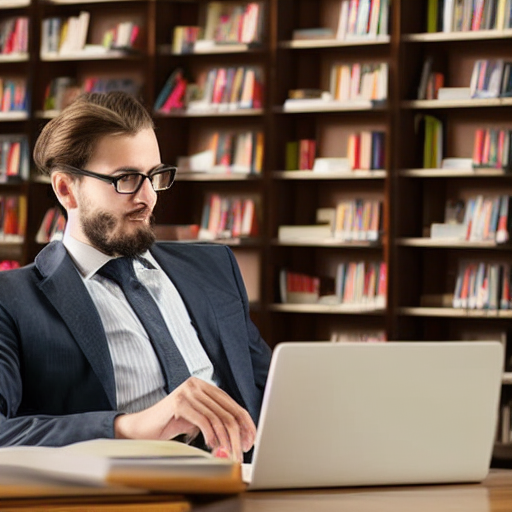
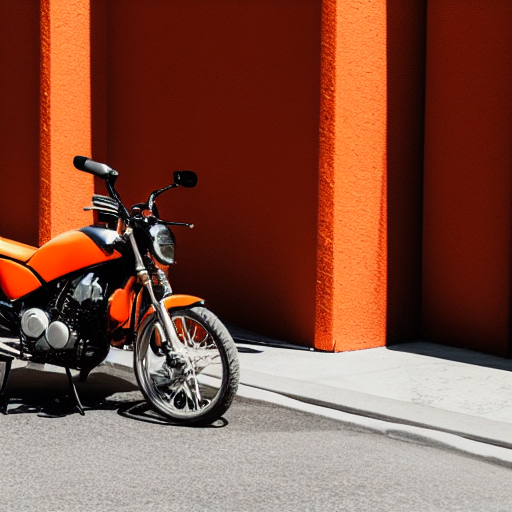
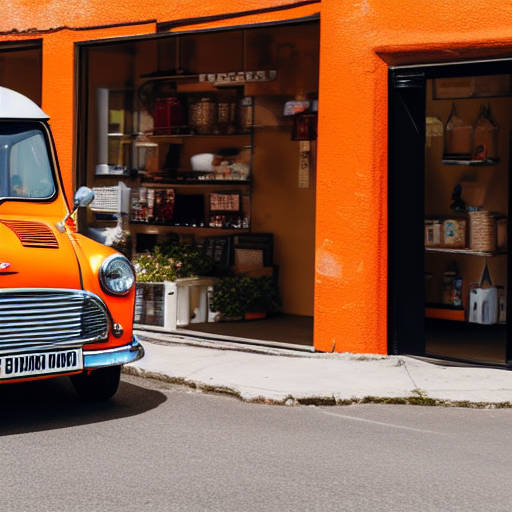
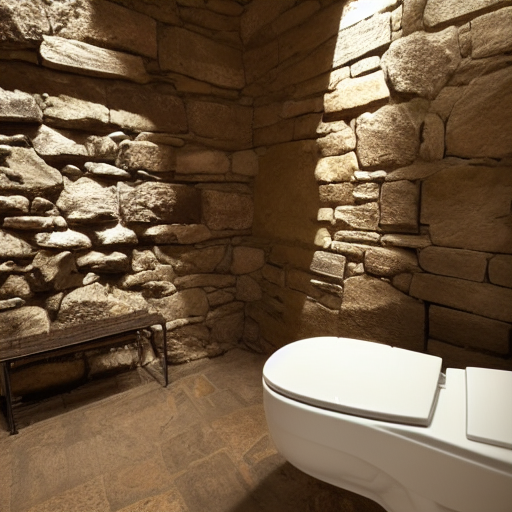
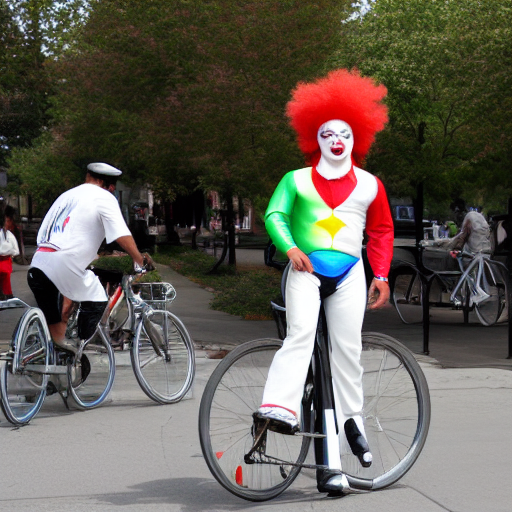

In [5]:
# import mediapy as media
# from PIL import Image

# # load image
# imgs_path = img_data['image_path'].to_list()

# def open_img(pth):
#     return Image.open(pth).convert("RGB")

# orig_images = list(filter(None,[open_img('/home/fenghe/Image2Text_inversion/'+pth) for pth in imgs_path]))
# media.show_images(orig_images[:5])

In [27]:
from tqdm import tqdm

simrec = []
for index, item in tqdm(compare_promts.iterrows()):
    sim_lst = measure_clip_imgtxt_similarity(('/home/fenghe/Image2Text_inversion/'+item['Ref_imgs']),item['PEZ'],item['Ours'])
    simrec.append(sim_lst)


688it [00:12, 53.95it/s]


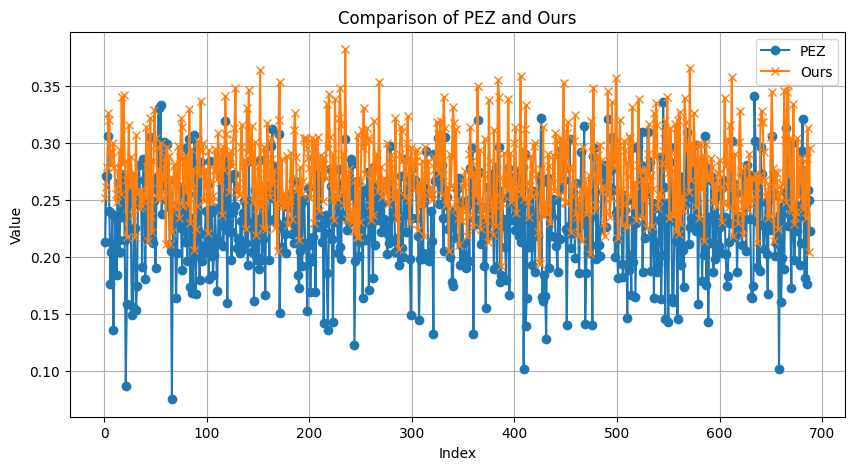

In [30]:
import matplotlib.pyplot as plt

# 解包数据为两个列表
A_values, B_values = zip(*simrec)

# 生成x轴的值列表，假设它们是连续的，从1开始
x_values = range(1, len(A_values) + 1)

# 绘制折线图
plt.figure(figsize=(10, 5))  # 设置图形大小
plt.plot(x_values, A_values, label='PEZ', marker='o')  # A的折线图，带圆点标记
plt.plot(x_values, B_values, label='Ours', marker='x')  # B的折线图，带叉号标记

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Comparison of PEZ and Ours')
plt.xlabel('Index')
plt.ylabel('Value')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

## CLIP: 目标图片与两种方式的生成Prompt产生的图片进行计算

In [12]:
from diffusers import StableDiffusionPipeline
from diffusers import PNDMScheduler
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"


model_id = "runwayml/stable-diffusion-v1-5"
scheduler = PNDMScheduler.from_pretrained(model_id, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    scheduler=scheduler,
    torch_dtype=torch.float16,
    ).to(device)

image_length = 512

/home/fenghe/anaconda3/envs/hardimg/lib/python3.9/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 82782.32it/s]
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [7]:
from tqdm import tqdm

eval_sim = []

for index, item in tqdm(compare_promts.iterrows(),total=len(compare_promts)):
    orig_image = Image.open(('/home/fenghe/Image2Text_inversion/'+item['Ref_imgs'])).convert('RGB')
    with torch.no_grad():
        pred_imgs = pipe(
                    item['PEZ'],
                    num_images_per_prompt=1,
                    guidance_scale=7.5,
                    num_inference_steps=50,
                    height=image_length,
                    width=image_length,
                    ).images
        orig_images_temp = [clip_preprocess(orig_image).unsqueeze(0)]
        orig_images_t = torch.cat(orig_images_temp).to(device)
        pred_imgs_temp = [clip_preprocess(i).unsqueeze(0) for i in pred_imgs]
        pred_imgs_t = torch.cat(pred_imgs_temp).to(device)
        eval_sim.append(measure_clip_imgs_similarity(orig_images_t, pred_imgs_t, clip_model))

100%|██████████| 688/688 [21:08<00:00,  1.84s/it]


In [8]:
sum(eval_sim)/len(eval_sim)

0.7178268706166121

In [9]:
from tqdm import tqdm

eval_sim_ours = []

for index, item in tqdm(compare_promts.iterrows(),total=len(compare_promts)):
    orig_image = Image.open(('/home/fenghe/Image2Text_inversion/'+item['Ref_imgs'])).convert('RGB')
    with torch.no_grad():
        pred_imgs = pipe(
                    item['Ours'],
                    num_images_per_prompt=1,
                    guidance_scale=7.5,
                    num_inference_steps=50,
                    height=image_length,
                    width=image_length,
                    ).images
        orig_images_temp = [clip_preprocess(orig_image).unsqueeze(0)]
        orig_images_t = torch.cat(orig_images_temp).to(device)
        pred_imgs_temp = [clip_preprocess(i).unsqueeze(0) for i in pred_imgs]
        pred_imgs_t = torch.cat(pred_imgs_temp).to(device)
        eval_sim_ours.append(measure_clip_imgs_similarity(orig_images_t, pred_imgs_t, clip_model))

100%|██████████| 688/688 [21:07<00:00,  1.84s/it]


In [10]:
sum(eval_sim_ours)/len(eval_sim_ours)

0.8420373075749985

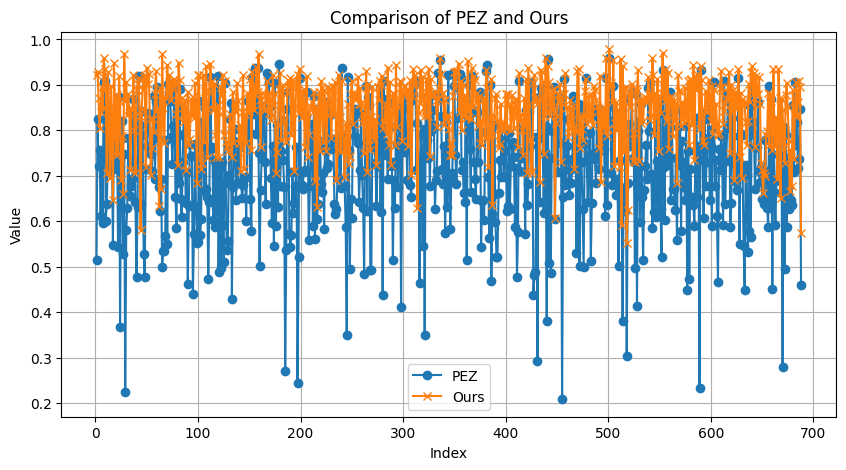

In [11]:
import matplotlib.pyplot as plt

# 解包数据为两个列表

# 生成x轴的值列表，假设它们是连续的，从1开始
x_values = range(1, len(eval_sim_ours) + 1)

# 绘制折线图
plt.figure(figsize=(10, 5))  # 设置图形大小
plt.plot(x_values, eval_sim, label='PEZ', marker='o')  # A的折线图，带圆点标记
plt.plot(x_values, eval_sim_ours, label='Ours', marker='x')  # B的折线图，带叉号标记

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Comparison of PEZ and Ours')
plt.xlabel('Index')
plt.ylabel('Value')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

## LPIPS： 目标图像与生成图像之间的语义相似度

In [15]:
import torch
import lpips
import itertools
from PIL import Image
from torchvision import transforms

# 加载 LPIPS 模型
lpips_model = lpips.LPIPS(net='alex').to(device)

# 加载图像并预处理
transform = transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor(),])

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)

def measure_lpips_imgs_similarity(img1, img2):
    distance = lpips_model(img1, img2)
    # 计算多样性指标，这里我们取平均值
    return distance.item()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/fenghe/anaconda3/envs/hardimg/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fenghe/anaconda3/envs/hardimg/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/fenghe/anaconda3/envs/hardimg/lib/python3.9/site-packages/lpips/weights/v0.1/alex.pth


In [36]:
lpips_sim_PEZ = []

for index, item in tqdm(compare_promts.iterrows(),total=len(compare_promts)):
    orig_image_t = load_image(('/home/fenghe/Image2Text_inversion/'+item['Ref_imgs'])).to(device)
    with torch.no_grad():
        pred_imgs = pipe(
                    item['PEZ'],
                    num_images_per_prompt=1,
                    guidance_scale=7.5,
                    num_inference_steps=50,
                    height=image_length,
                    width=image_length,
                    )
        pred_img = pred_imgs.images[0]
        pred_img_t = transform(pred_img).unsqueeze(0).to(device)

        lpips_sim_PEZ.append(lpips_model(orig_image_t, pred_img_t).item())
        #.append(measure_lpips_imgs_similarity())

100%|██████████| 688/688 [20:57<00:00,  1.83s/it]


In [42]:
lpips_sim_ours = []

for index, item in tqdm(compare_promts.iterrows(),total=len(compare_promts)):
    orig_image_t = load_image(('/home/fenghe/Image2Text_inversion/'+item['Ref_imgs'])).to(device)
    with torch.no_grad():
        pred_imgs = pipe(
                    item['Ours'],
                    num_images_per_prompt=1,
                    guidance_scale=7.5,
                    num_inference_steps=50,
                    height=image_length,
                    width=image_length,
                    )
        pred_img = pred_imgs.images[0]
        pred_img_t = transform(pred_img).unsqueeze(0).to(device)

        lpips_sim_ours.append(lpips_model(orig_image_t, pred_img_t).item())
        #.append(measure_lpips_imgs_similarity())

100%|██████████| 688/688 [20:56<00:00,  1.83s/it]


In [43]:
print(sum(lpips_sim_PEZ)/len(lpips_sim_PEZ))
print(sum(lpips_sim_ours)/len(lpips_sim_ours))

0.6333932735805594
0.6092929137480814


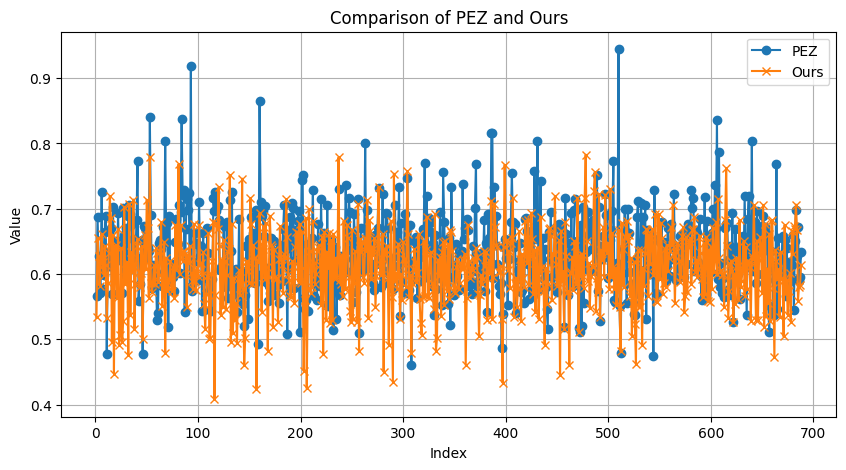

In [40]:
import matplotlib.pyplot as plt

# 解包数据为两个列表

# 生成x轴的值列表，假设它们是连续的，从1开始
x_values = range(1, len(eval_sim_ours) + 1)

# 绘制折线图
plt.figure(figsize=(10, 5))  # 设置图形大小
plt.plot(x_values, lpips_sim_PEZ, label='PEZ', marker='o')  # A的折线图，带圆点标记
plt.plot(x_values, lpips_sim_ours, label='Ours', marker='x')  # B的折线图，带叉号标记

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Comparison of PEZ and Ours')
plt.xlabel('Index')
plt.ylabel('Value')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

## LPIPS: 不同生成样本之间的 LPIPS 来衡量生成图像的多样性。

In [16]:
import lpips
import torch
from PIL import Image
from torchvision import transforms

lpips_div_PEZ = []

for index, item in tqdm(compare_promts.iterrows(),total=len(compare_promts)):
    with torch.no_grad():
        pred_imgs = pipe(
                    item['PEZ'],
                    num_images_per_prompt=4,
                    guidance_scale=7.5,
                    num_inference_steps=50,
                    height=image_length,
                    width=image_length,
                    ).images
        tensors =[transform(img).unsqueeze(0).to(device) for img in pred_imgs]
        distances = []
        for i in range(len(tensors)):
            for j in range(i + 1, len(tensors)):
                distance = lpips_model(tensors[i], tensors[j])
                distances.append(distance.item())
            
        average_distance = sum(distances) / len(distances)

        lpips_div_PEZ.append(average_distance)

100%|██████████| 688/688 [1:09:01<00:00,  6.02s/it]


In [17]:
import lpips
import torch
from PIL import Image
from torchvision import transforms

lpips_div_ours = []

for index, item in tqdm(compare_promts.iterrows(),total=len(compare_promts)):
    with torch.no_grad():
        pred_imgs = pipe(
                    item['Ours'],
                    num_images_per_prompt=4,
                    guidance_scale=7.5,
                    num_inference_steps=50,
                    height=image_length,
                    width=image_length,
                    ).images
        tensors =[transform(img).unsqueeze(0).to(device) for img in pred_imgs]
        distances = []
        for i in range(len(tensors)):
            for j in range(i + 1, len(tensors)):
                distance = lpips_model(tensors[i], tensors[j])
                distances.append(distance.item())
            
        average_distance = sum(distances) / len(distances)

        lpips_div_ours.append(average_distance)

100%|██████████| 688/688 [1:09:01<00:00,  6.02s/it]


In [18]:
print(sum(lpips_div_PEZ)/len(lpips_div_PEZ))
print(sum(lpips_div_ours)/len(lpips_div_ours))

0.618584253478709
0.5998943731578629


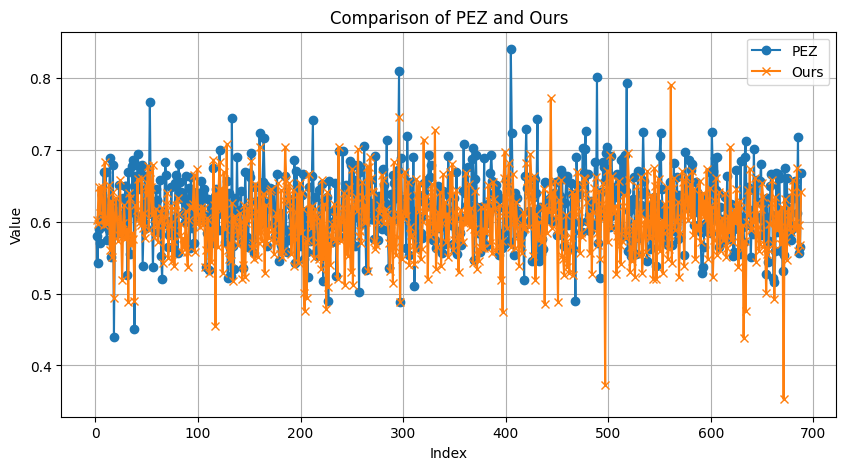

In [19]:
import matplotlib.pyplot as plt

# 解包数据为两个列表

# 生成x轴的值列表，假设它们是连续的，从1开始
x_values = range(1, len(lpips_div_PEZ) + 1)

# 绘制折线图
plt.figure(figsize=(10, 5))  # 设置图形大小
plt.plot(x_values, lpips_div_PEZ, label='PEZ', marker='o')  # A的折线图，带圆点标记
plt.plot(x_values, lpips_div_ours, label='Ours', marker='x')  # B的折线图，带叉号标记

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Comparison of PEZ and Ours')
plt.xlabel('Index')
plt.ylabel('Value')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()